<a href="https://colab.research.google.com/github/eric-pding/RSM8413_Group_Assignments/blob/main/RSM8413_Group_Assignment_4_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RSM8413: Group Assignment 4

## PART I

#### Importing Libraries



In [1]:
from sklearn.cluster import KMeans
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.metrics import silhouette_score
from sklearn import preprocessing, metrics

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [4]:
!pip install tensorflow
!pip install scikeras

In [5]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [6]:
!pip install dmba

In [7]:
from sklearn import tree
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from dmba import plotDecisionTree, regressionSummary
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

Colab environment detected.


### 1. Preliminary Data Cleaning

In [8]:
# Reading in the Dataset
train = 'https://raw.githubusercontent.com/eric-pding/RSM8413_Group_Assignments/main/CensusCanada2021Training.csv'
test = 'https://raw.githubusercontent.com/eric-pding/RSM8413_Group_Assignments/main/CensusCanada2021Test.csv'

data_train = pd.read_csv(train)
data_test = pd.read_csv(test)

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5371 entries, 0 to 5370
Data columns (total 18 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Total Population                                                           5371 non-null   int64  
 1   Total Households                                                           5297 non-null   float64
 2   Median Household Income (Current Year $)                                   5245 non-null   float64
 3   Total Households For Period Of Construction                                5297 non-null   float64
 4   Total Households For Period Of Construction Built Before 1961              5297 non-null   float64
 5   Total Households For Period Of Construction Built Between 1961 And 1980    5297 non-null   float64
 6   Total Households For Period Of Construction Built Betwee

In [ ]:
data_train.head()

Total Population  Total Households  \
0              3088            1235.0   
1              5889            1665.0   
2              8090            2775.0   
3              4074            1775.0   
4              3642            1385.0   

   Median Household Income (Current Year $)  \
0                                  107000.0   
1                                  111000.0   
2                                  105000.0   
3                                   65000.0   
4                                  101000.0   

   Total Households For Period Of Construction  \
0                                       1235.0   
1                                       1665.0   
2                                       2775.0   
3                                       1775.0   
4                                       1385.0   

   Total Households For Period Of Construction Built Before 1961  \
0                                               25.0               
1                                                0.0               
2                                              105.0               
3                                              210.0               
4                                               10.0               

   Total Households For Period Of Construction Built Between 1961 And 1980  \
0                                             1130.0                         
1                                                0.0                         
2                                              150.0                         
3                                             1100.0                         
4                                              190.0                         

   Total Households For Period Of Construction Built Between 1981 And 190  \
0                                               50.0                        
1                                                0.0                        
2                                              240.0                        
3                                              260.0                        
4                                             1010.0                        

   Total Households For Period Of Construction Built Between 1991 And 2000  \
0                                               15.0                         
1                                               15.0                         
2                                             1210.0                         
3                                               85.0                         
4                                              165.0                         

   Total Households For Period Of Construction Built Between 2001 And 2005  \
0                                               10.0                         
1                                               20.0                         
2                                              555.0                         
3                                               35.0                         
4                                                0.0                         

   Total Households For Period Of Construction Built Between 2006 And 2010  \
0                                               10.0                         
1                                              375.0                         
2                                              165.0                         
3                                               45.0                         
4                                                0.0                         

   Total Households For Period Of Construction Built Between 2011 And 2015  \
0                                                0.0                         
1                                              315.0                         
2                                              240.0                         
3                                               30.0                         
4                                 

**Insights from the Dataset**


*   Missing Values in many of the columns (5371 in total but most had 5297)
*   Naming of the column (Total Households For Period Of Construction Built Between 1981 And 190)?





In [10]:
# Renaming the Misnamed Column
data_train.rename(columns= {"Total Households For Period Of Construction Built Between 1981 And 190":
                            "Total Households For Period Of Construction Built Between 1981 And 1990"}, inplace = True)
data_test.rename(columns= {"Total Households For Period Of Construction Built Between 1981 And 190":
                            "Total Households For Period Of Construction Built Between 1981 And 1990"}, inplace = True)

data_train.head()

Total Population  Total Households  \
0              3088            1235.0   
1              5889            1665.0   
2              8090            2775.0   
3              4074            1775.0   
4              3642            1385.0   

   Median Household Income (Current Year $)  \
0                                  107000.0   
1                                  111000.0   
2                                  105000.0   
3                                   65000.0   
4                                  101000.0   

   Total Households For Period Of Construction  \
0                                       1235.0   
1                                       1665.0   
2                                       2775.0   
3                                       1775.0   
4                                       1385.0   

   Total Households For Period Of Construction Built Before 1961  \
0                                               25.0               
1                                                0.0               
2                                              105.0               
3                                              210.0               
4                                               10.0               

   Total Households For Period Of Construction Built Between 1961 And 1980  \
0                                             1130.0                         
1                                                0.0                         
2                                              150.0                         
3                                             1100.0                         
4                                              190.0                         

   Total Households For Period Of Construction Built Between 1981 And 1990  \
0                                               50.0                         
1                                                0.0                         
2                                              240.0                         
3                                              260.0                         
4                                             1010.0                         

   Total Households For Period Of Construction Built Between 1991 And 2000  \
0                                               15.0                         
1                                               15.0                         
2                                             1210.0                         
3                                               85.0                         
4                                              165.0                         

   Total Households For Period Of Construction Built Between 2001 And 2005  \
0                                               10.0                         
1                                               20.0                         
2                                              555.0                         
3                                               35.0                         
4                                                0.0                         

   Total Households For Period Of Construction Built Between 2006 And 2010  \
0                                               10.0                         
1                                              375.0                         
2                                              165.0                         
3                                               45.0                         
4                                                0.0                         

   Total Households For Period Of Construction Built Between 2011 And 2015  \
0                                                0.0                         
1                                              315.0                         
2                                              240.0                         
3                                               30.0                         
4                           

**Now we start to drop the columns.**

We will remove observations that:


1.   has missing data in 'Total Population','Total Households','Median Household Income (Current Year $)'.
2.   has less than 80% values in any row.

After these two filters, the non-null counts are the same for all features.



In [11]:
# Dropping rows with empty values in: 'Total Population','Total Households','Median Household Income (Current Year $)'
data_train.dropna(axis=0, how = 'any', subset=['Total Population','Total Households','Median Household Income (Current Year $)'], inplace=True)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5245 entries, 0 to 5370
Data columns (total 18 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Total Population                                                           5245 non-null   int64  
 1   Total Households                                                           5245 non-null   float64
 2   Median Household Income (Current Year $)                                   5245 non-null   float64
 3   Total Households For Period Of Construction                                5245 non-null   float64
 4   Total Households For Period Of Construction Built Before 1961              5245 non-null   float64
 5   Total Households For Period Of Construction Built Between 1961 And 1980    5245 non-null   float64
 6   Total Households For Period Of Construction Built Betwee

In [12]:
# Dropping rows with mostly empty values (threshold set to 80%)
threshold = 0.8
data_train.dropna(thresh=threshold*len(data_train.columns), inplace = True)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5245 entries, 0 to 5370
Data columns (total 18 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Total Population                                                           5245 non-null   int64  
 1   Total Households                                                           5245 non-null   float64
 2   Median Household Income (Current Year $)                                   5245 non-null   float64
 3   Total Households For Period Of Construction                                5245 non-null   float64
 4   Total Households For Period Of Construction Built Before 1961              5245 non-null   float64
 5   Total Households For Period Of Construction Built Between 1961 And 1980    5245 non-null   float64
 6   Total Households For Period Of Construction Built Betwee

In [ ]:
data_train.head()

Total Population  Total Households  \
0              3088            1235.0   
1              5889            1665.0   
2              8090            2775.0   
3              4074            1775.0   
4              3642            1385.0   

   Median Household Income (Current Year $)  \
0                                  107000.0   
1                                  111000.0   
2                                  105000.0   
3                                   65000.0   
4                                  101000.0   

   Total Households For Period Of Construction  \
0                                       1235.0   
1                                       1665.0   
2                                       2775.0   
3                                       1775.0   
4                                       1385.0   

   Total Households For Period Of Construction Built Before 1961  \
0                                               25.0               
1                                                0.0               
2                                              105.0               
3                                              210.0               
4                                               10.0               

   Total Households For Period Of Construction Built Between 1961 And 1980  \
0                                             1130.0                         
1                                                0.0                         
2                                              150.0                         
3                                             1100.0                         
4                                              190.0                         

   Total Households For Period Of Construction Built Between 1981 And 1990  \
0                                               50.0                         
1                                                0.0                         
2                                              240.0                         
3                                              260.0                         
4                                             1010.0                         

   Total Households For Period Of Construction Built Between 1991 And 2000  \
0                                               15.0                         
1                                               15.0                         
2                                             1210.0                         
3                                               85.0                         
4                                              165.0                         

   Total Households For Period Of Construction Built Between 2001 And 2005  \
0                                               10.0                         
1                                               20.0                         
2                                              555.0                         
3                                               35.0                         
4                                                0.0                         

   Total Households For Period Of Construction Built Between 2006 And 2010  \
0                                               10.0                         
1                                              375.0                         
2                                              165.0                         
3                                               45.0                         
4                                                0.0                         

   Total Households For Period Of Construction Built Between 2011 And 2015  \
0                                                0.0                         
1                                              315.0                         
2                                              240.0                         
3                                               30.0                         
4                           

### 2. EDA

In [ ]:
!pip install sweetviz
import sweetviz as sv

In [ ]:
# Generate an EDA using the Sweetviz Package
analyze_report = sv.analyze(data_train, "Median Household Income (Current Year $)")

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



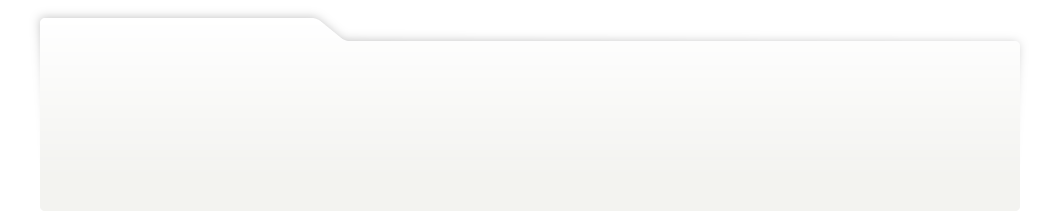
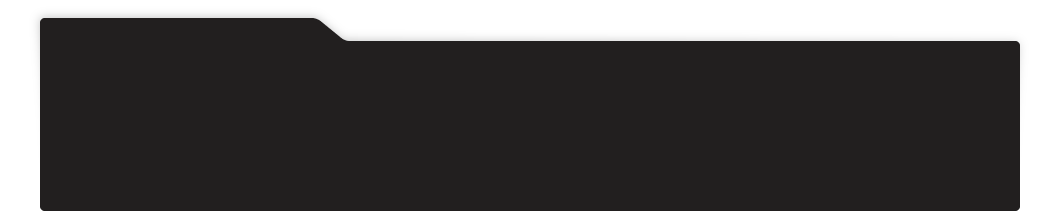
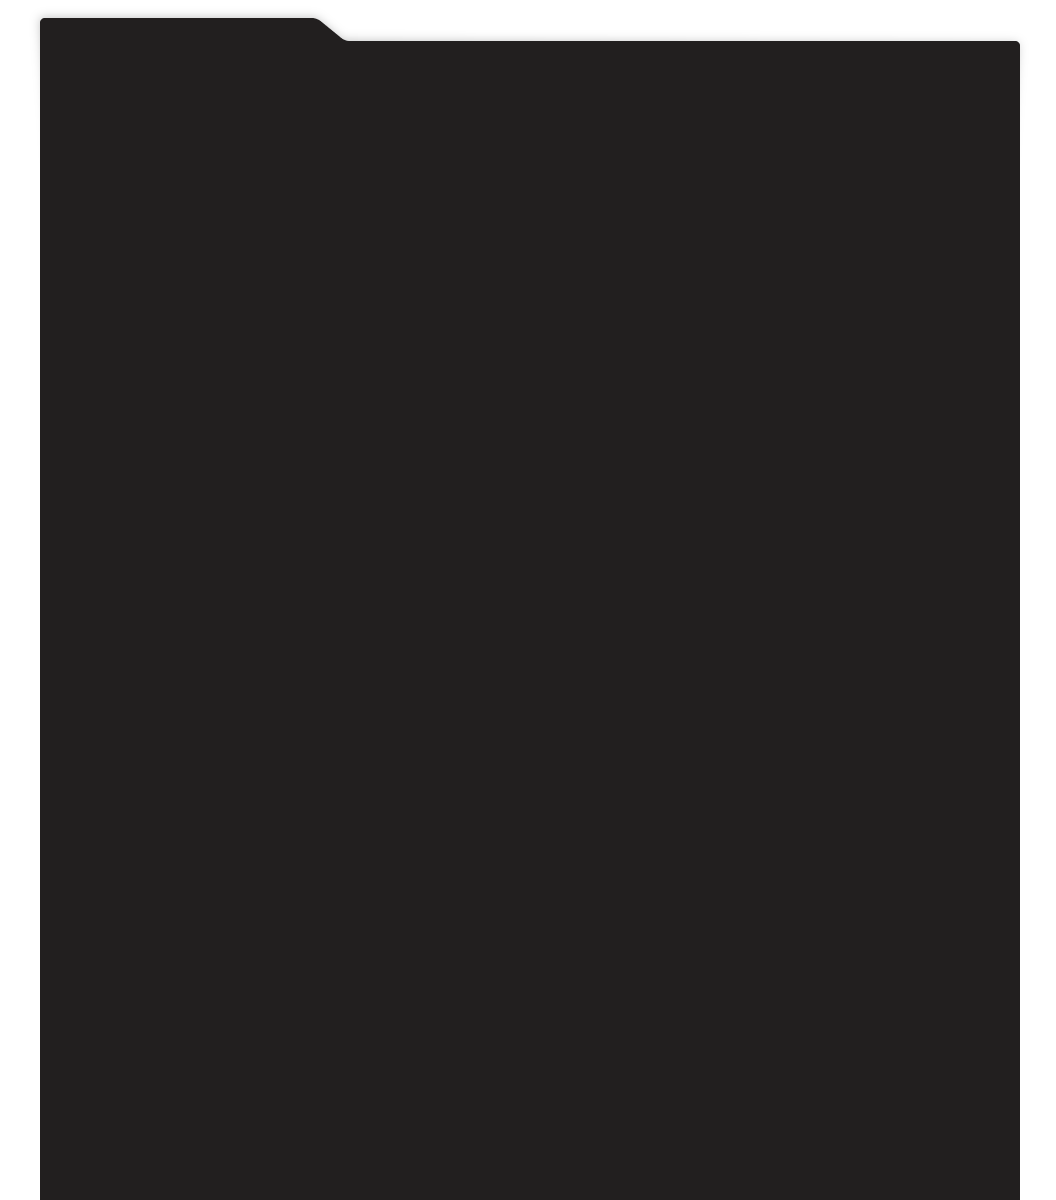
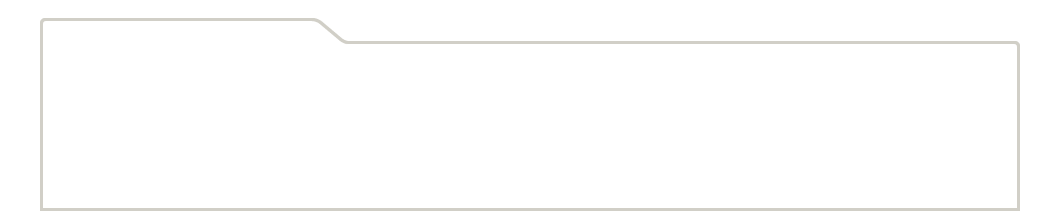
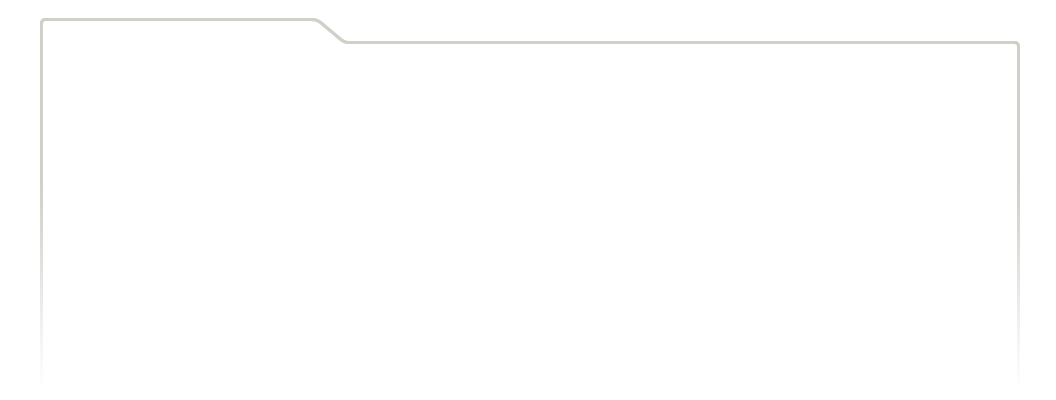
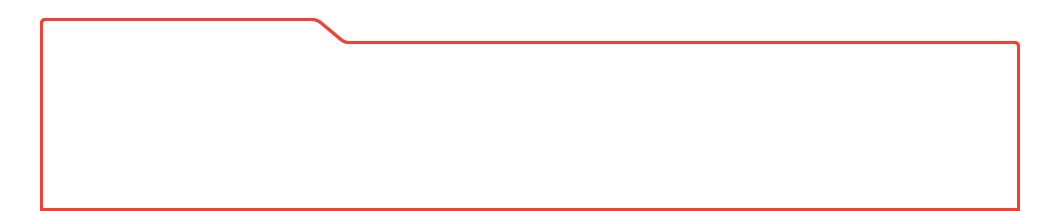
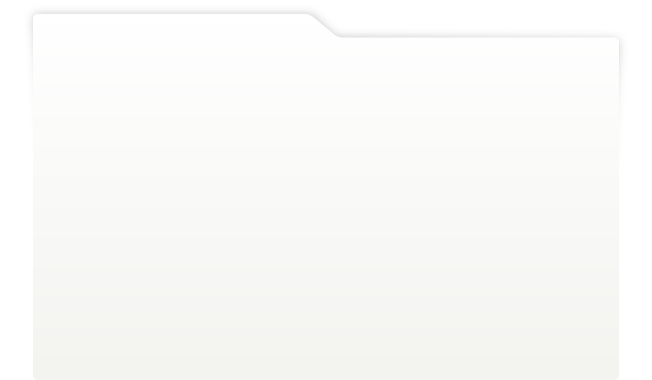
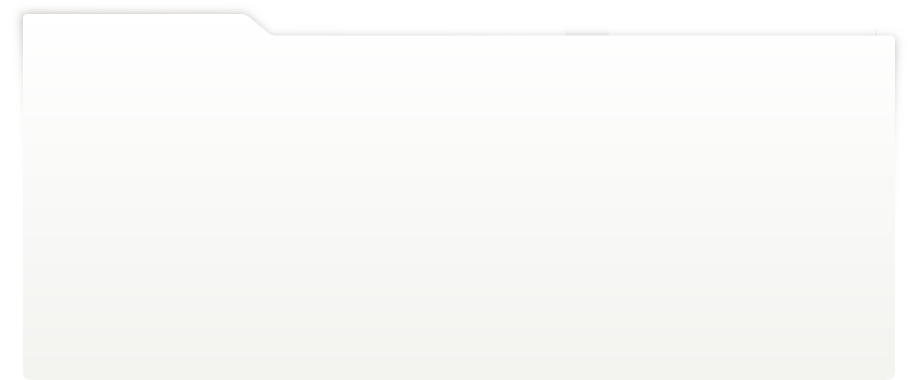
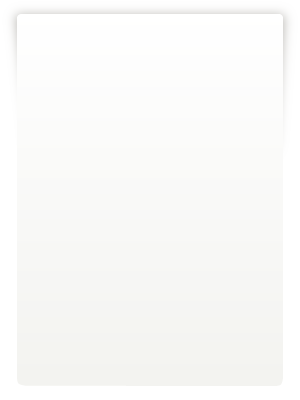
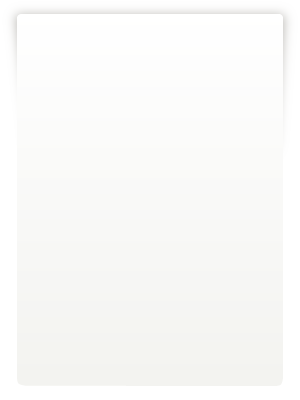
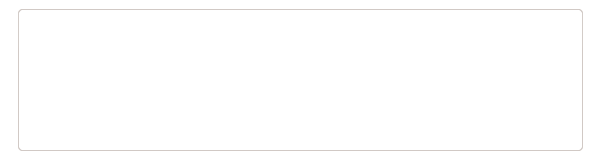
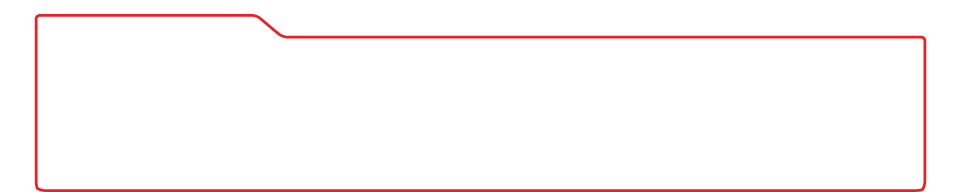
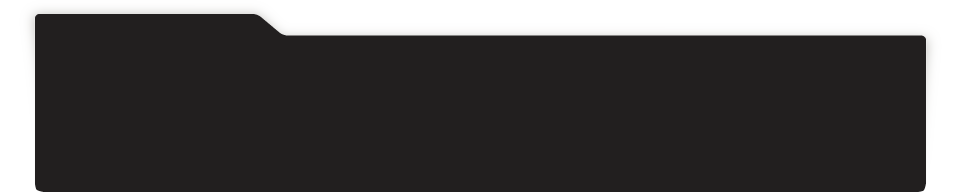
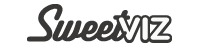
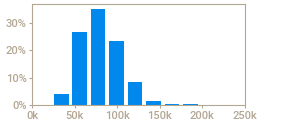
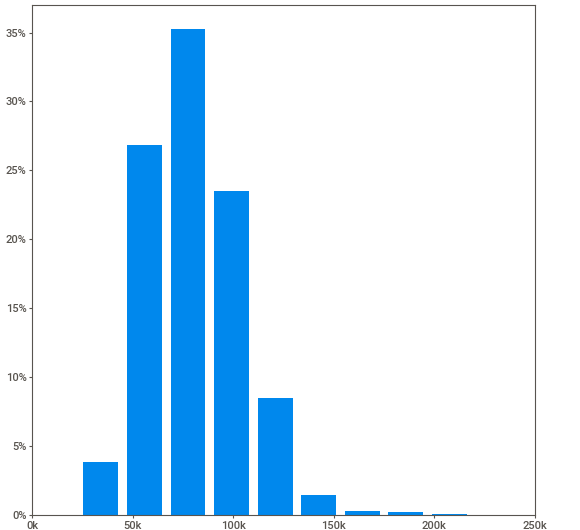
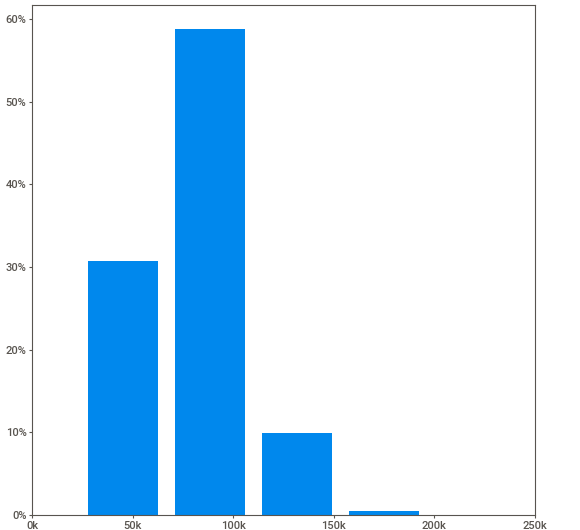
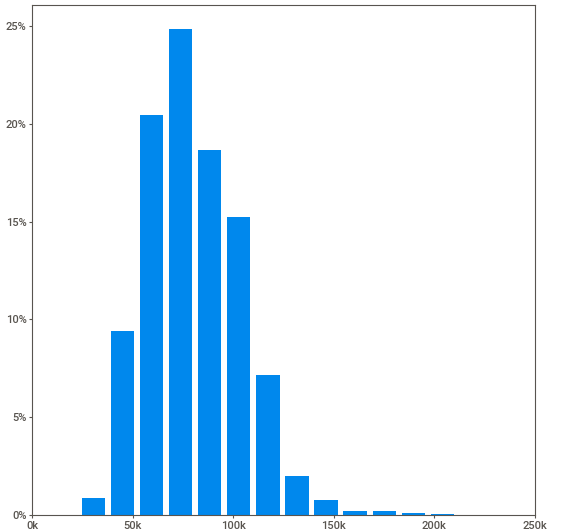
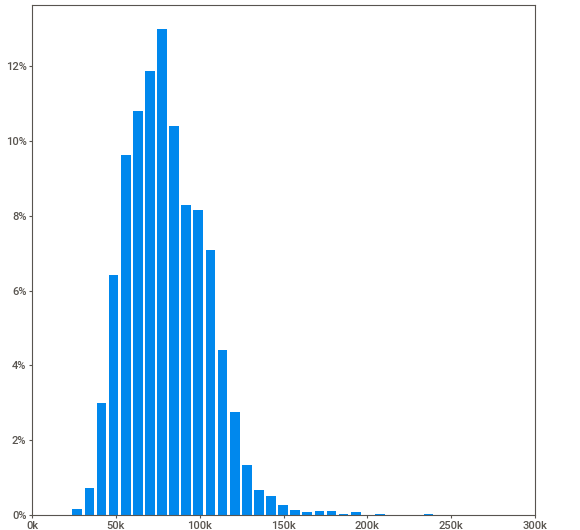
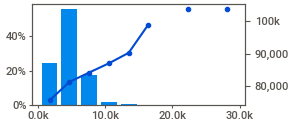
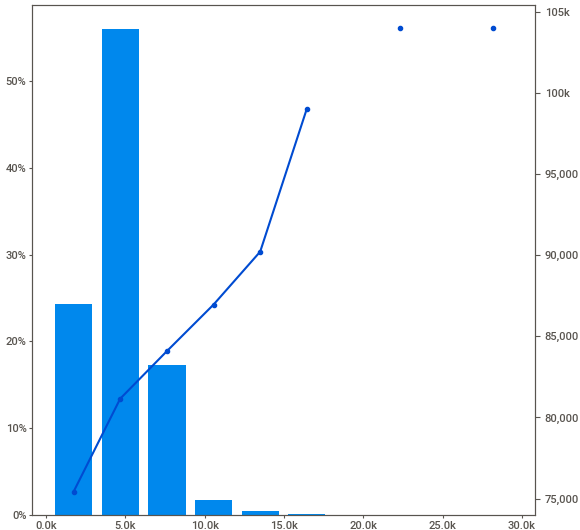
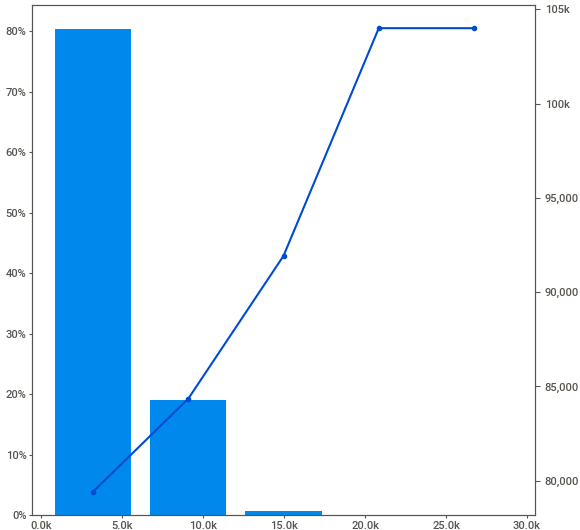
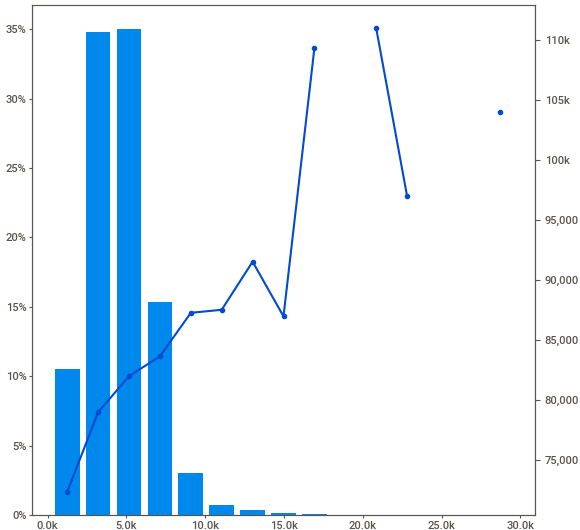
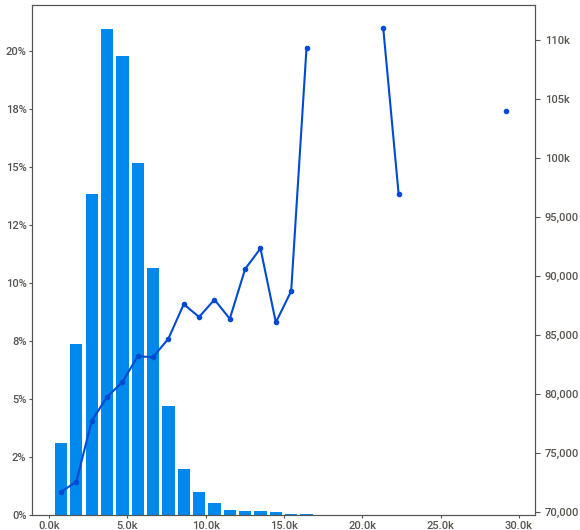
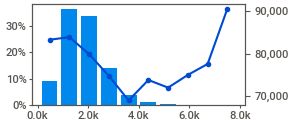
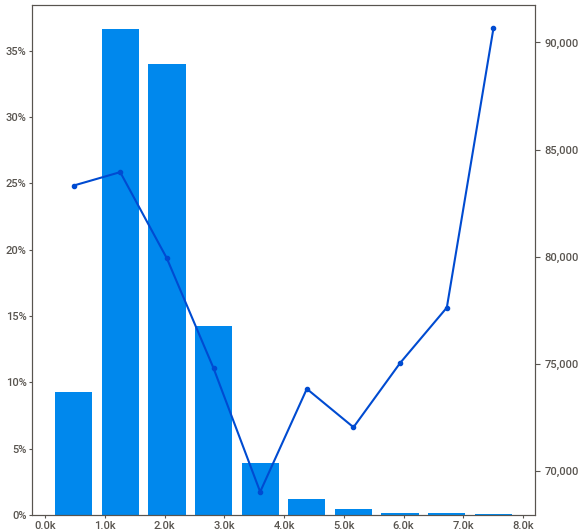
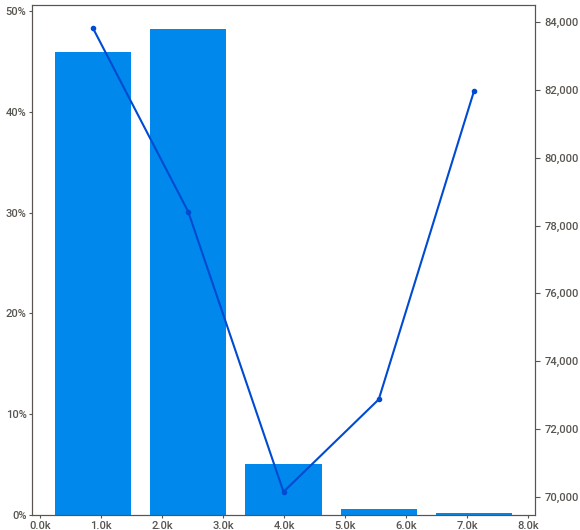
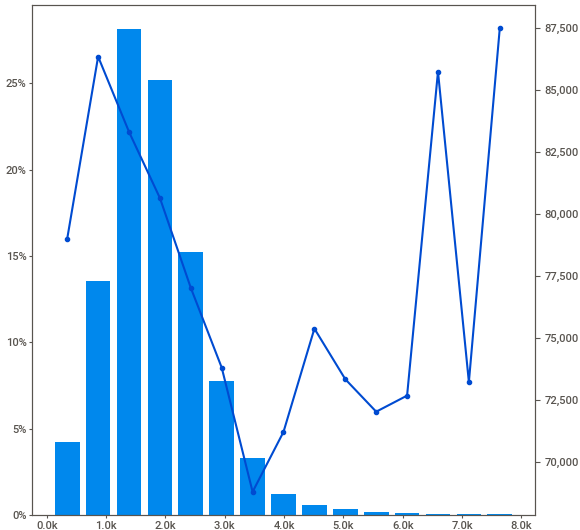
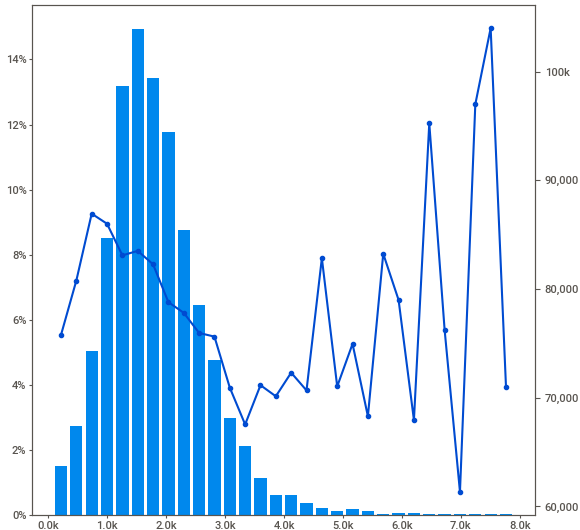
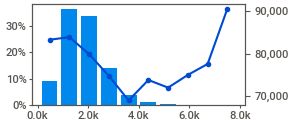
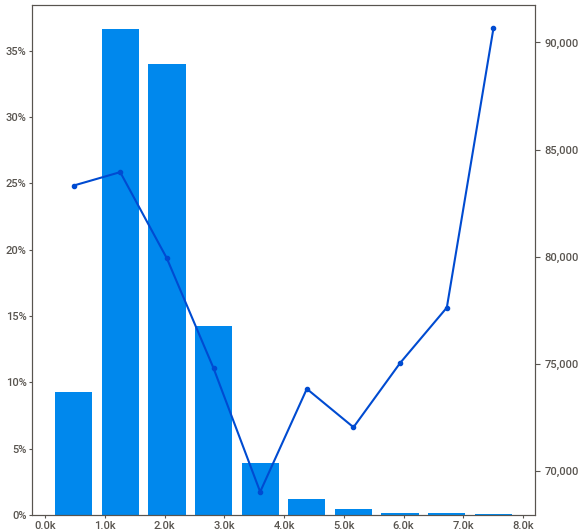
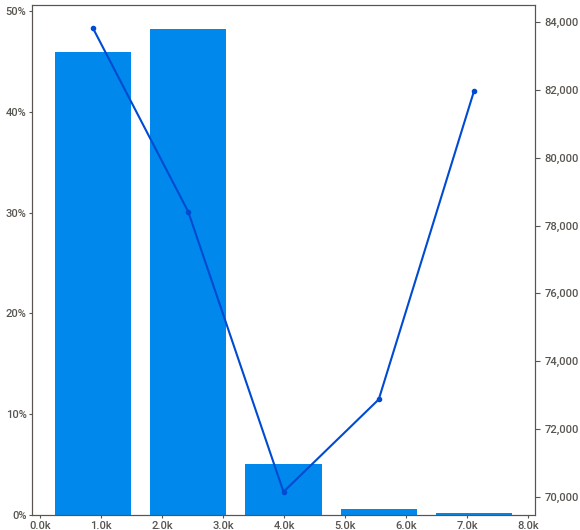
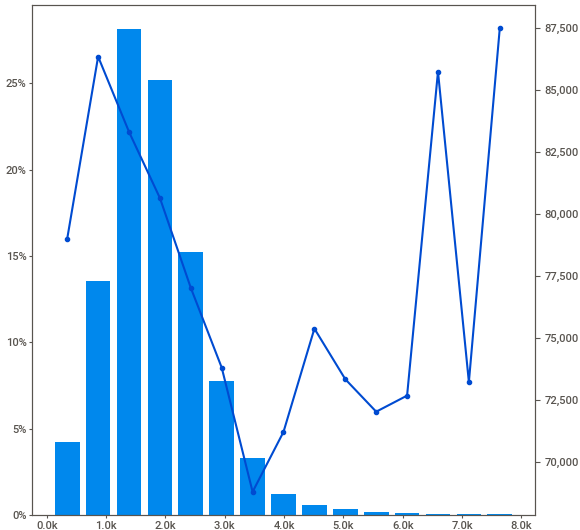
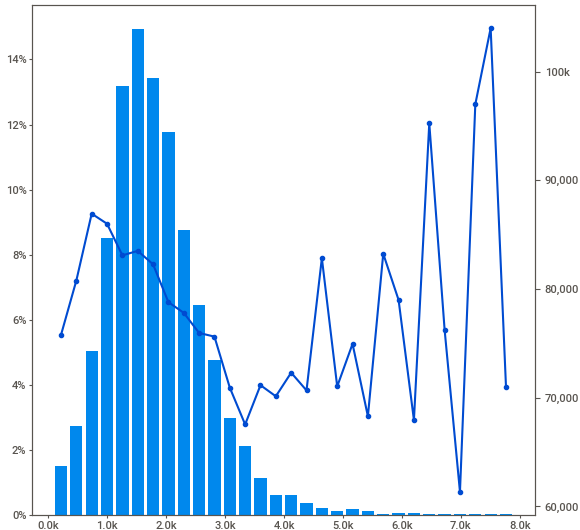
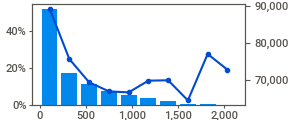
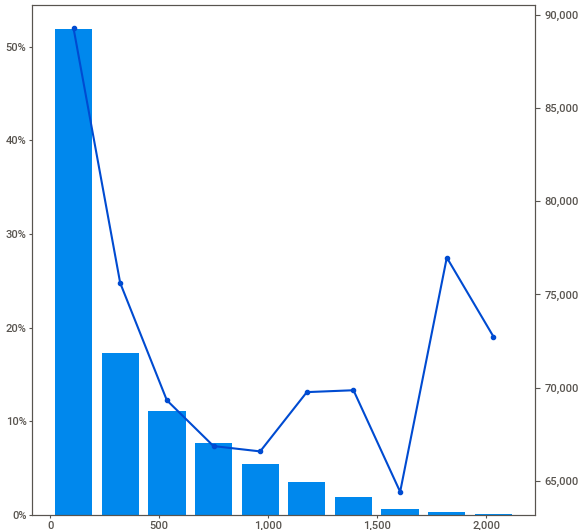
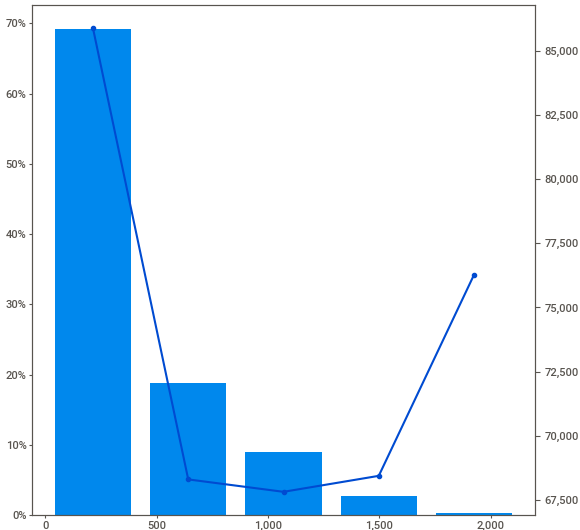
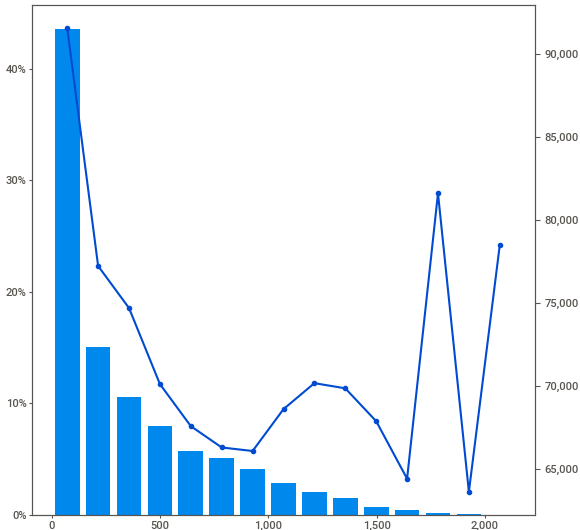
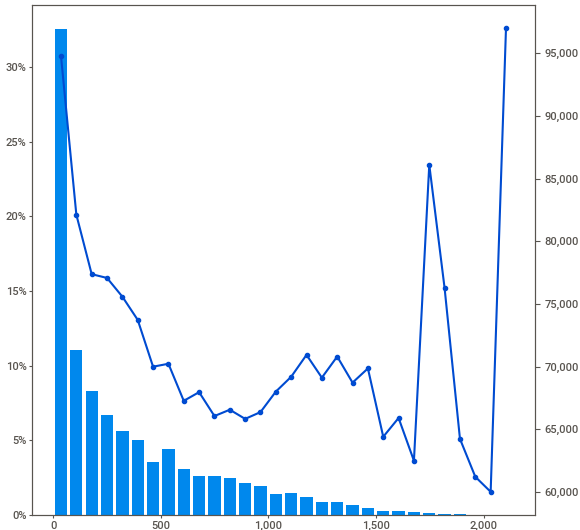
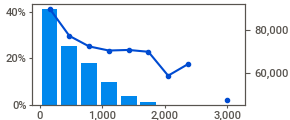
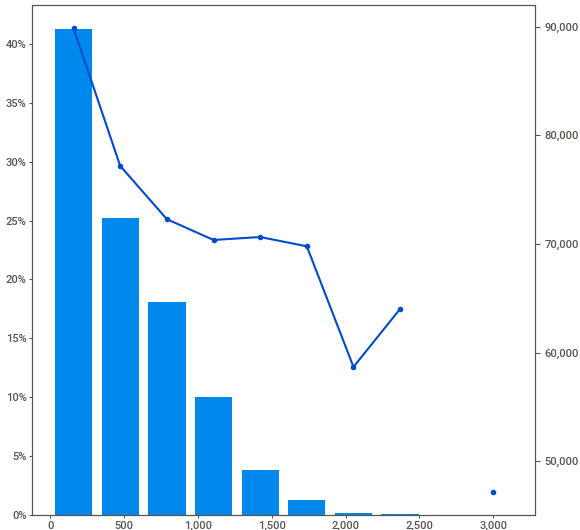
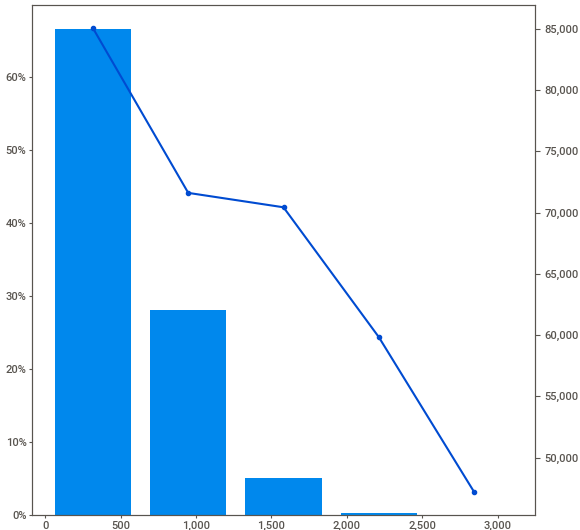
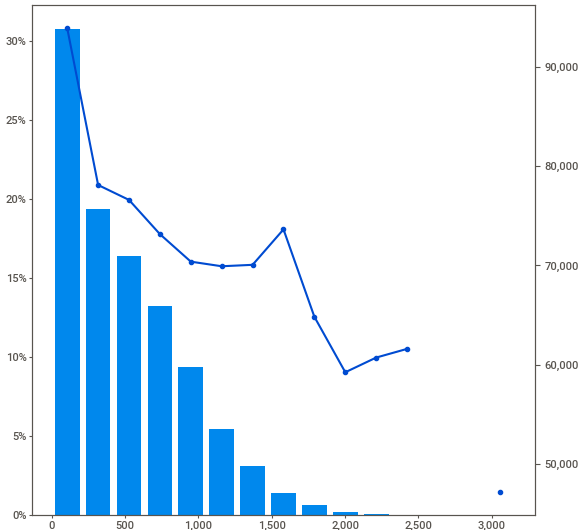
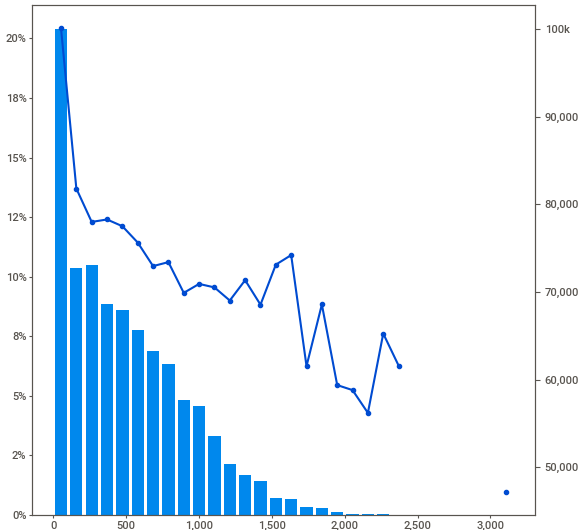
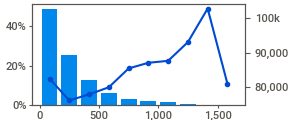
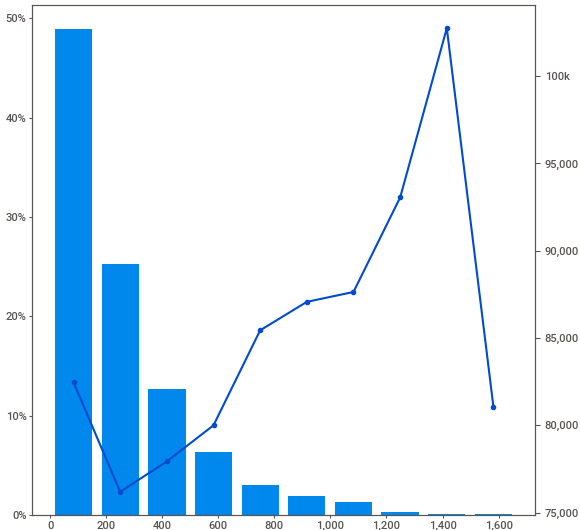
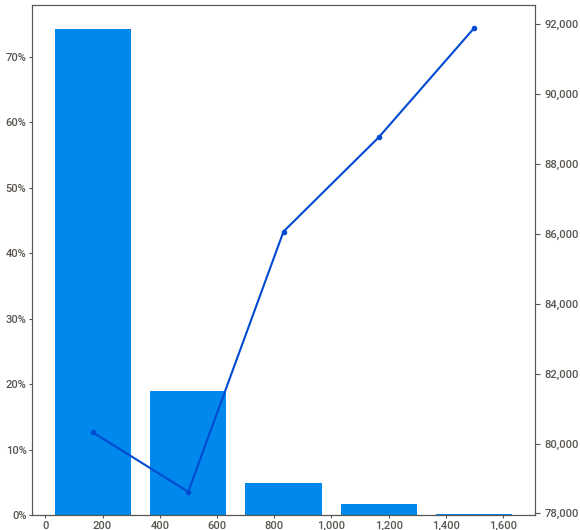
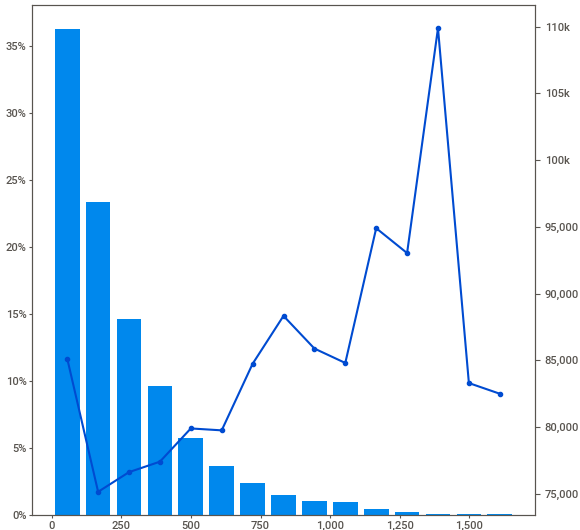
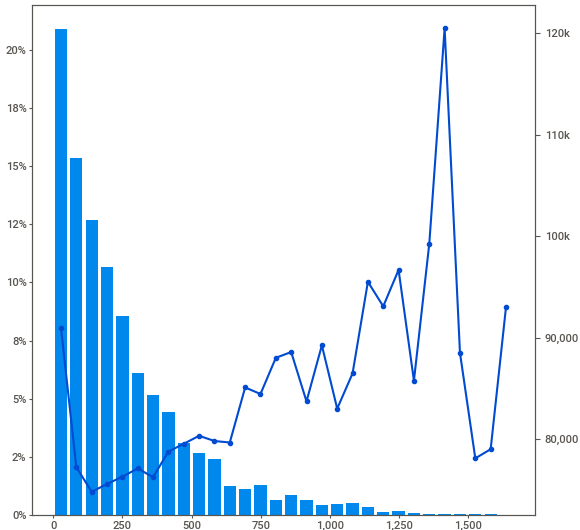
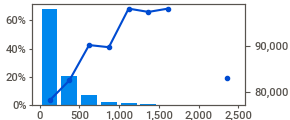
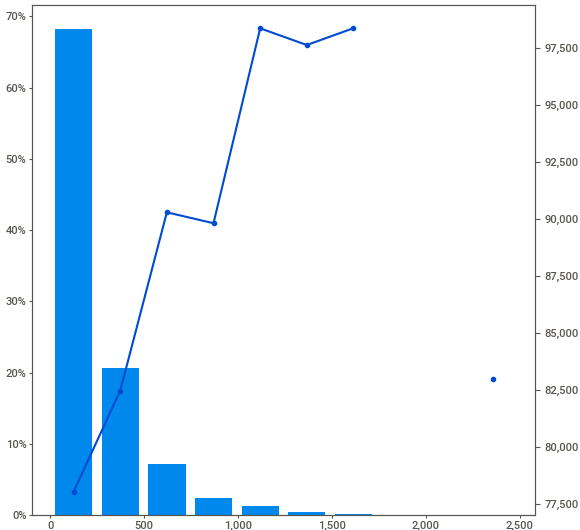
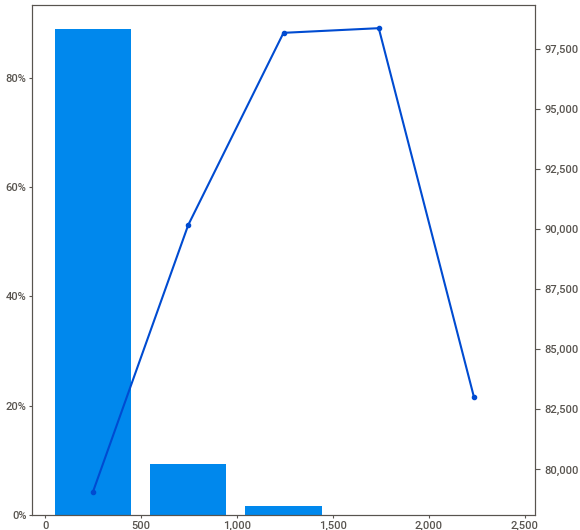
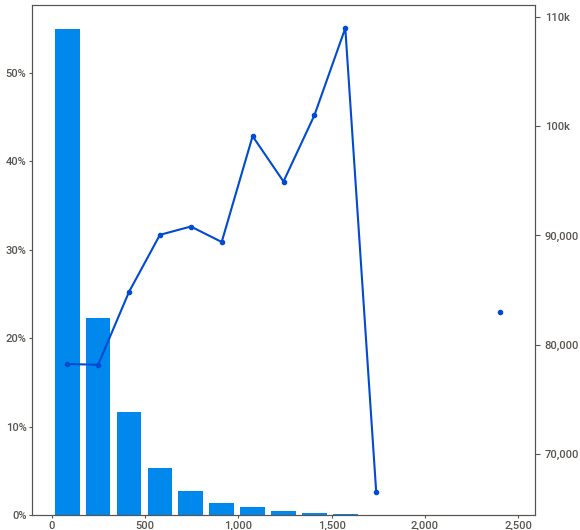
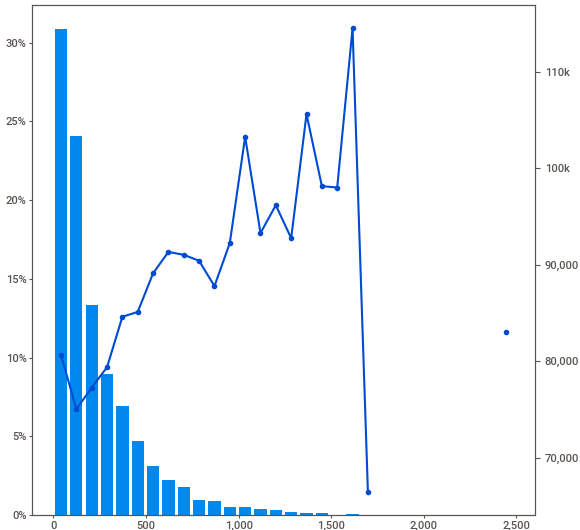
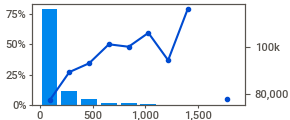
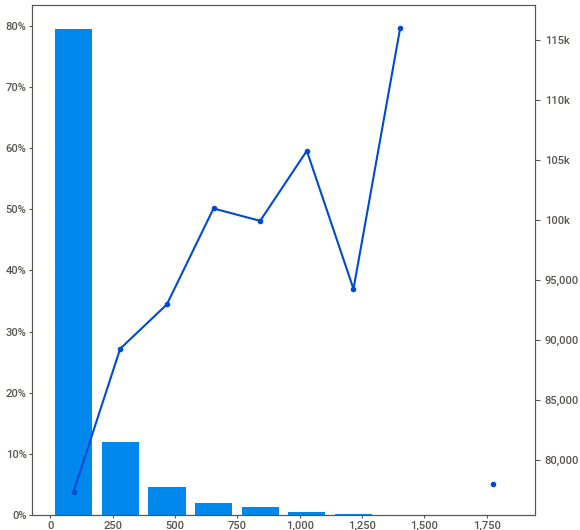
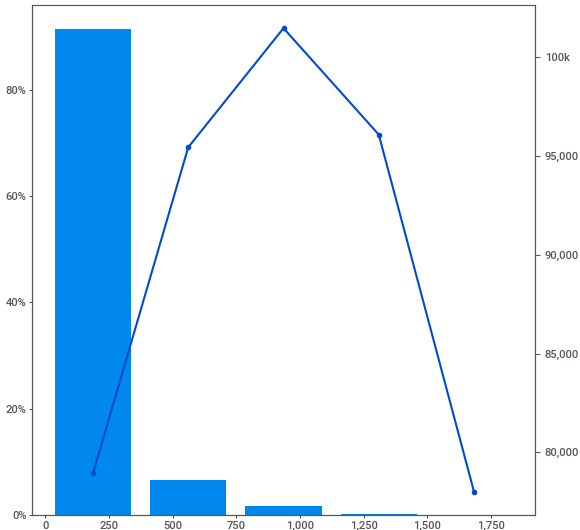
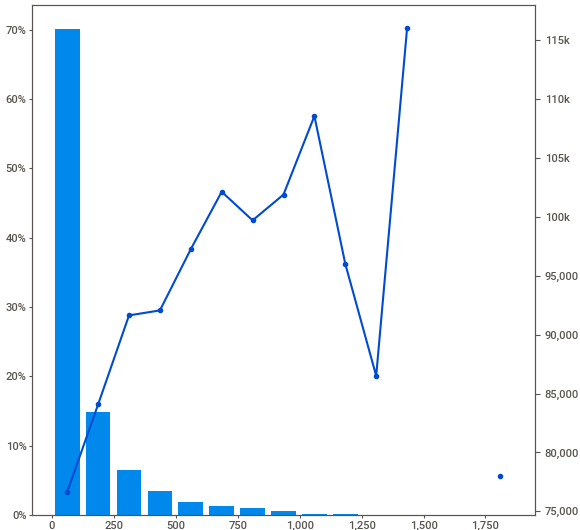
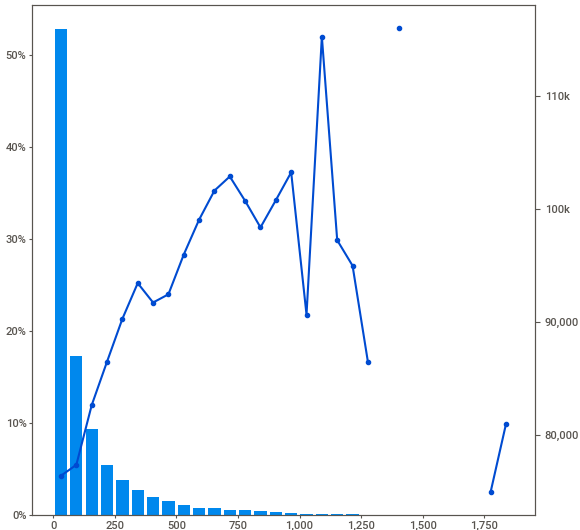
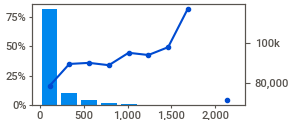
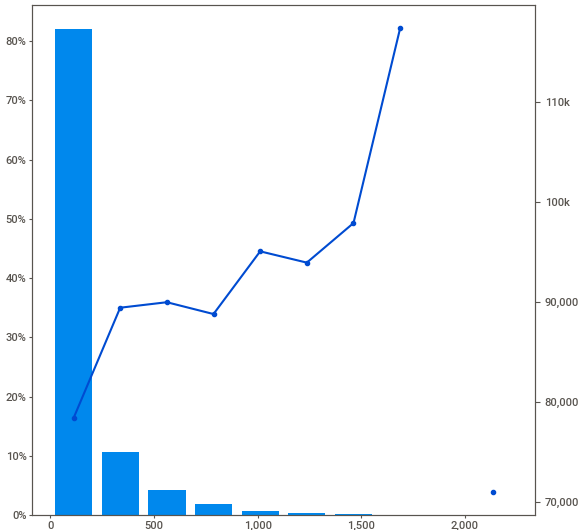
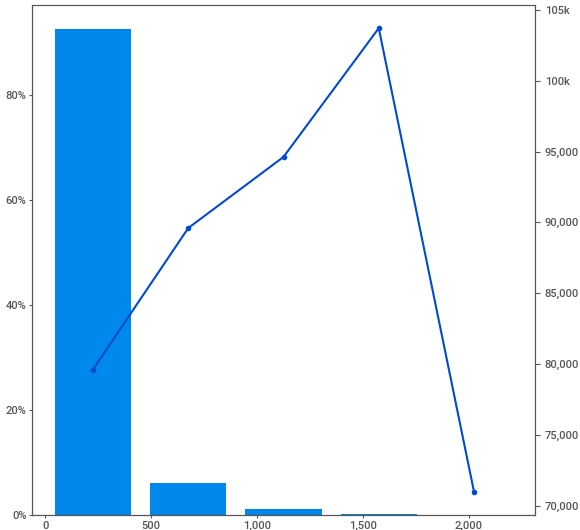
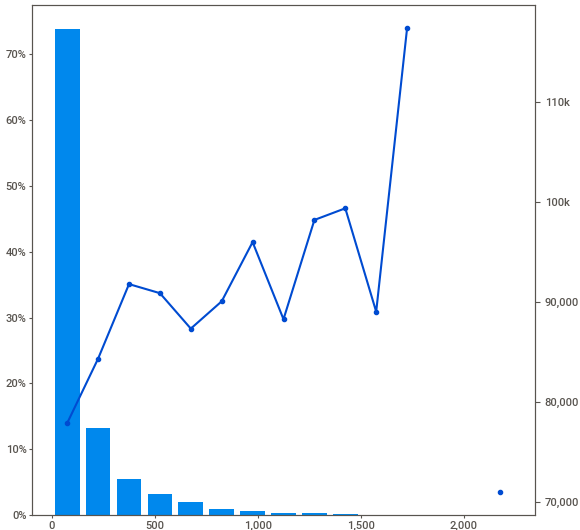
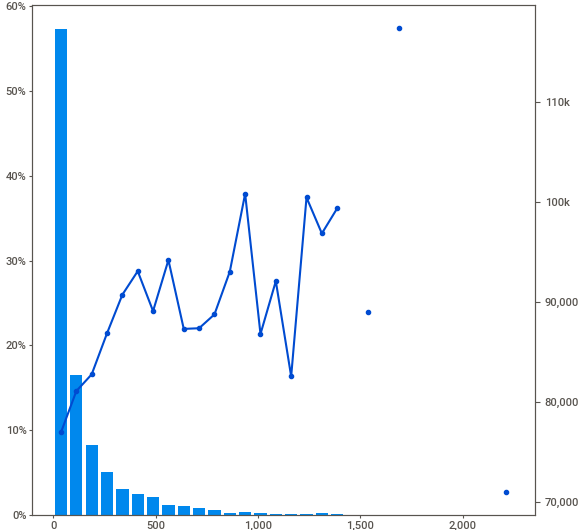
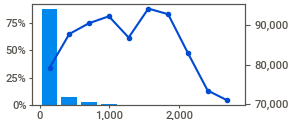
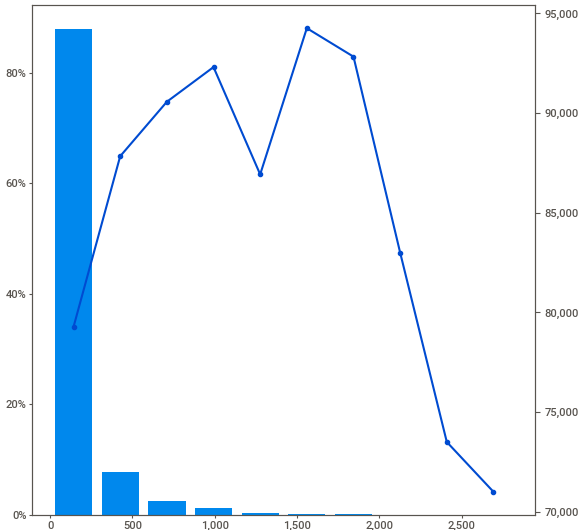
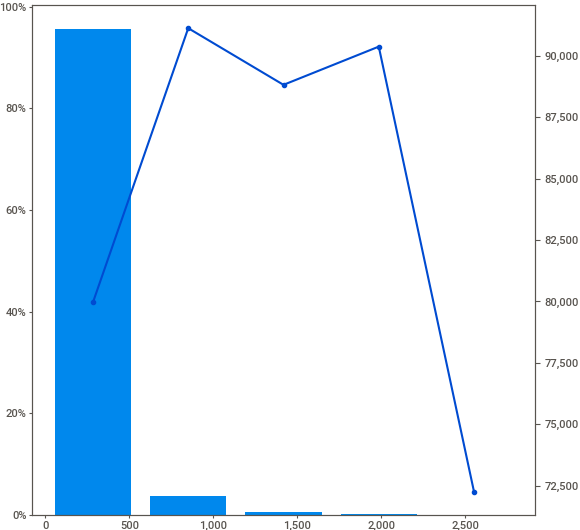
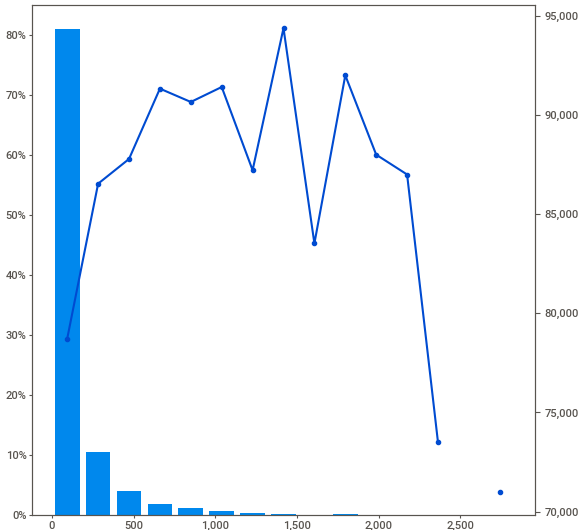
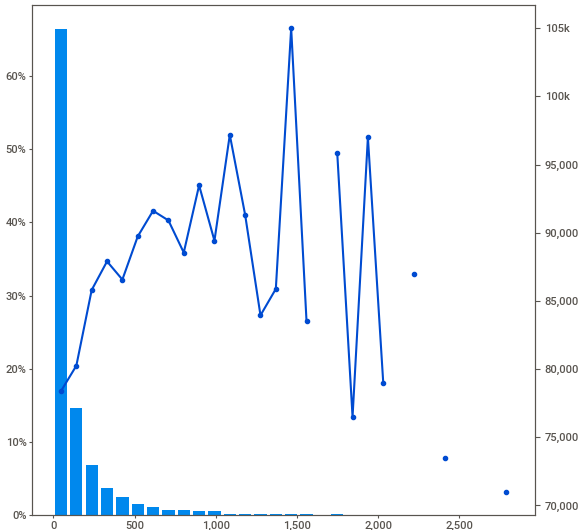
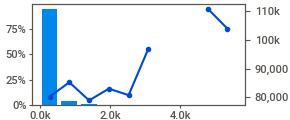
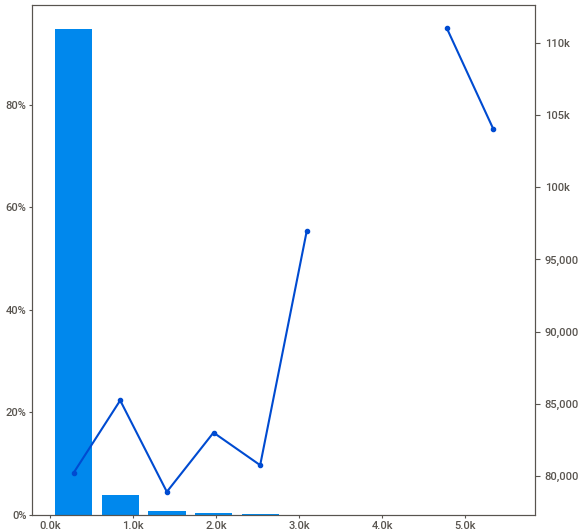
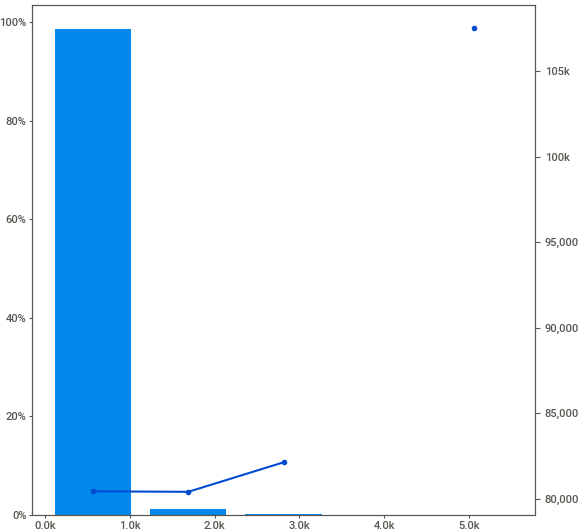
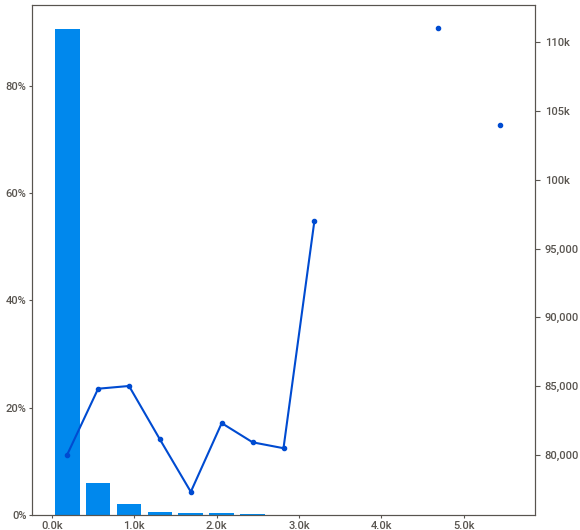
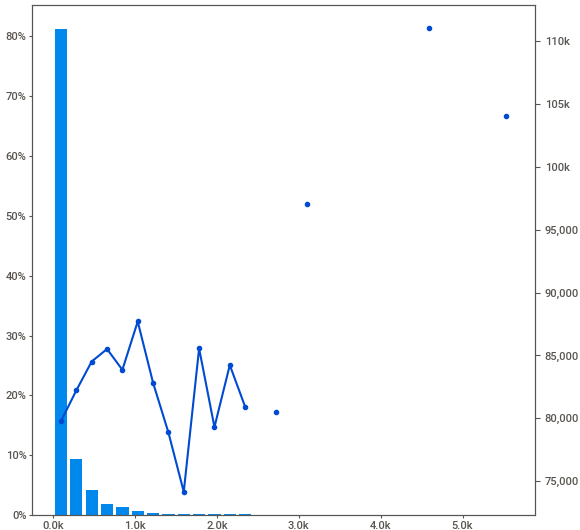
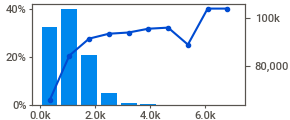
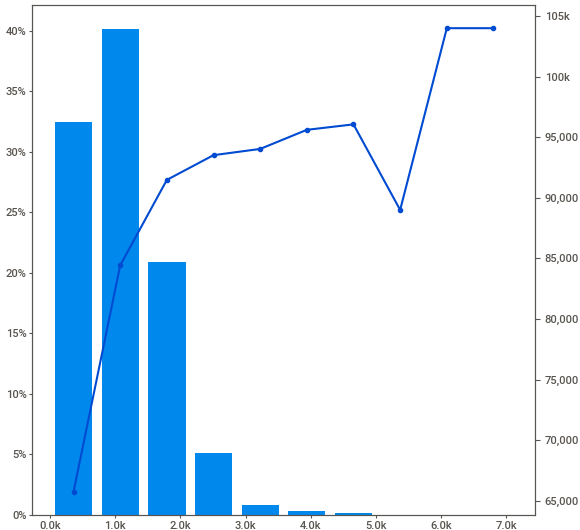
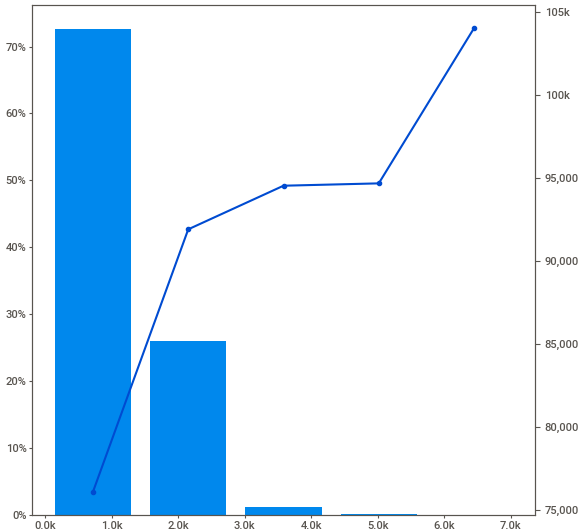
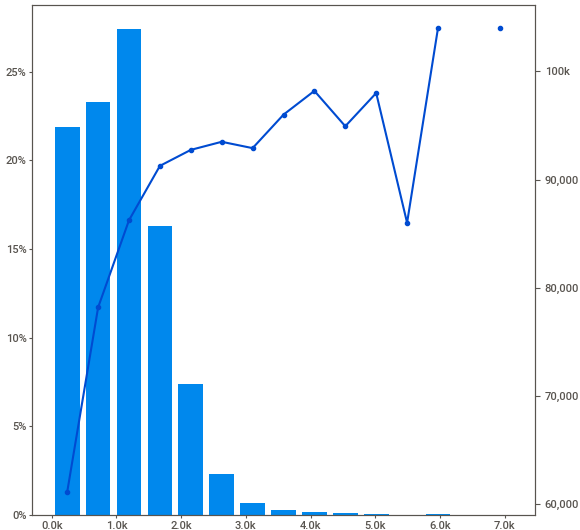
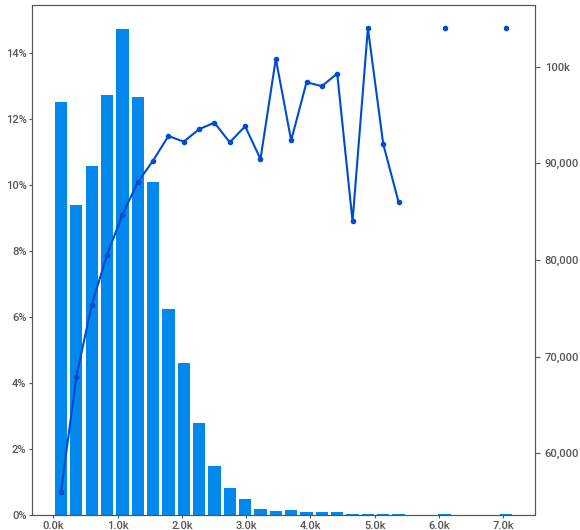
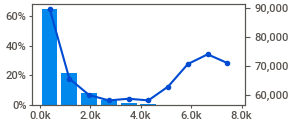
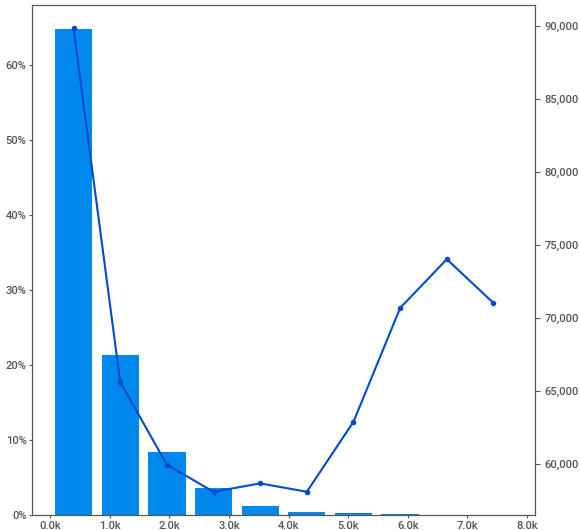
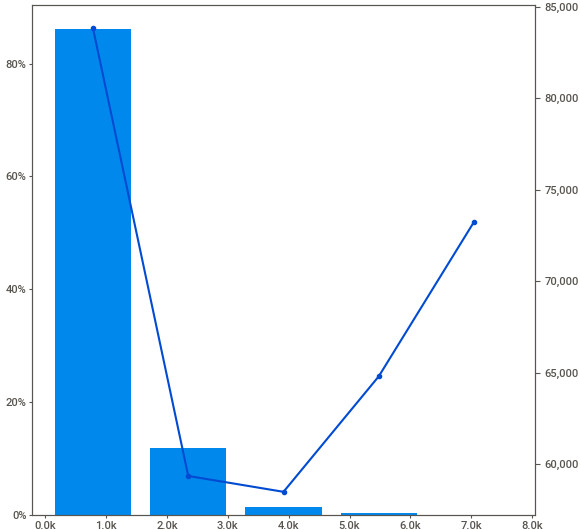
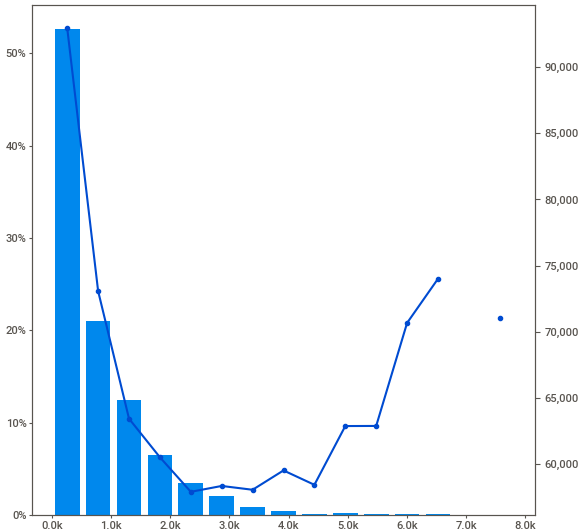
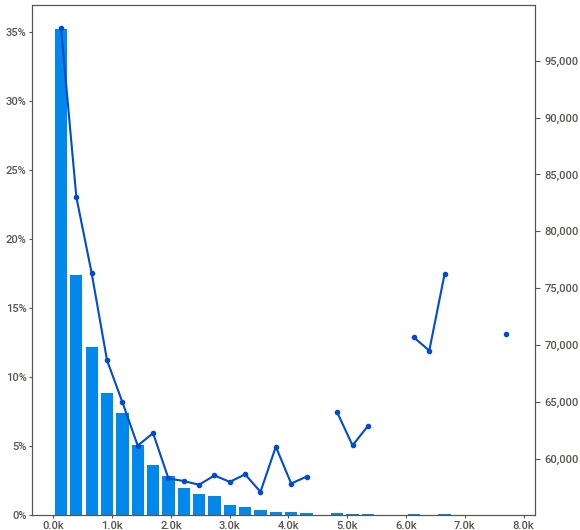
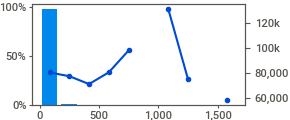
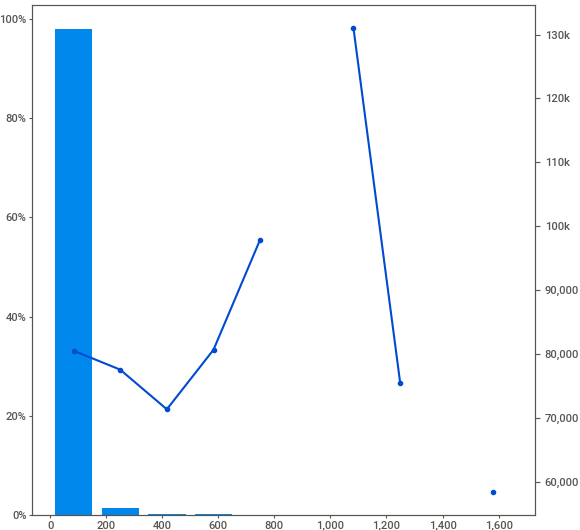
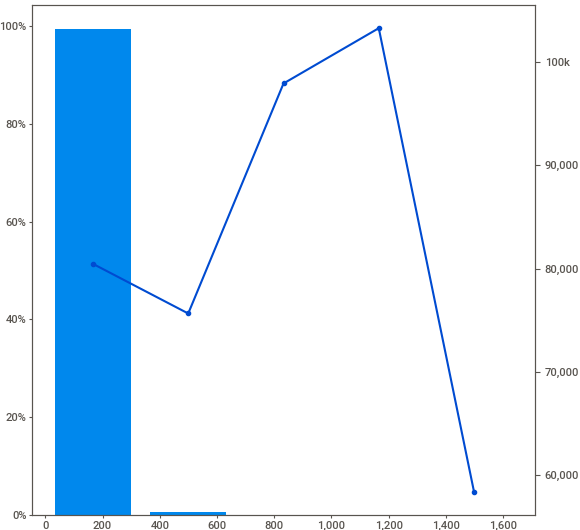
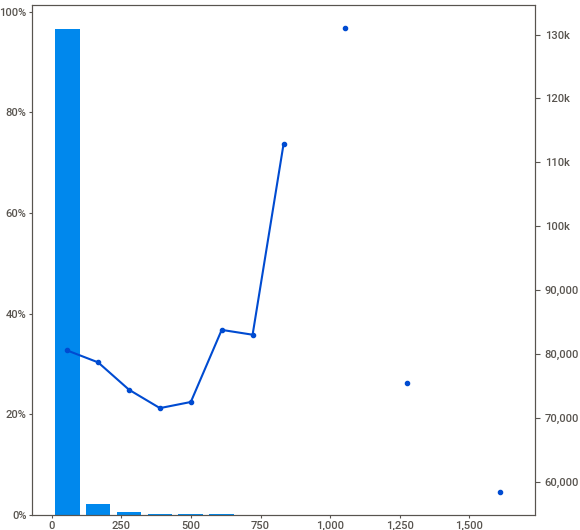
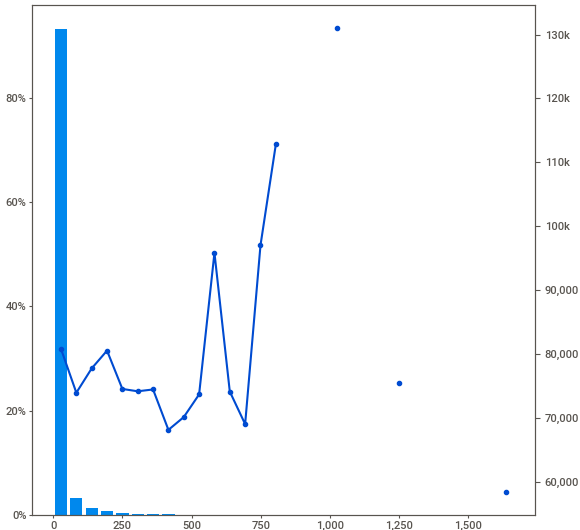
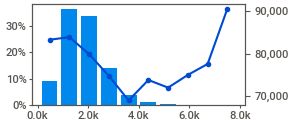
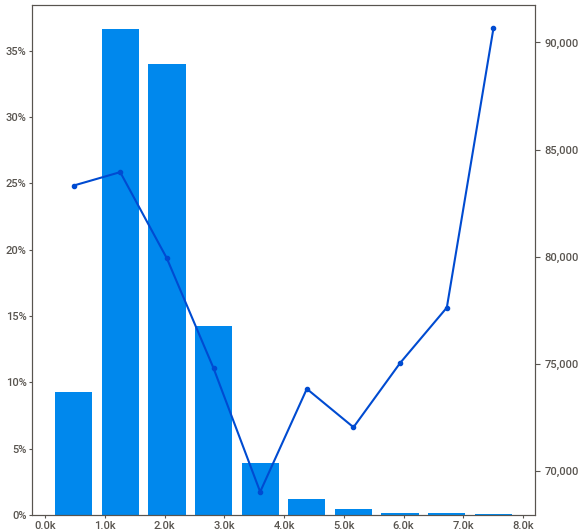
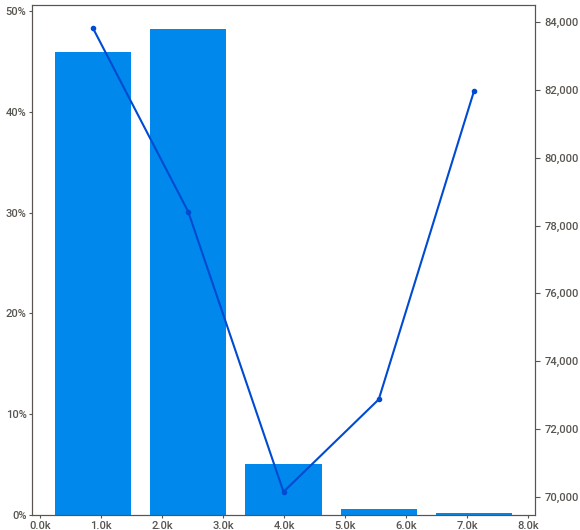
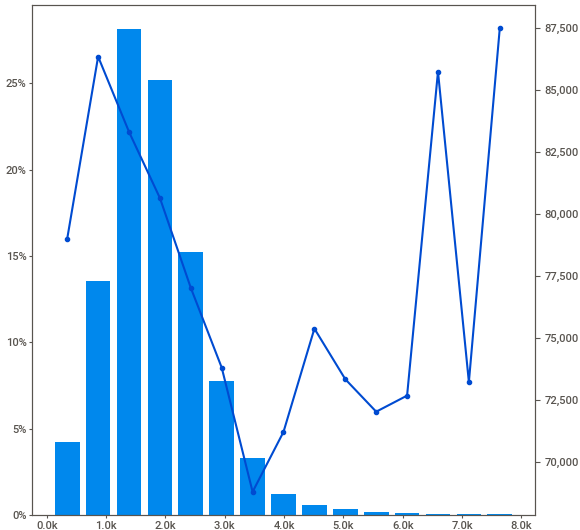
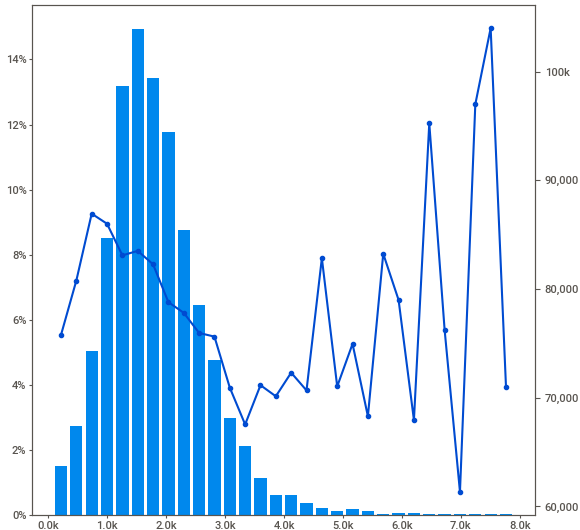
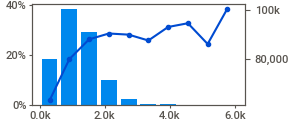
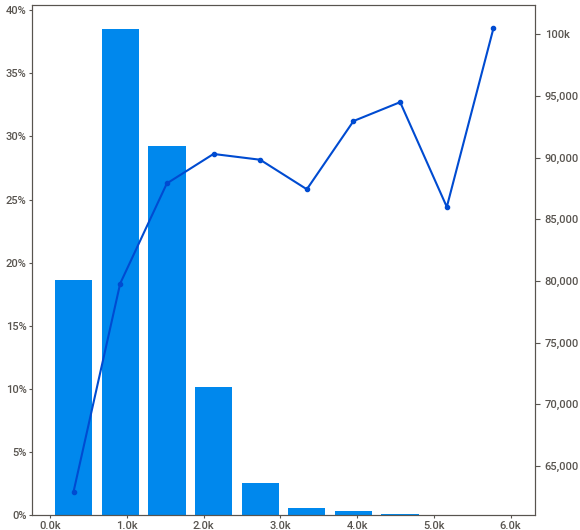
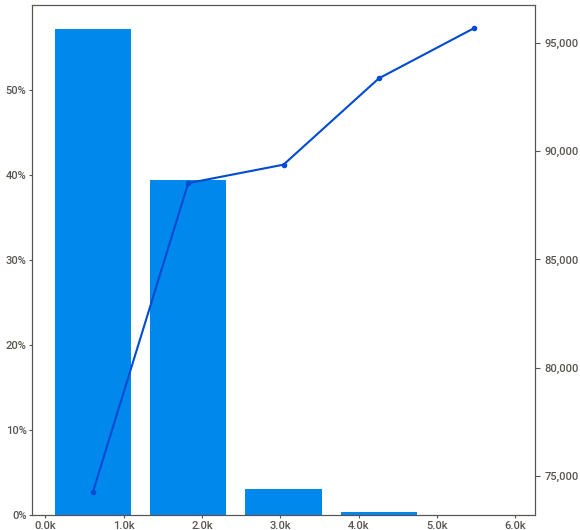
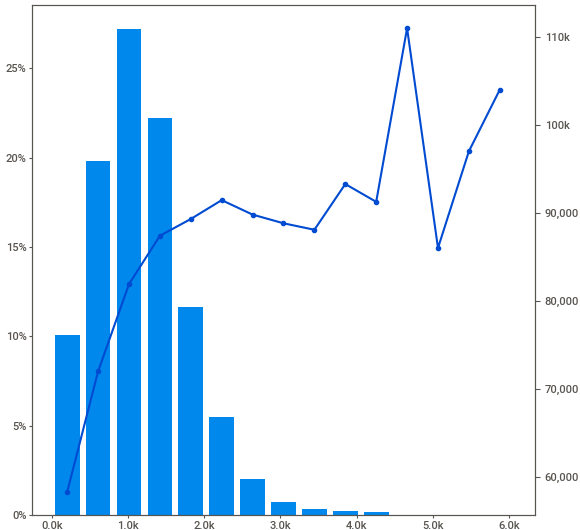
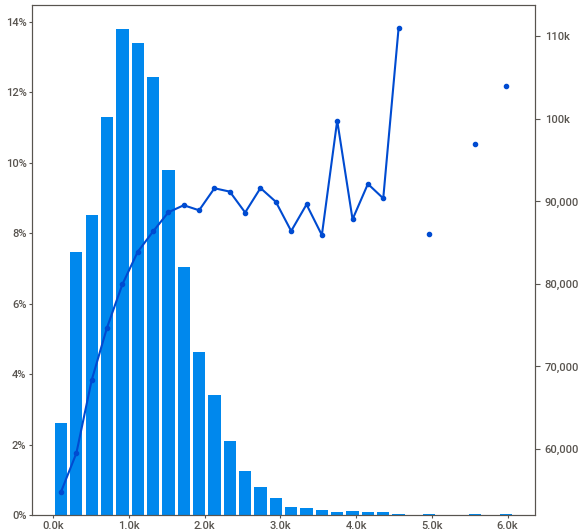
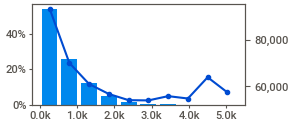
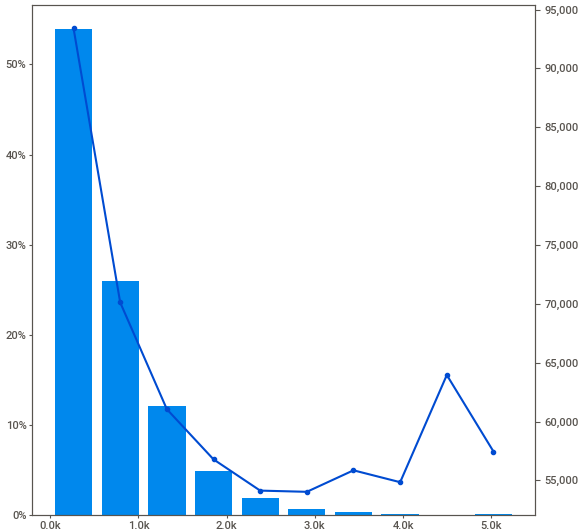
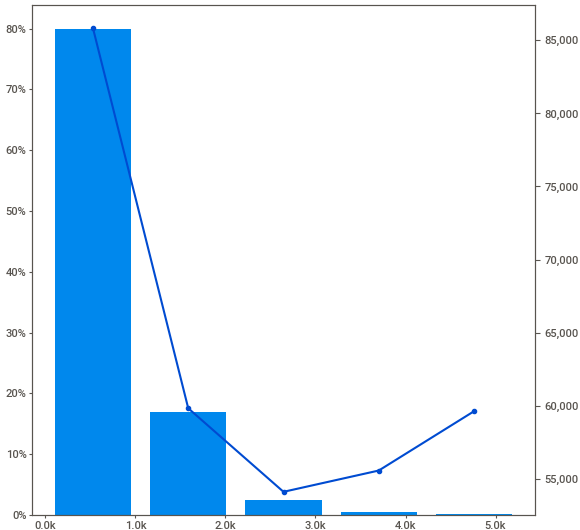
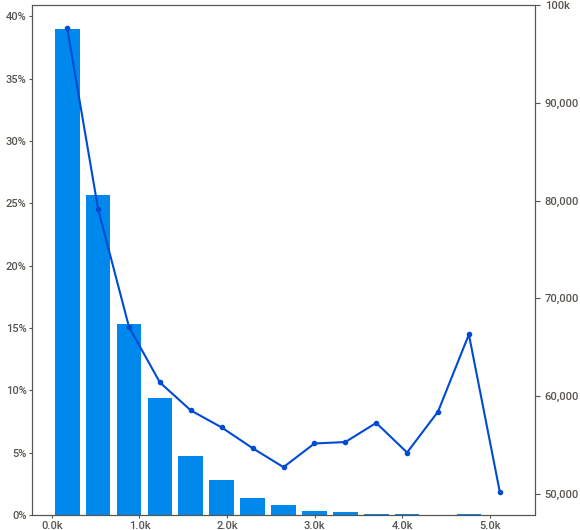
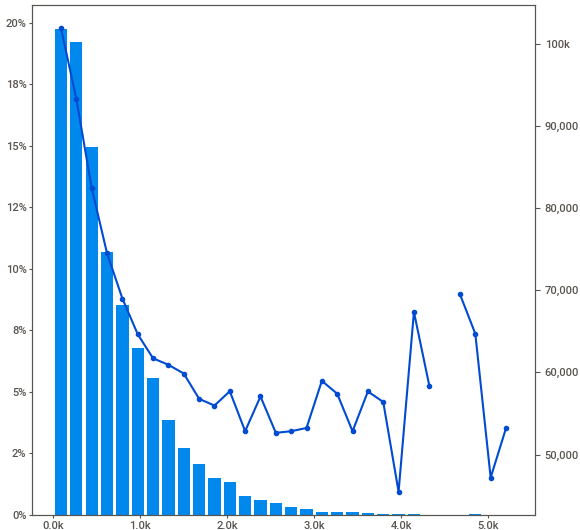
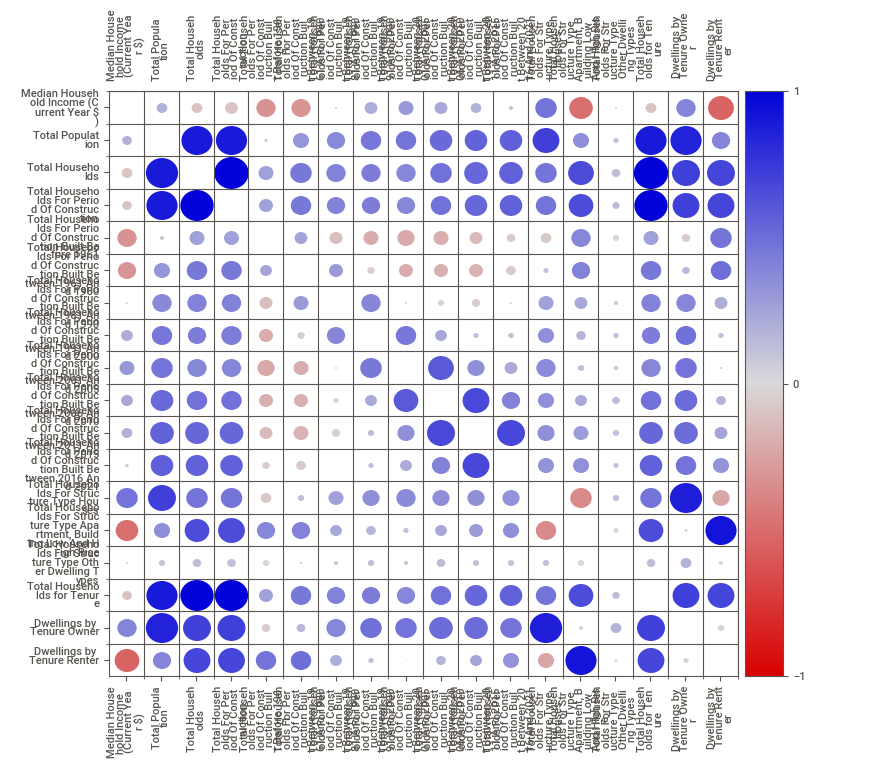
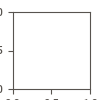

In [ ]:
analyze_report.show_html('report.html')
import IPython
IPython.display.HTML('report.html')

<Axes: >

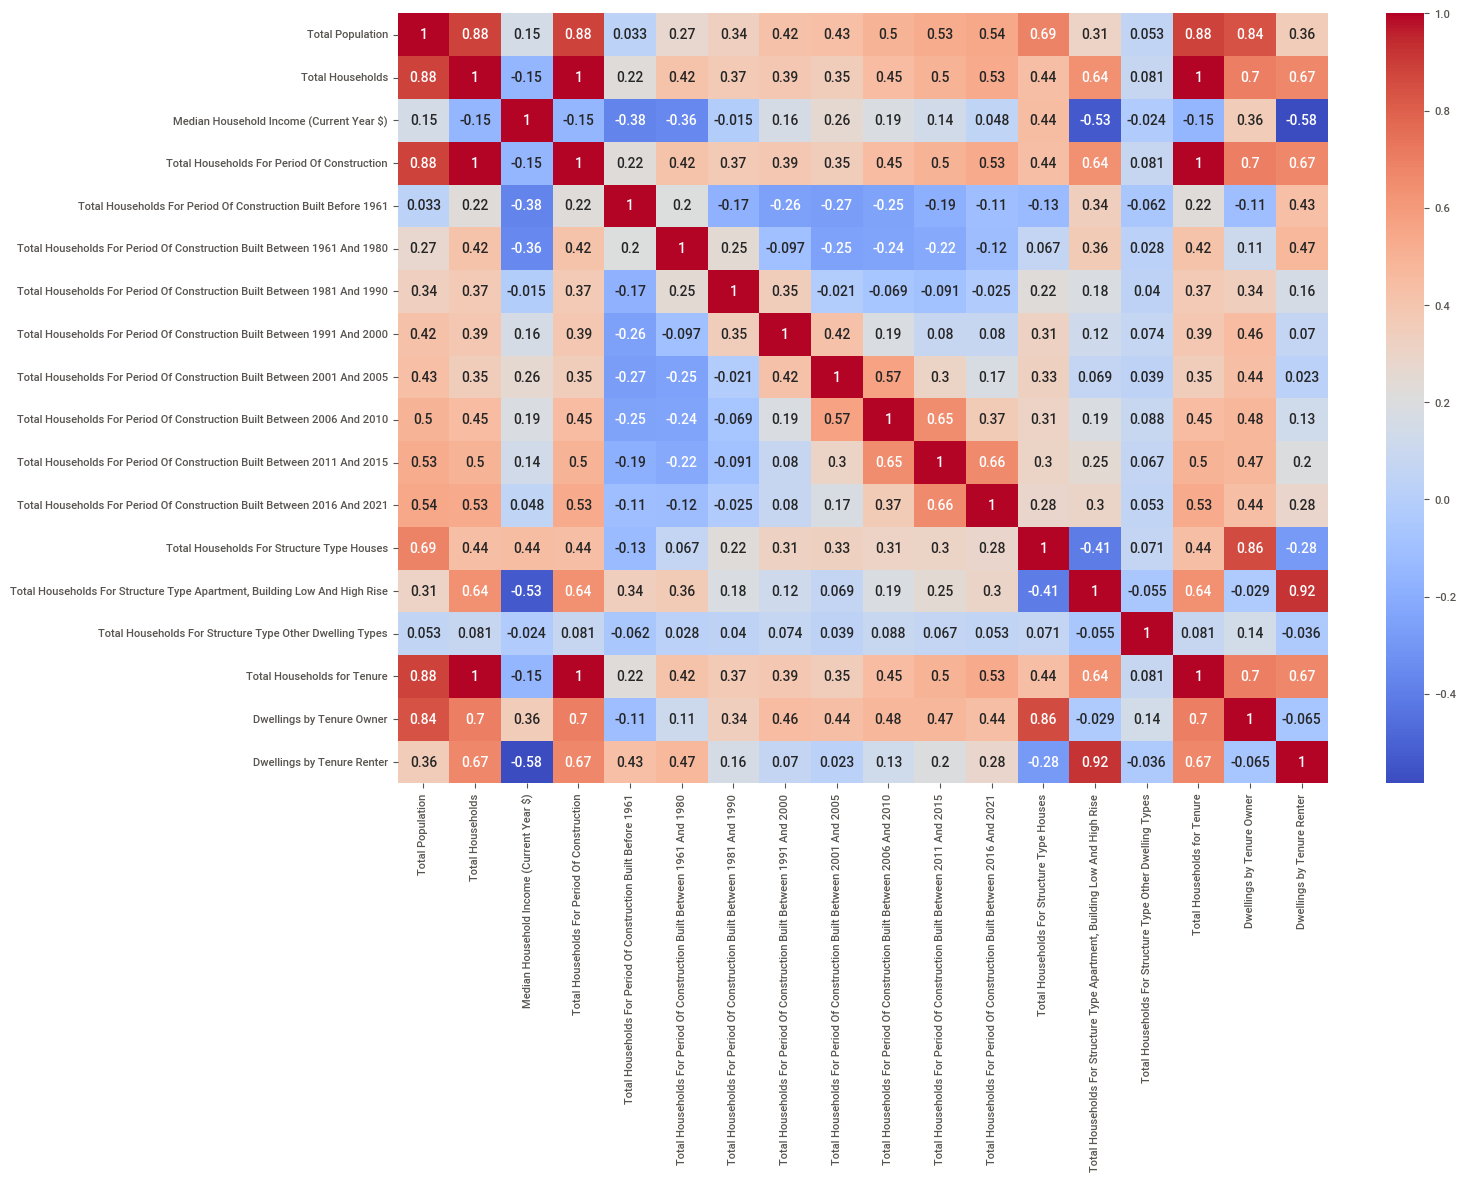

In [ ]:
# Drawing a Heatmap for the variables
plt.figure(figsize = (15,10))
sns.heatmap(data_train.corr(),annot=True, cmap = 'coolwarm')

From the EDA report generated above, we observe the following:


1.   Variables **Total Households**, **Total Households for Period Construction**, and **Total Households for Tenure** are perfectly correlated with each other.
2.   **Total Households** and **Total Population** is highly correlated (i.e. 0.88).
3.   **Dwellings by Tenure Owner** and **Total Households For Structure Type Houses** are hightly correlated (corr = 0.86), similarly we find that **Dwellings by Tenure Renter** and **Total Households For Structure Type Apartment, Building Low And High Rise** are hightly correlated too (corr = 0.92).
4.   The percentage of **Total Households For Structure Type Other Dwelling Types** of total households are very small in many Census Tracts.
5.   Variables of the type **Total Households For Structure Type...** generally exhibited a higher association with the response variable (so perhaps we should only include one set of these two variables)
6.   Variables **Total Households**, **Total Population**, **Total Households for Period Construction**, and **Total Households for Tenure** showed no (or very trivial) association with the response variable.

Steps of Data Preprocessing:
1.   We can remove **Total Households for Period Construction** and **Total Households for Tenure** as **Total Households** includes both.
2.   We can remove **Total Population** as it is (1). highly correlated with **Total Households**.
3.   We can remove the variables of the type **Dwellings by...** as they are highly correlated with the variables of the type **Total Households For Structure Type...** as mentioned above.
4.   **Total Households For Structure Type Other Dwelling Types** also had no association with the response variable. So we can derive a new column called **% of Total Households For Structure Type Houses**
5.  Similarly we derive percentage columns for **Total Households For Period Of Construction...** in order to provide better insights for our analysis.







### Data Preprocessing Based on EDA

In [13]:
# remove Total Households for Period Construction, Total Households for Tenure and Total Population
train_cleaned = data_train.drop(columns = ["Total Households For Period Of Construction",
                                           "Total Households for Tenure",
                                           "Total Population",
                                           "Dwellings by Tenure Owner",
                                           "Dwellings by Tenure Renter"])

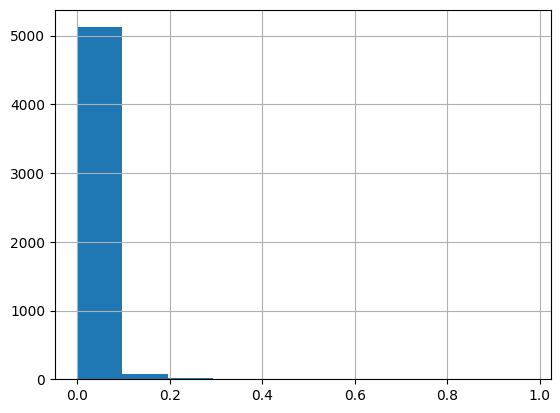

In [14]:
train_cleaned['pct_str_other'] = train_cleaned['Total Households For Structure Type Other Dwelling Types'] / train_cleaned['Total Households']
train_cleaned['pct_str_other'].hist()
train_cleaned.drop(columns= ['pct_str_other'], inplace = True) # delete after analysis

In [15]:
# Adding derived columns - percentages

train_cleaned["pct_1961_before"] = train_cleaned['Total Households For Period Of Construction Built Before 1961'] / train_cleaned['Total Households']
train_cleaned["pct_1961_1980"] = train_cleaned['Total Households For Period Of Construction Built Between 1961 And 1980'] / train_cleaned['Total Households']
train_cleaned["pct_1981_1990"] = train_cleaned['Total Households For Period Of Construction Built Between 1981 And 1990'] / train_cleaned['Total Households']
train_cleaned["pct_1991_2000"] = train_cleaned['Total Households For Period Of Construction Built Between 1991 And 2000'] / train_cleaned['Total Households']
train_cleaned["pct_2001_2005"] = train_cleaned['Total Households For Period Of Construction Built Between 2001 And 2005'] / train_cleaned['Total Households']
train_cleaned["pct_2006_2010"] = train_cleaned['Total Households For Period Of Construction Built Between 2006 And 2010'] / train_cleaned['Total Households']
train_cleaned["pct_2011_2015"] = train_cleaned['Total Households For Period Of Construction Built Between 2011 And 2015'] / train_cleaned['Total Households']
train_cleaned["pct_2016_2021"] = train_cleaned['Total Households For Period Of Construction Built Between 2016 And 2021'] / train_cleaned['Total Households']
train_cleaned["pct_house"] = train_cleaned['Total Households For Structure Type Houses'] / train_cleaned['Total Households']

# Dropping originals
train_cleaned.drop(columns= ["Total Households For Structure Type Apartment, Building Low And High Rise",
                             "Total Households For Structure Type Other Dwelling Types",
                             "Total Households For Structure Type Houses",
                             'Total Households For Period Of Construction Built Before 1961',
                             'Total Households For Period Of Construction Built Between 1961 And 1980',
                             'Total Households For Period Of Construction Built Between 1981 And 1990',
                             'Total Households For Period Of Construction Built Between 1991 And 2000',
                             'Total Households For Period Of Construction Built Between 2001 And 2005',
                             'Total Households For Period Of Construction Built Between 2006 And 2010',
                             'Total Households For Period Of Construction Built Between 2011 And 2015',
                             'Total Households For Period Of Construction Built Between 2016 And 2021'], inplace = True)



In [ ]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5245 entries, 0 to 5370
Data columns (total 13 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Total Households                                                           5245 non-null   float64
 1   Median Household Income (Current Year $)                                   5245 non-null   float64
 2   Total Households For Period Of Construction Built Before 1961              5245 non-null   float64
 3   Total Households For Period Of Construction Built Between 1961 And 1980    5245 non-null   float64
 4   Total Households For Period Of Construction Built Between 1981 And 1990    5245 non-null   float64
 5   Total Households For Period Of Construction Built Between 1991 And 2000    5245 non-null   float64
 6   Total Households For Period Of Construction Built Betwee

In [ ]:
#Generate an EDA using the Sweetviz Package
analyze_report = sv.analyze(train_cleaned, "Median Household Income (Current Year $)")

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



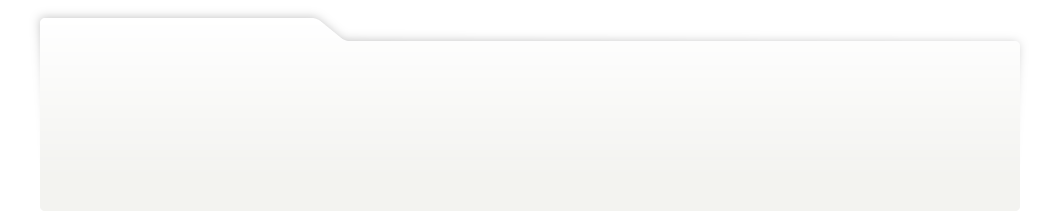
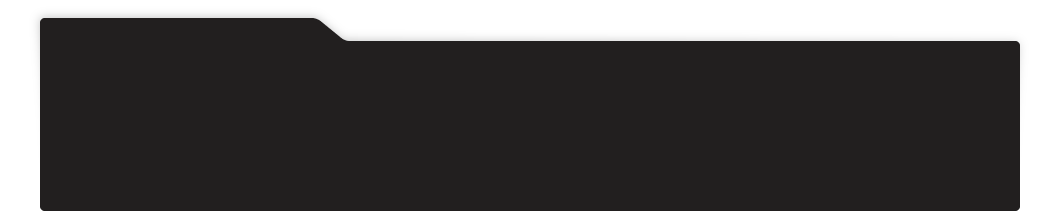
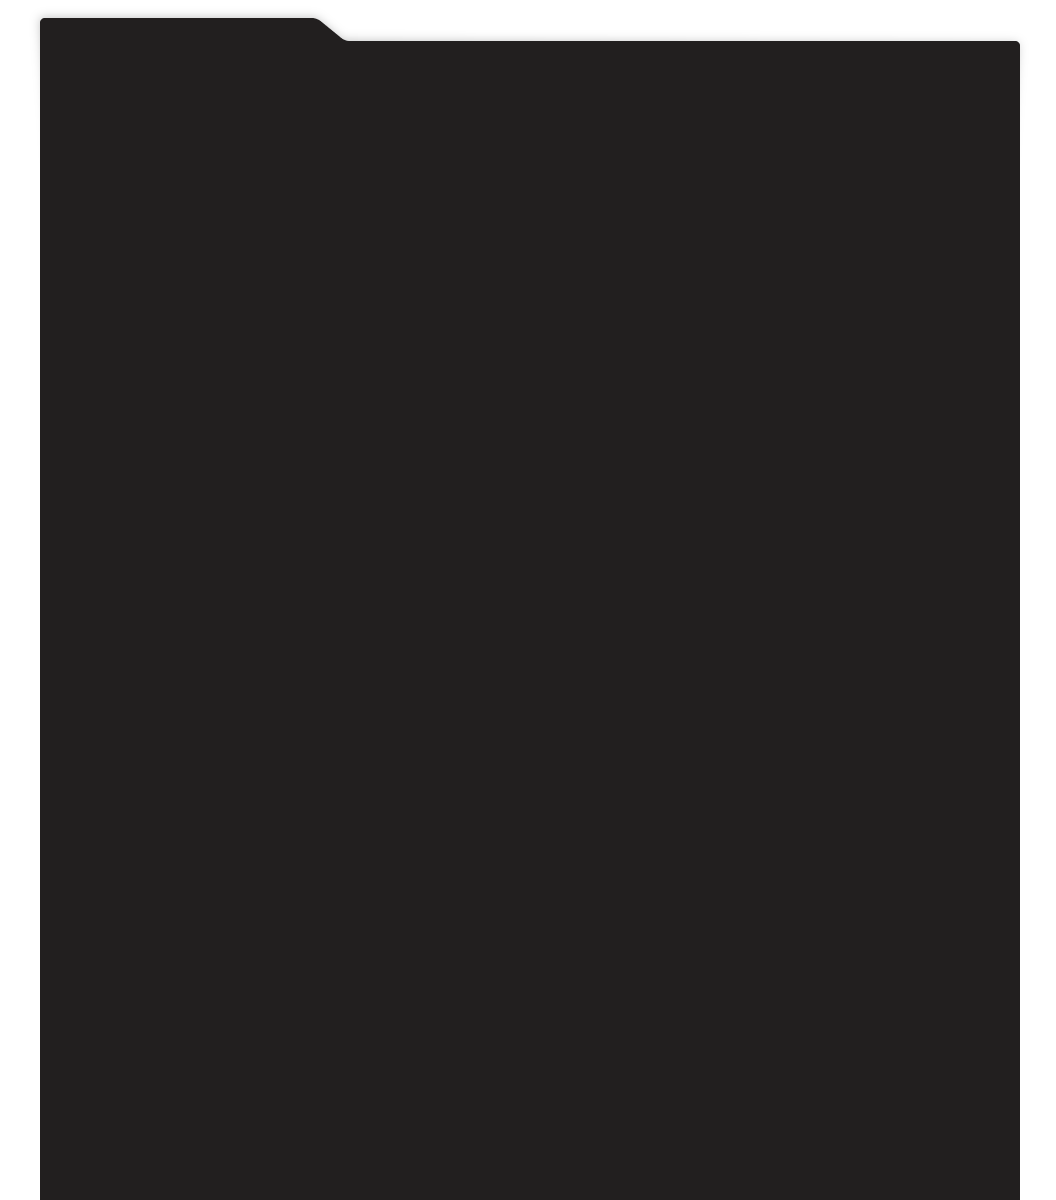
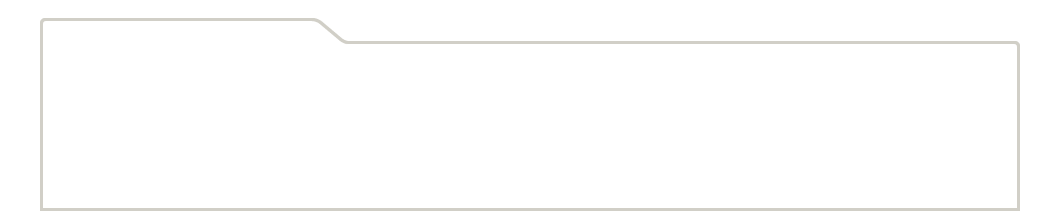
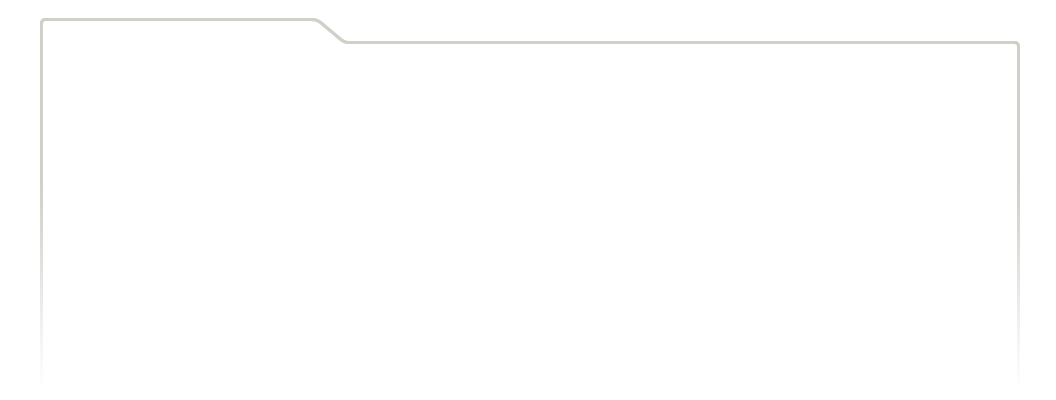
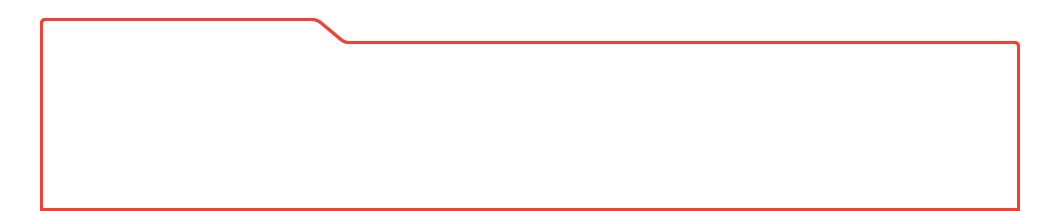
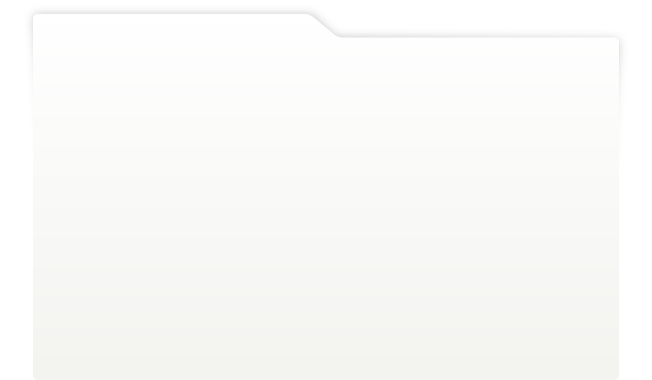
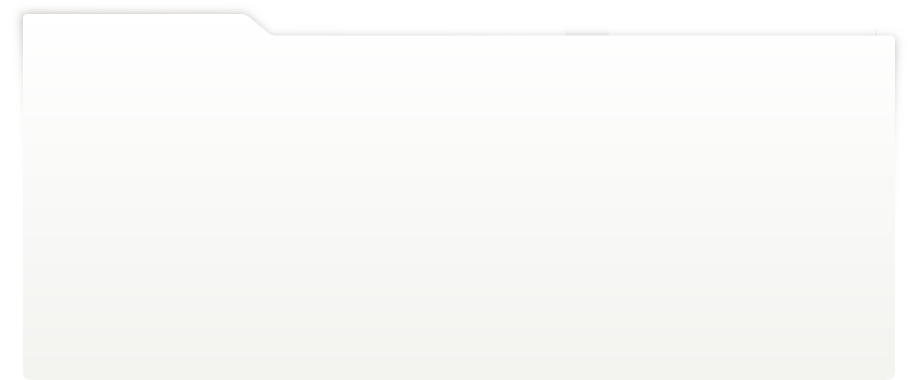
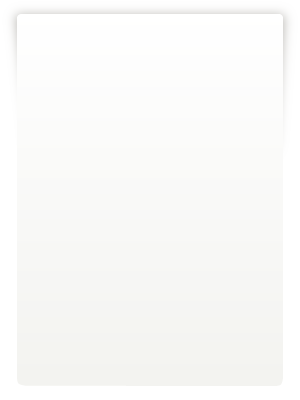
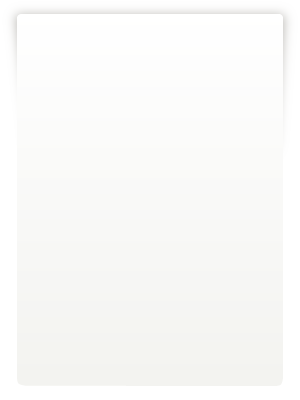
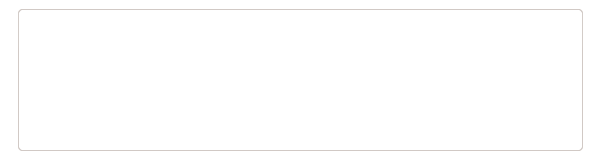
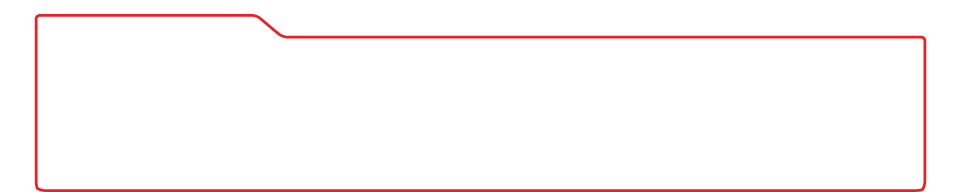
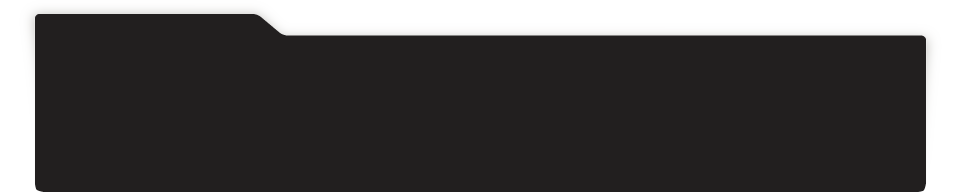
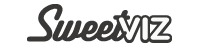
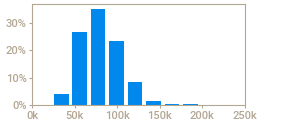
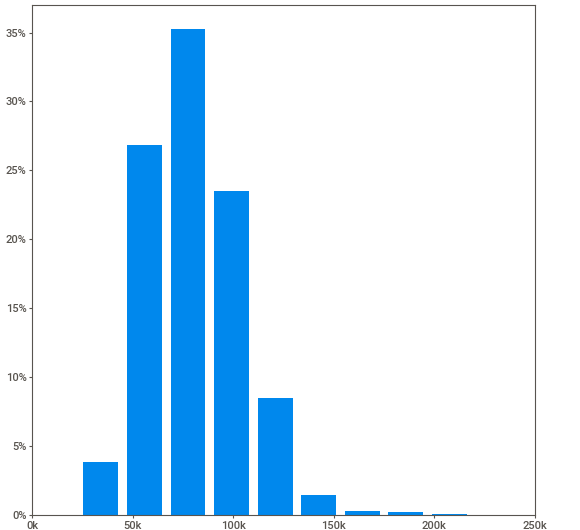
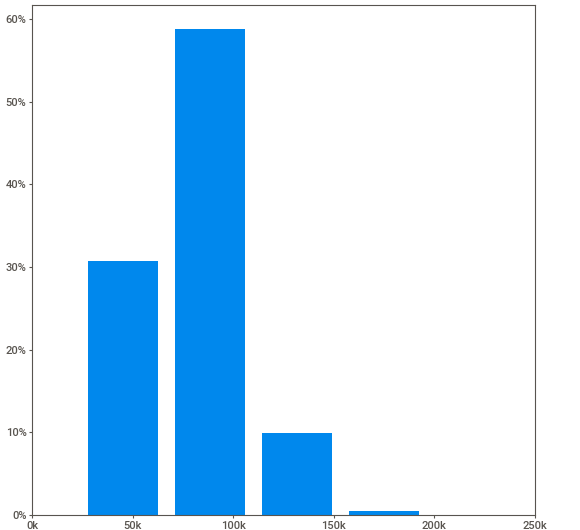
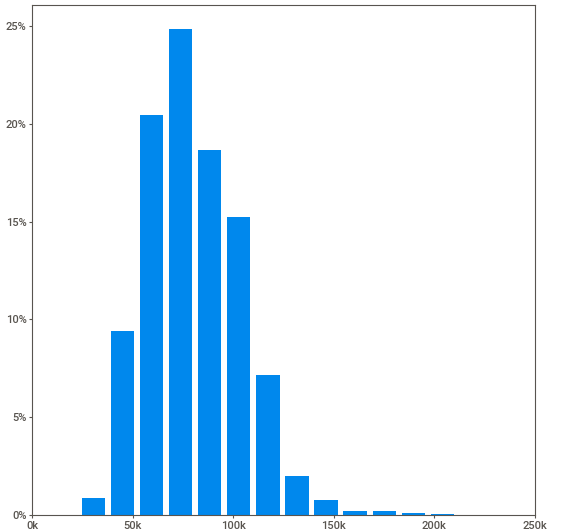
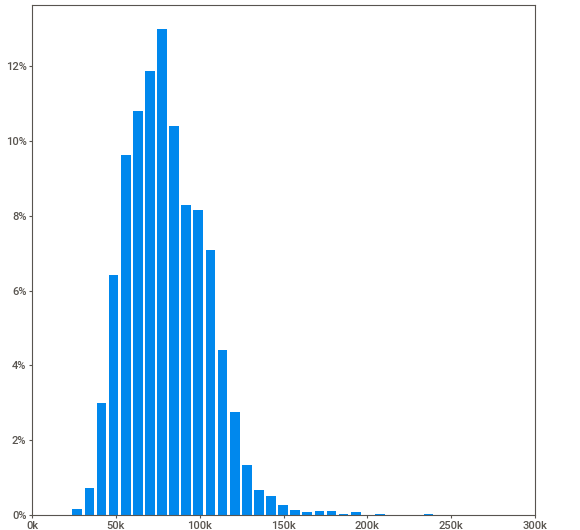
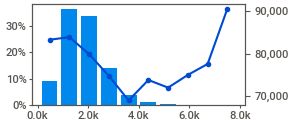
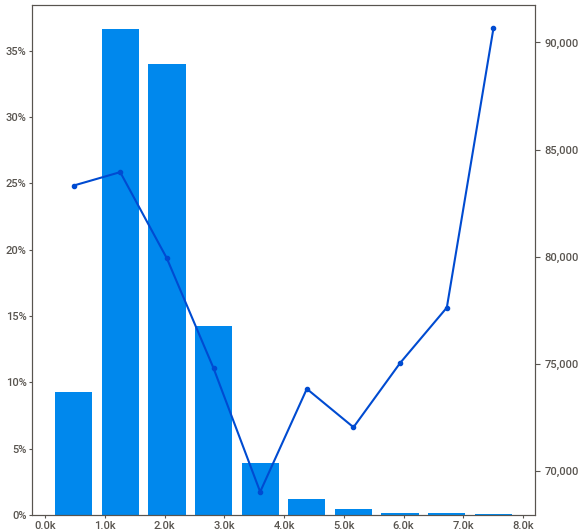
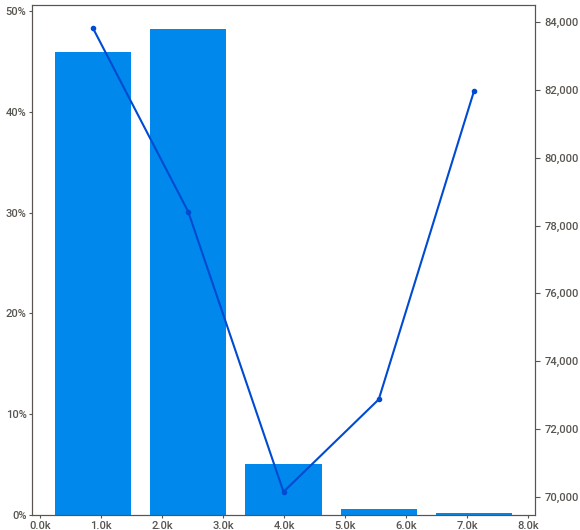
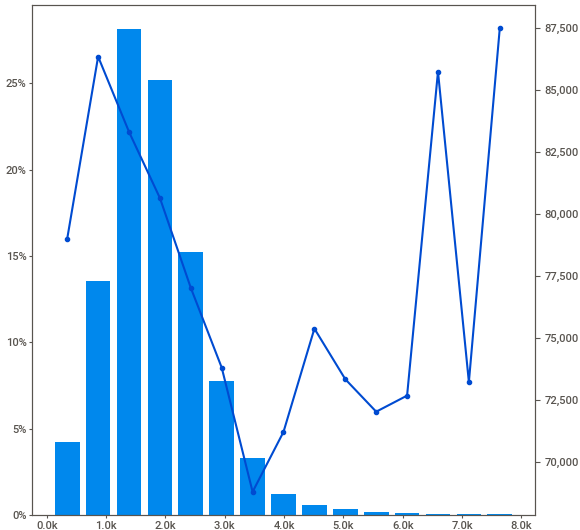
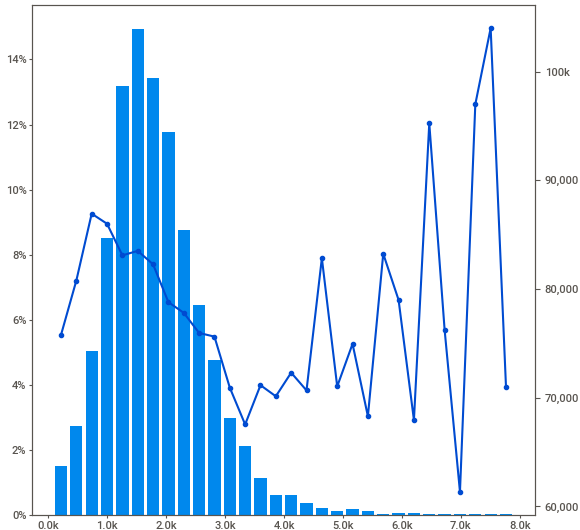
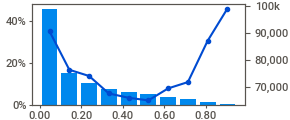
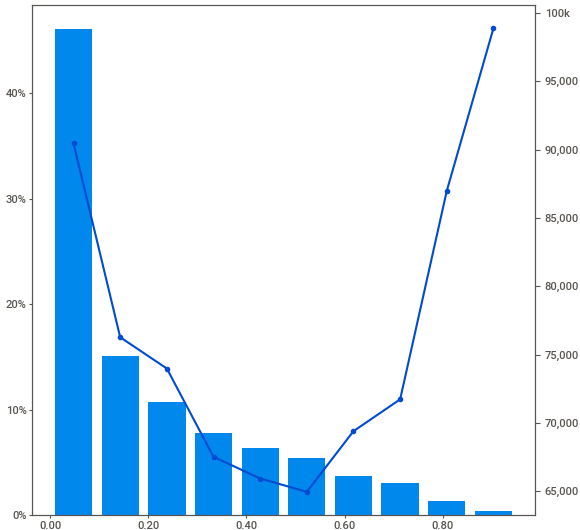
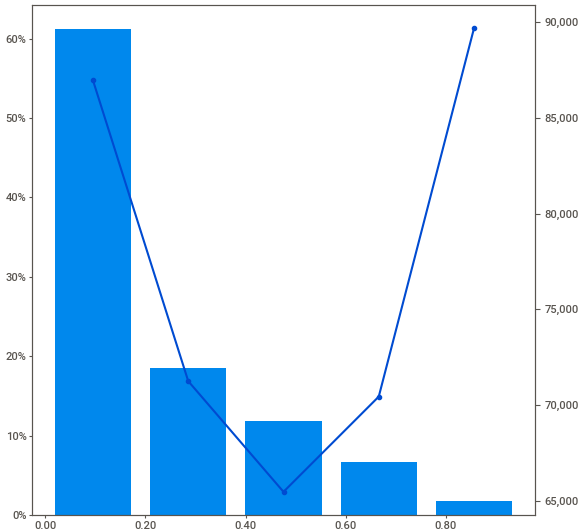
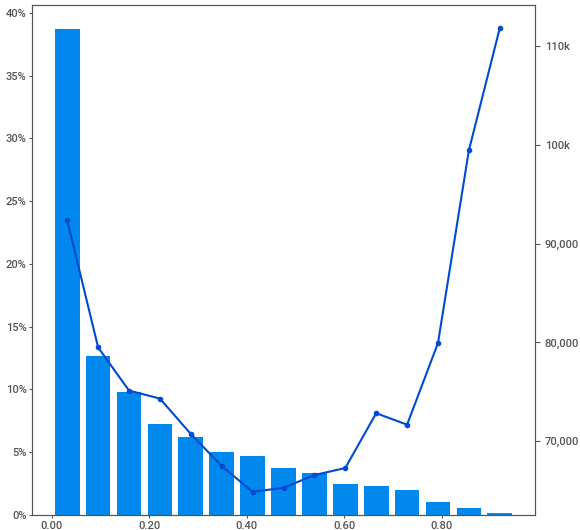
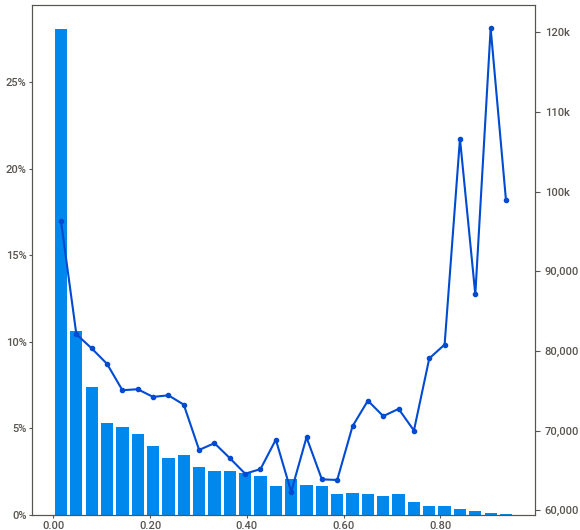
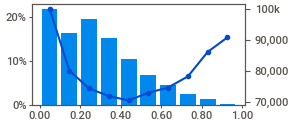
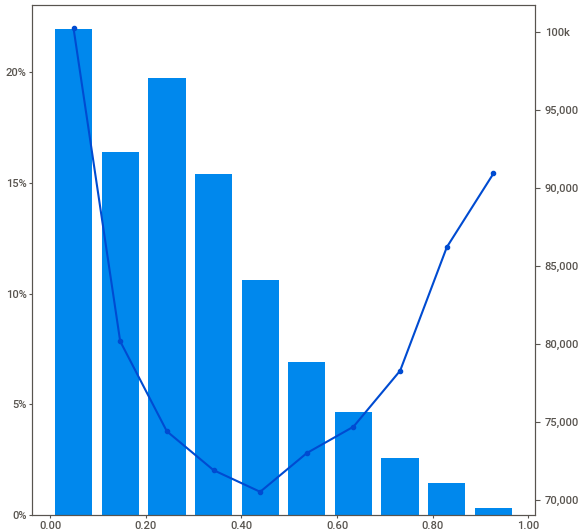
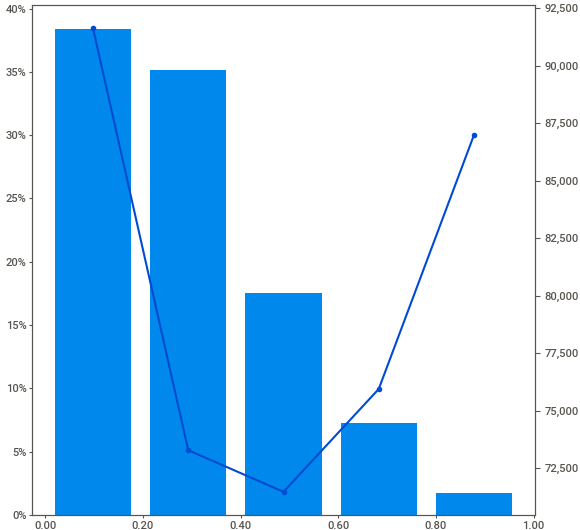
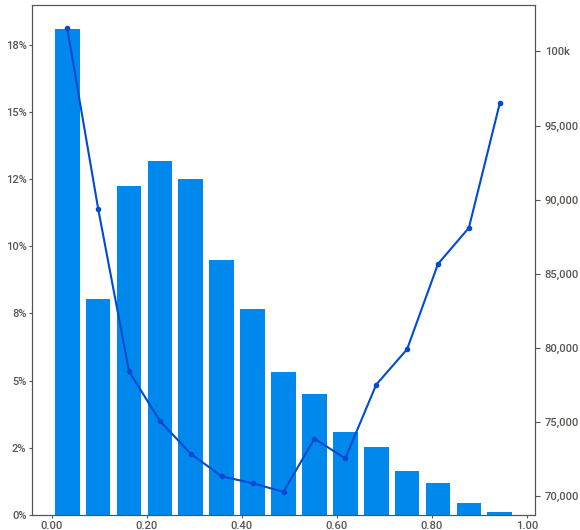
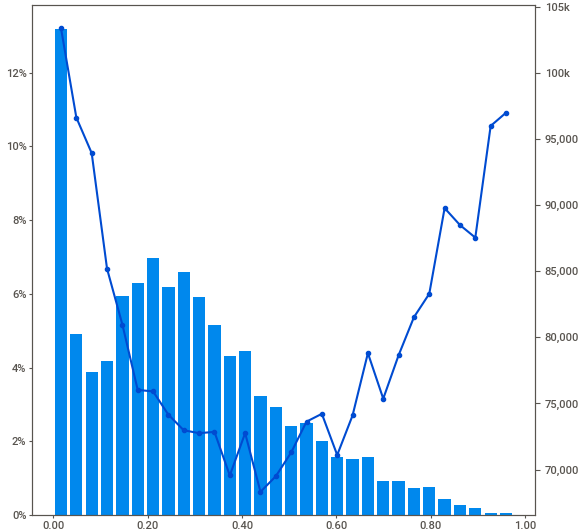
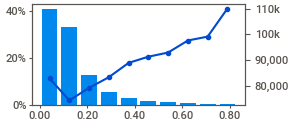
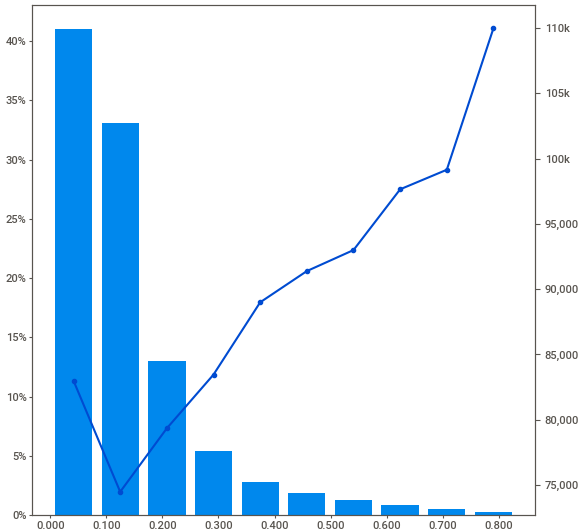
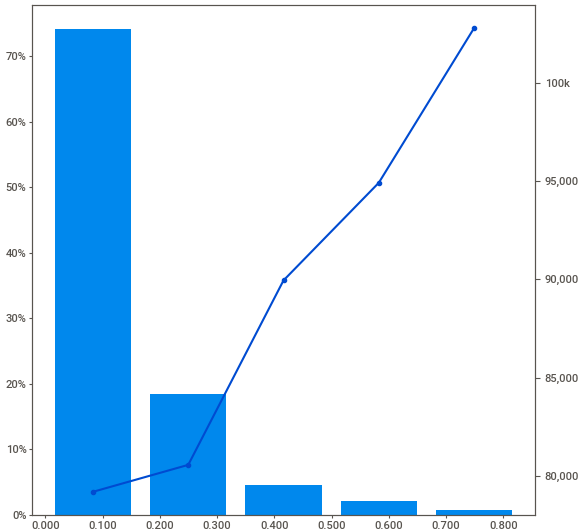
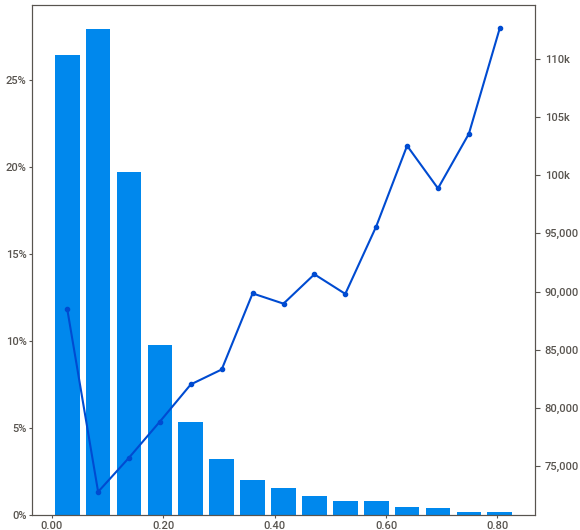
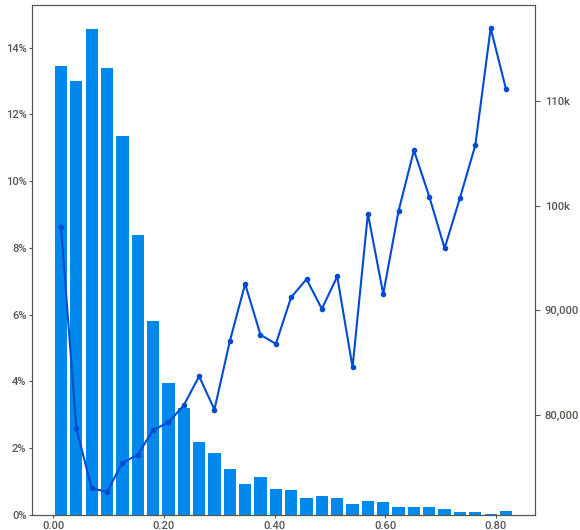
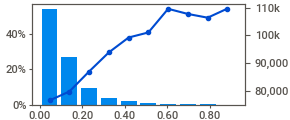
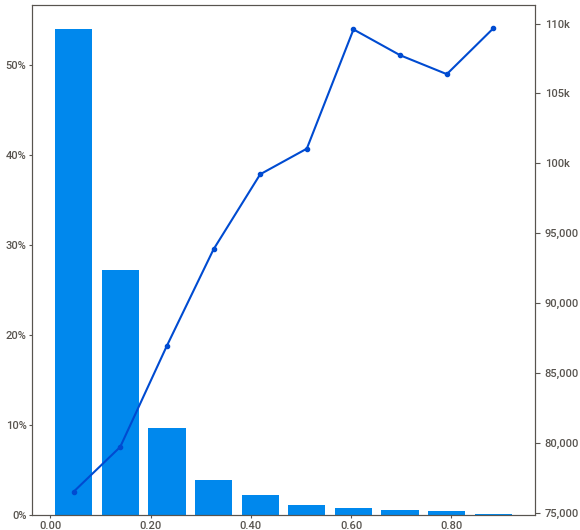
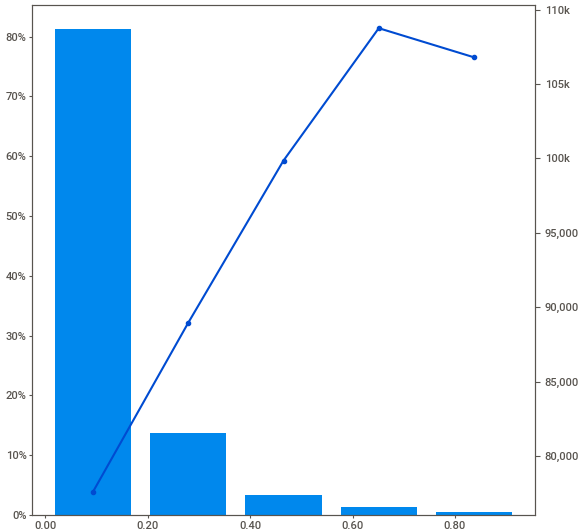
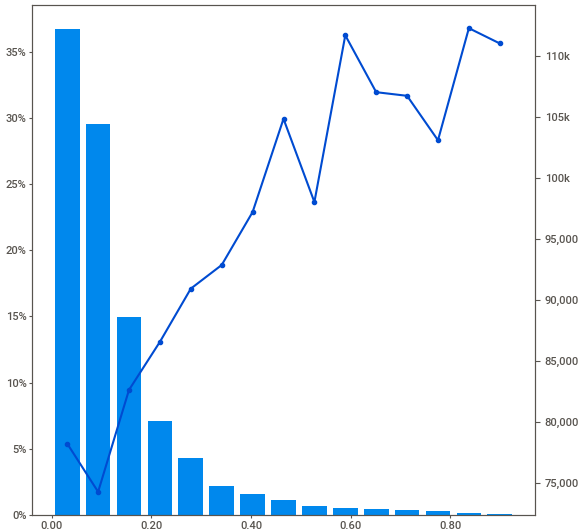
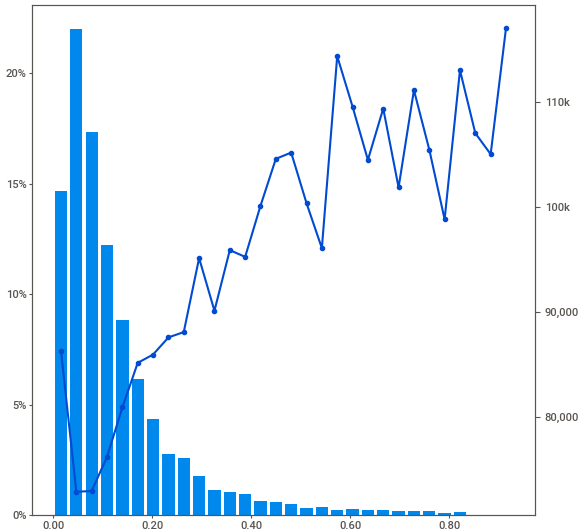
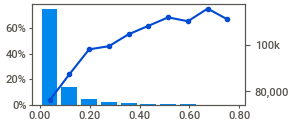
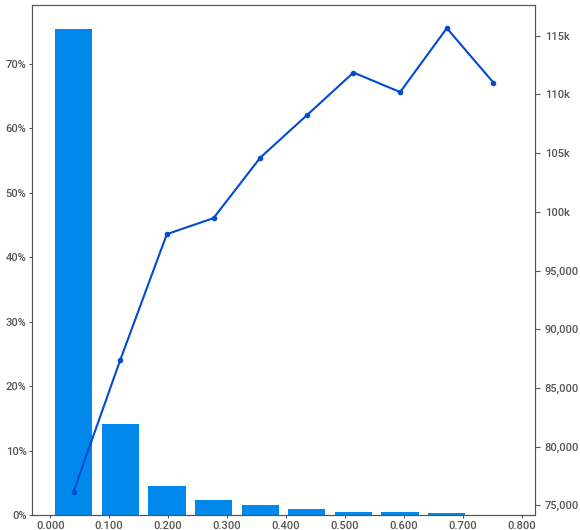
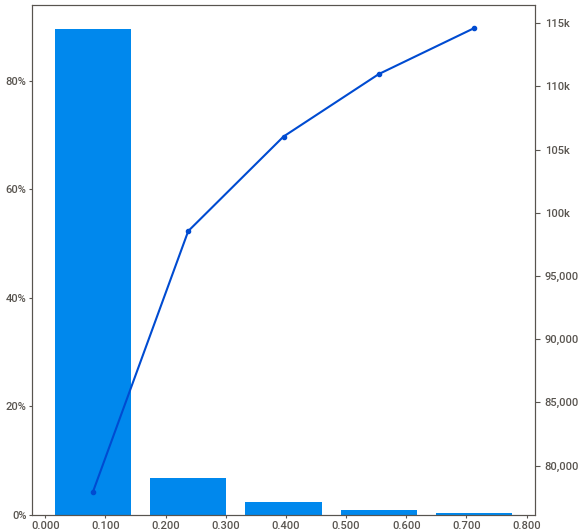
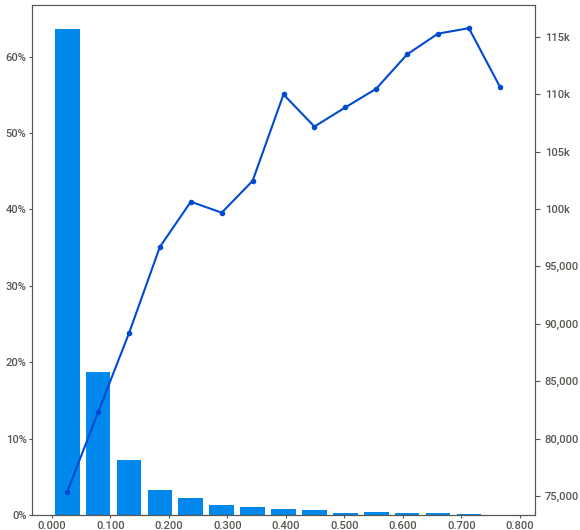
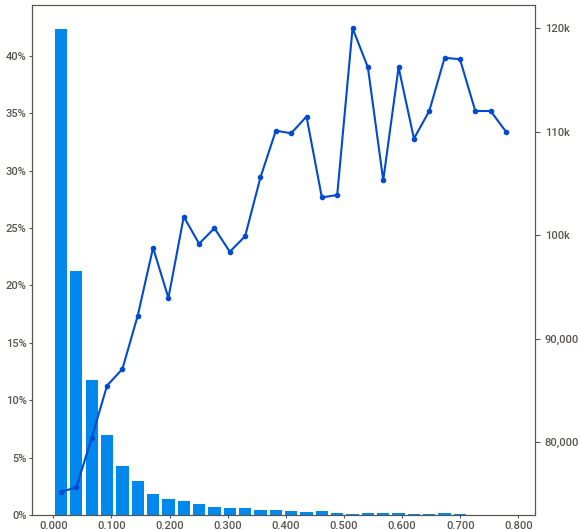
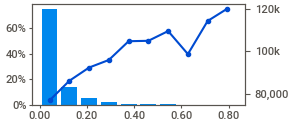
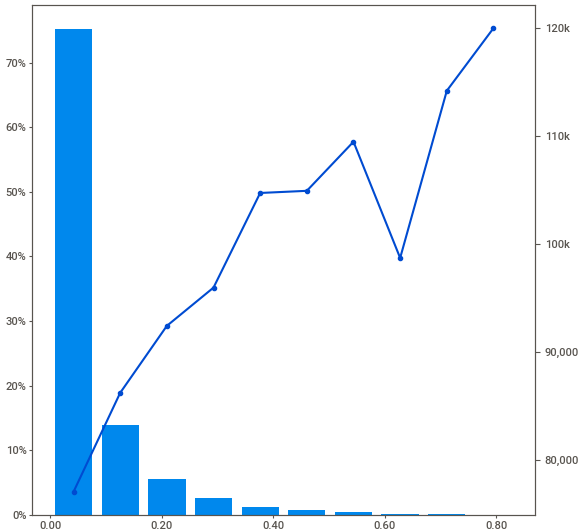
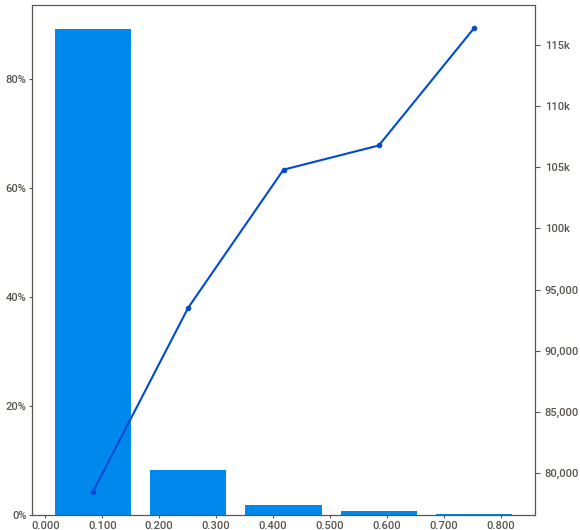
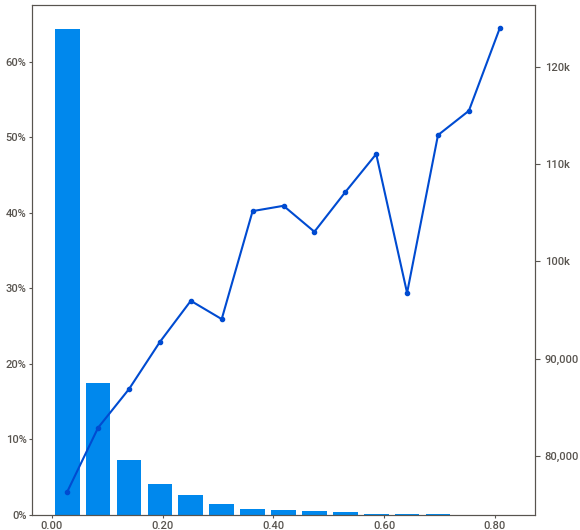
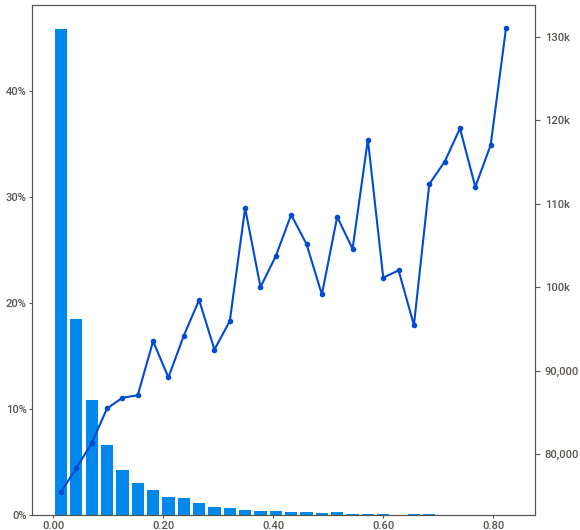
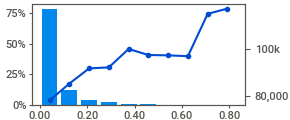
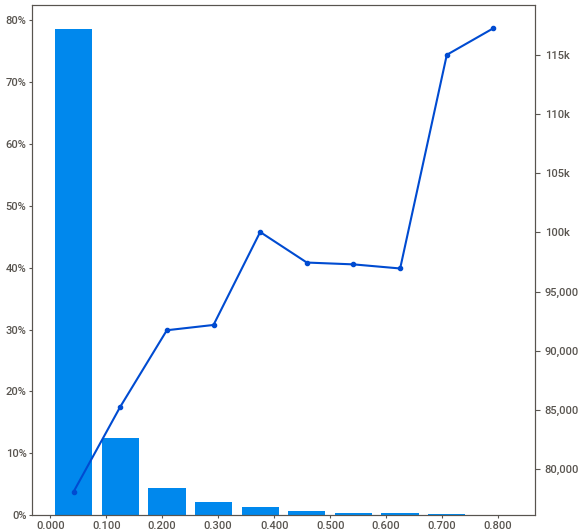
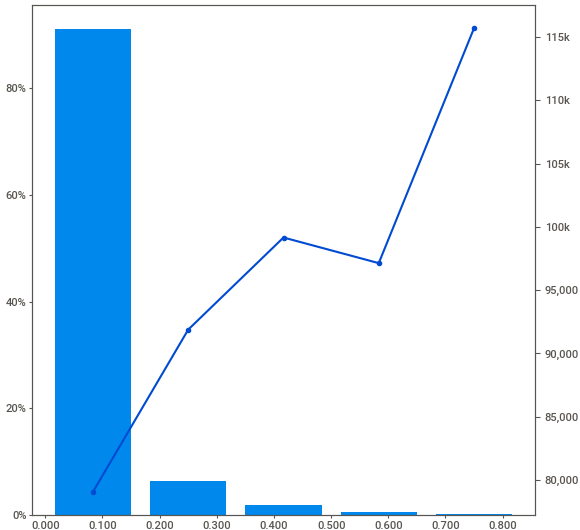
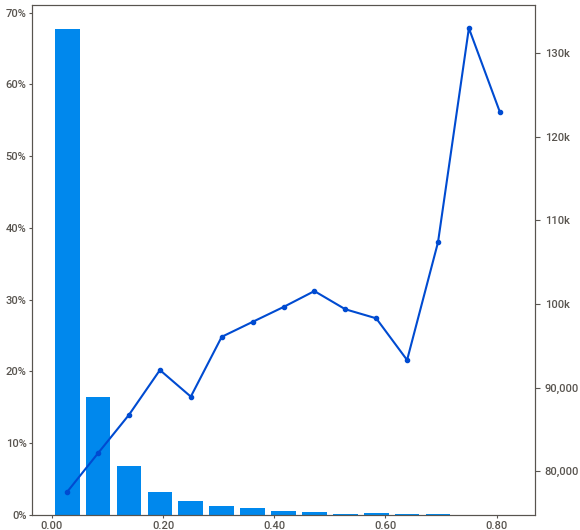
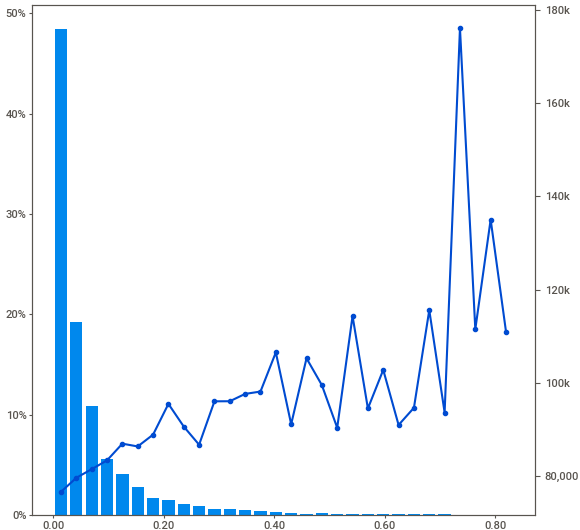
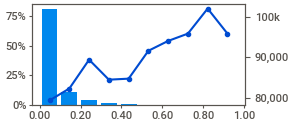
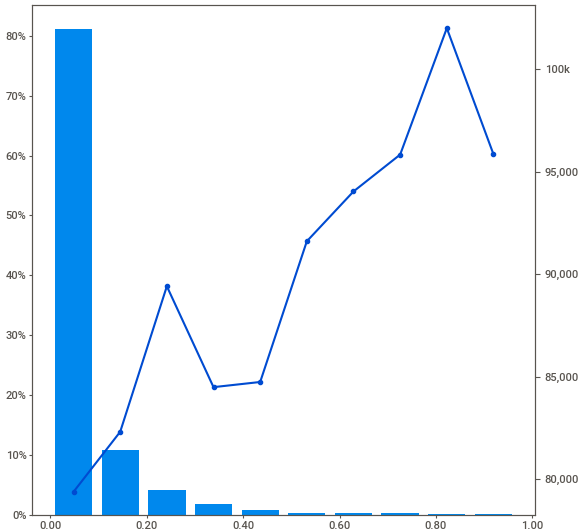
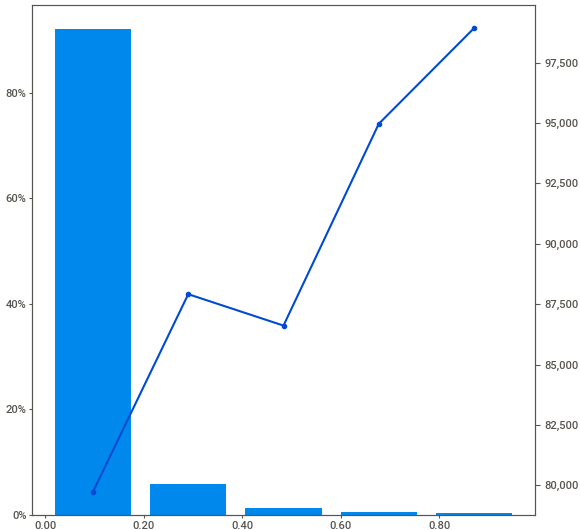
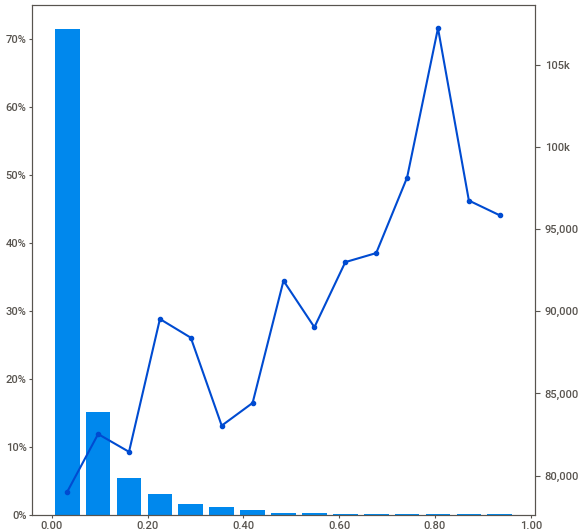
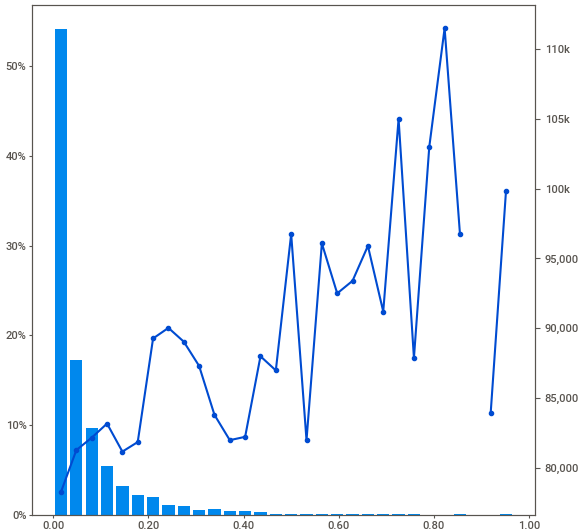
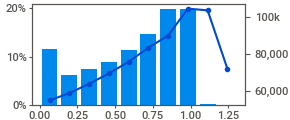
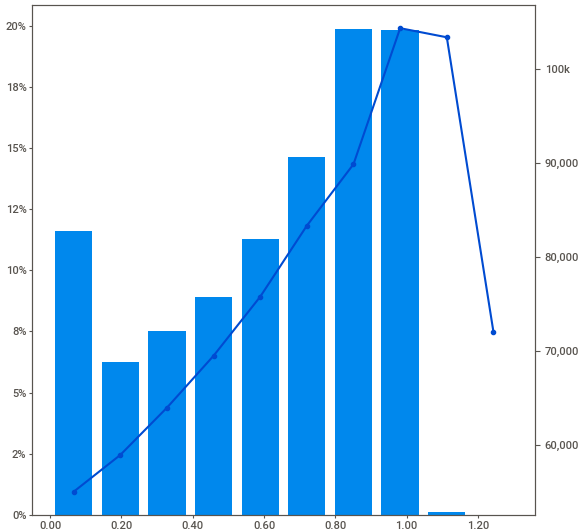
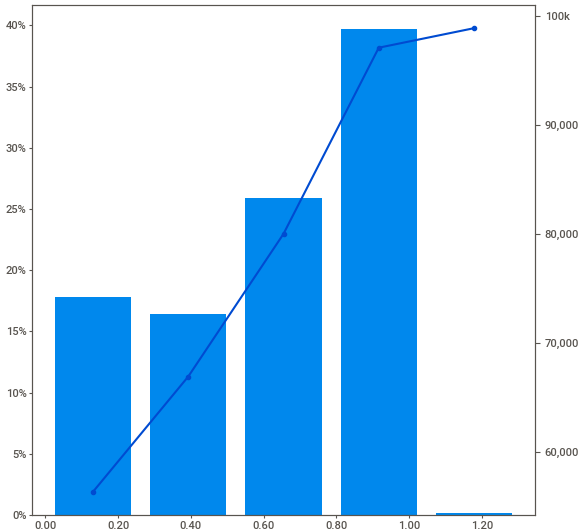
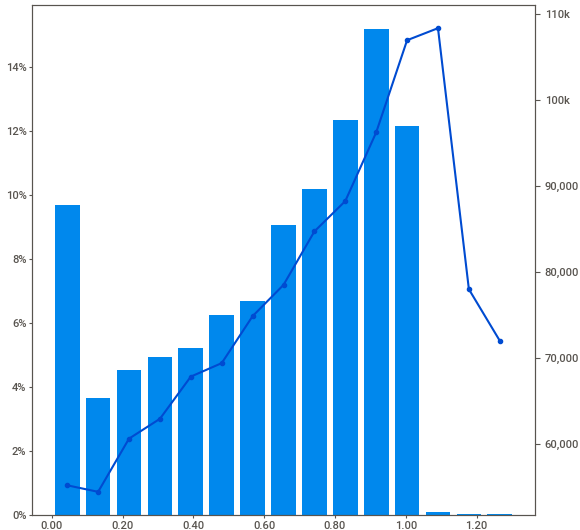
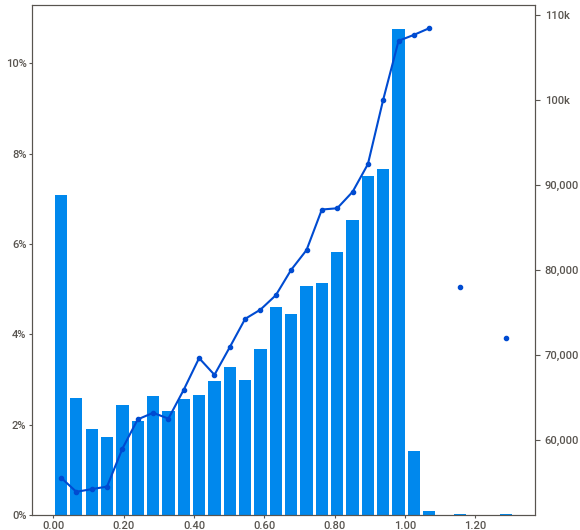
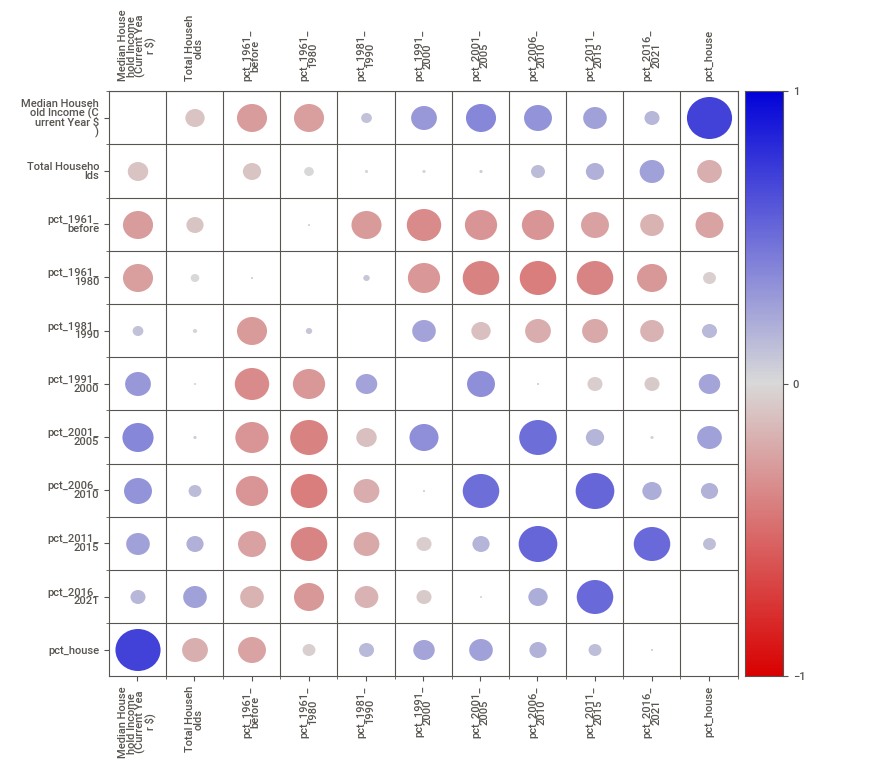
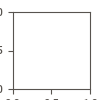

In [ ]:
analyze_report.show_html('report.html')
IPython.display.HTML('report.html')

In [ ]:
train_cleaned.head()

Total Households  Median Household Income (Current Year $)  \
0            1235.0                                  107000.0   
1            1665.0                                  111000.0   
2            2775.0                                  105000.0   
3            1775.0                                   65000.0   
4            1385.0                                  101000.0   

   pct_1961_before  pct_1961_1980  pct_1981_1990  pct_1991_2000  \
0         0.020243       0.914980       0.040486       0.012146   
1         0.000000       0.000000       0.000000       0.009009   
2         0.037838       0.054054       0.086486       0.436036   
3         0.118310       0.619718       0.146479       0.047887   
4         0.007220       0.137184       0.729242       0.119134   

   pct_2001_2005  pct_2006_2010  pct_2011_2015  pct_2016_2021  pct_house  
0       0.008097       0.008097       0.000000       0.000000   0.919028  
1       0.012012       0.225225       0.189189       0.561562   0.963964  
2       0.200000       0.059459       0.086486       0.043243   0.855856  
3       0.019718       0.025352       0.016901       0.008451   0.712676  
4       0.000000       0.000000       0.007220       0.000000   0.747292

In [ ]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5245 entries, 0 to 5370
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Total Households                          5245 non-null   float64
 1   Median Household Income (Current Year $)  5245 non-null   float64
 2   pct_1961_before                           5245 non-null   float64
 3   pct_1961_1980                             5245 non-null   float64
 4   pct_1981_1990                             5245 non-null   float64
 5   pct_1991_2000                             5245 non-null   float64
 6   pct_2001_2005                             5245 non-null   float64
 7   pct_2006_2010                             5245 non-null   float64
 8   pct_2011_2015                             5245 non-null   float64
 9   pct_2016_2021                             5245 non-null   float64
 10  pct_house                           

### Data Visualization


<Axes: title={'center': 'Distribution of Income - Original'}, xlabel='Income', ylabel='Count'>

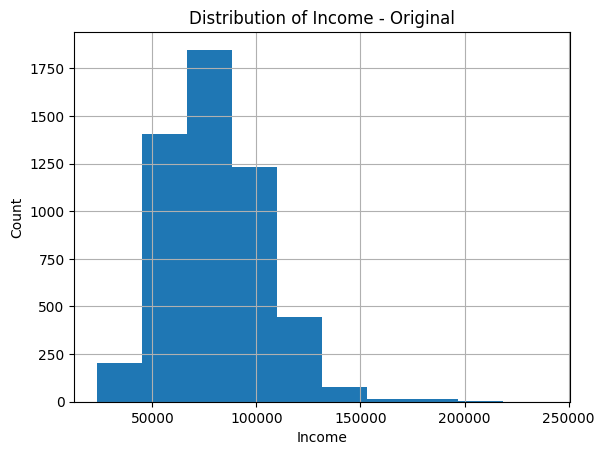

In [ ]:
plt.title('Distribution of Income - Original')
plt.xlabel('Income')
plt.ylabel('Count')
train_cleaned['Median Household Income (Current Year $)'].hist()

<Axes: >

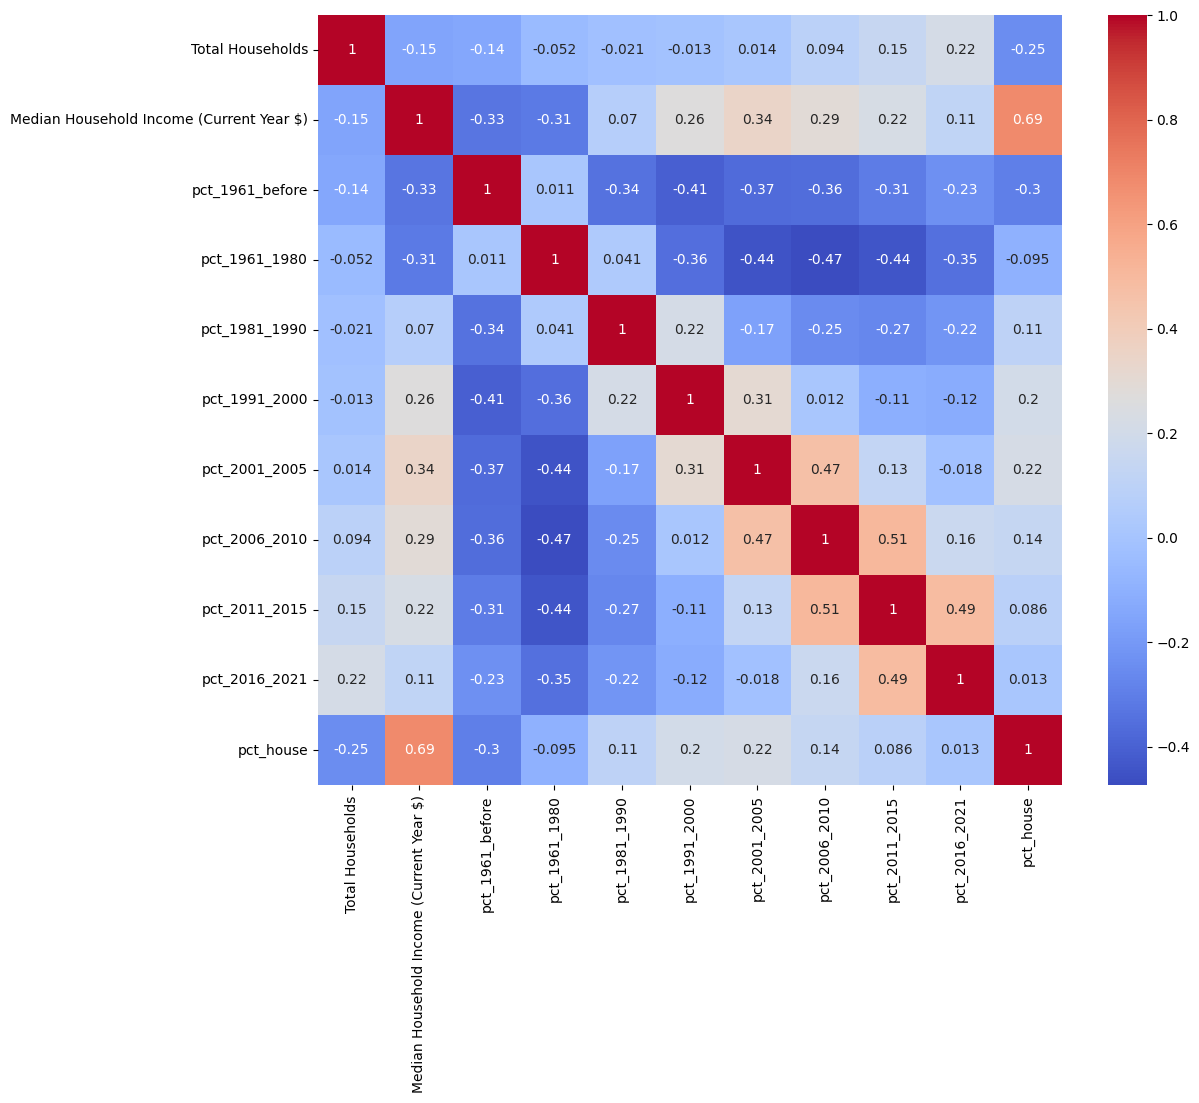

In [ ]:
# Drawing a Heatmap for the variables
plt.figure(figsize = (12,10))
sns.heatmap(train_cleaned.corr(),annot=True, cmap = 'coolwarm')

[Text(0, 0, 'Total Households'),
 Text(0, 1, 'Median Household Income (Current Year $)'),
 Text(0, 2, 'pct_1961_before'),
 Text(0, 3, 'pct_1961_1980'),
 Text(0, 4, 'pct_1981_1990'),
 Text(0, 5, 'pct_1991_2000'),
 Text(0, 6, 'pct_2001_2005'),
 Text(0, 7, 'pct_2006_2010'),
 Text(0, 8, 'pct_2011_2015'),
 Text(0, 9, 'pct_2016_2021'),
 Text(0, 10, 'pct_house')]

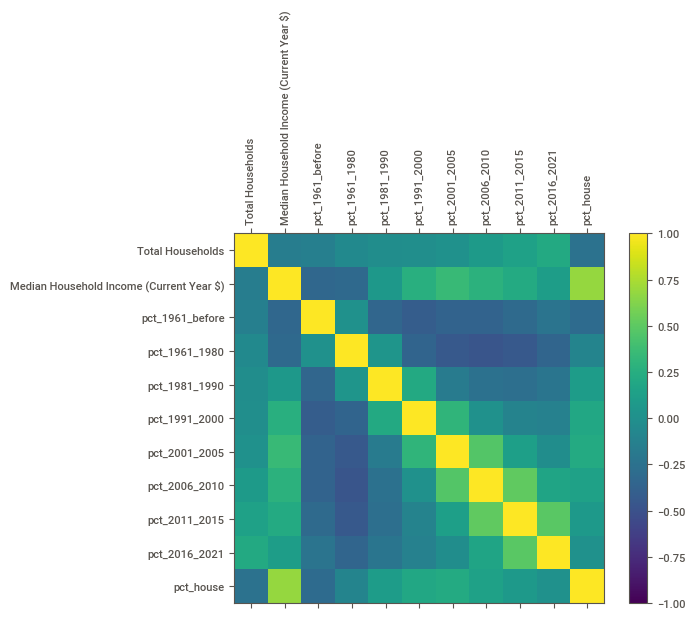

In [ ]:
# Constructing a Correlation Matrix for the selected data
correlations = train_cleaned.corr(numeric_only = True)
# plot correlation matrix (generic)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)


# change the tick labels
ticks = range(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
numeric_columns = train_cleaned.select_dtypes(include='number')
ax.set_xticklabels(numeric_columns, rotation=90)
ax.set_yticklabels(numeric_columns)

### Aggregated Dataset

In [ ]:
# Aggregation
data_train_agg = data_train.drop(columns = ['Total Households For Period Of Construction',
                                            'Total Households for Tenure',
                                            'Total Population',
                                            'Dwellings by Tenure Owner',
                                            'Dwellings by Tenure Renter']).groupby('Median Household Income (Current Year $)').sum().reset_index()

In [ ]:
# Sort Values
data_train_agg = data_train_agg.sort_values(by ='Median Household Income (Current Year $)', ascending=False)
# Check
data_train_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 212 to 0
Data columns (total 13 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Median Household Income (Current Year $)                                   213 non-null    float64
 1   Total Households                                                           213 non-null    float64
 2   Total Households For Period Of Construction Built Before 1961              213 non-null    float64
 3   Total Households For Period Of Construction Built Between 1961 And 1980    213 non-null    float64
 4   Total Households For Period Of Construction Built Between 1981 And 1990    213 non-null    float64
 5   Total Households For Period Of Construction Built Between 1991 And 2000    213 non-null    float64
 6   Total Households For Period Of Construction Built Between 

In [ ]:
# Copy
data_train_agg_pct = data_train_agg.copy()
# Adding derived columns - percentages
data_train_agg_pct["pct_1961_before"] = data_train_agg_pct['Total Households For Period Of Construction Built Before 1961'] / data_train_agg_pct['Total Households']
data_train_agg_pct["pct_1961_1980"] = data_train_agg_pct['Total Households For Period Of Construction Built Between 1961 And 1980'] / data_train_agg_pct['Total Households']
data_train_agg_pct["pct_1981_1990"] = data_train_agg_pct['Total Households For Period Of Construction Built Between 1981 And 1990'] / data_train_agg_pct['Total Households']
data_train_agg_pct["pct_1991_2000"] = data_train_agg_pct['Total Households For Period Of Construction Built Between 1991 And 2000'] / data_train_agg_pct['Total Households']
data_train_agg_pct["pct_2001_2005"] = data_train_agg_pct['Total Households For Period Of Construction Built Between 2001 And 2005'] / data_train_agg_pct['Total Households']
data_train_agg_pct["pct_2006_2010"] = data_train_agg_pct['Total Households For Period Of Construction Built Between 2006 And 2010'] / data_train_agg_pct['Total Households']
data_train_agg_pct["pct_2011_2015"] = data_train_agg_pct['Total Households For Period Of Construction Built Between 2011 And 2015'] / data_train_agg_pct['Total Households']
data_train_agg_pct["pct_2016_2021"] = data_train_agg_pct['Total Households For Period Of Construction Built Between 2016 And 2021'] / data_train_agg_pct['Total Households']
data_train_agg_pct["pct_house"] = data_train_agg_pct['Total Households For Structure Type Houses'] / data_train_agg_pct['Total Households']

# Dropping originals
data_train_agg_pct.drop(columns=['Total Households For Structure Type Houses',
                                 'Total Households For Structure Type Other Dwelling Types',
                                 'Total Households For Period Of Construction Built Before 1961',
                                 'Total Households For Period Of Construction Built Between 1961 And 1980',
                                 'Total Households For Period Of Construction Built Between 1981 And 1990',
                                 'Total Households For Period Of Construction Built Between 1991 And 2000',
                                 'Total Households For Period Of Construction Built Between 2001 And 2005',
                                 'Total Households For Period Of Construction Built Between 2006 And 2010',
                                 'Total Households For Period Of Construction Built Between 2011 And 2015',
                                 'Total Households For Period Of Construction Built Between 2016 And 2021'], inplace = True)

In [ ]:
data_train_agg_pct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 212 to 0
Data columns (total 12 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Median Household Income (Current Year $)                                   213 non-null    float64
 1   Total Households                                                           213 non-null    float64
 2   Total Households For Structure Type Apartment, Building Low And High Rise  213 non-null    int64  
 3   pct_1961_before                                                            213 non-null    float64
 4   pct_1961_1980                                                              213 non-null    float64
 5   pct_1981_1990                                                              213 non-null    float64
 6   pct_1991_2000                                             

In [ ]:
data_train_agg_pct.head(20)

Median Household Income (Current Year $)  Total Households  \
212                                  240000.0             665.0   
211                                  208000.0             990.0   
210                                  206000.0             870.0   
209                                  194000.0            1945.0   
208                                  190000.0            1310.0   
207                                  188000.0             110.0   
206                                  184000.0            1060.0   
205                                  180000.0            3295.0   
204                                  178000.0            2185.0   
203                                  176000.0            1010.0   
202                                  170000.0            2190.0   
201                                  168000.0            3395.0   
200                                  166000.0            3425.0   
199                                  164000.0            3005.0   
198                                  160000.0            3250.0   
197                                  157000.0            2395.0   
196                                  155000.0            2765.0   
195                                  154000.0             865.0   
194                                  153000.0            1890.0   
193                                  152000.0            3480.0   

     Total Households For Structure Type Apartment, Building Low And High Rise  \
212                                                 15                           
211                                                 60                           
210                                                180                           
209                                                380                           
208                                                205                           
207                                                  5                           
206                                                 85                           
205                                                295                           
204                                                310                           
203                                                 35                           
202                                                 15                           
201                                                 90                           
200                                                 60                           
199                                                345                           
198                                                645                           
197                                                 40                           
196                                                255                           
195                                                255                           
194                                                510                           
193                                               1340                           

     pct_1961_before  pct_1961_1980  pct_1981_1990  pct_1991_2000  \
212         0.852713       0.090226       0.037594       0.022556   
211         0.962567       0.065657       0.010101       0.000000   
210         1.006944       0.068966       0.022989       0.034483   
209         1.029032       0.056555       0.007712       0.020566   
208         0.666667       0.171756       0.099237       0.038168   
207         0.000000       0.181818       0.181818       0.363636   
206         0.298507       0.099057       0.117925       0.127358   
205         0.094527       0.080425       0.150228       0.229135   
204         0.816489       0.080092       0.029748       0.036613   
203         0.000000       0.000000       0.009901       0.000000   
202         0.154545       0.358447       0.070776       0.079909   
201         0.125193       0.244477       0.08

#### Visualization - Aggregates

<Axes: >

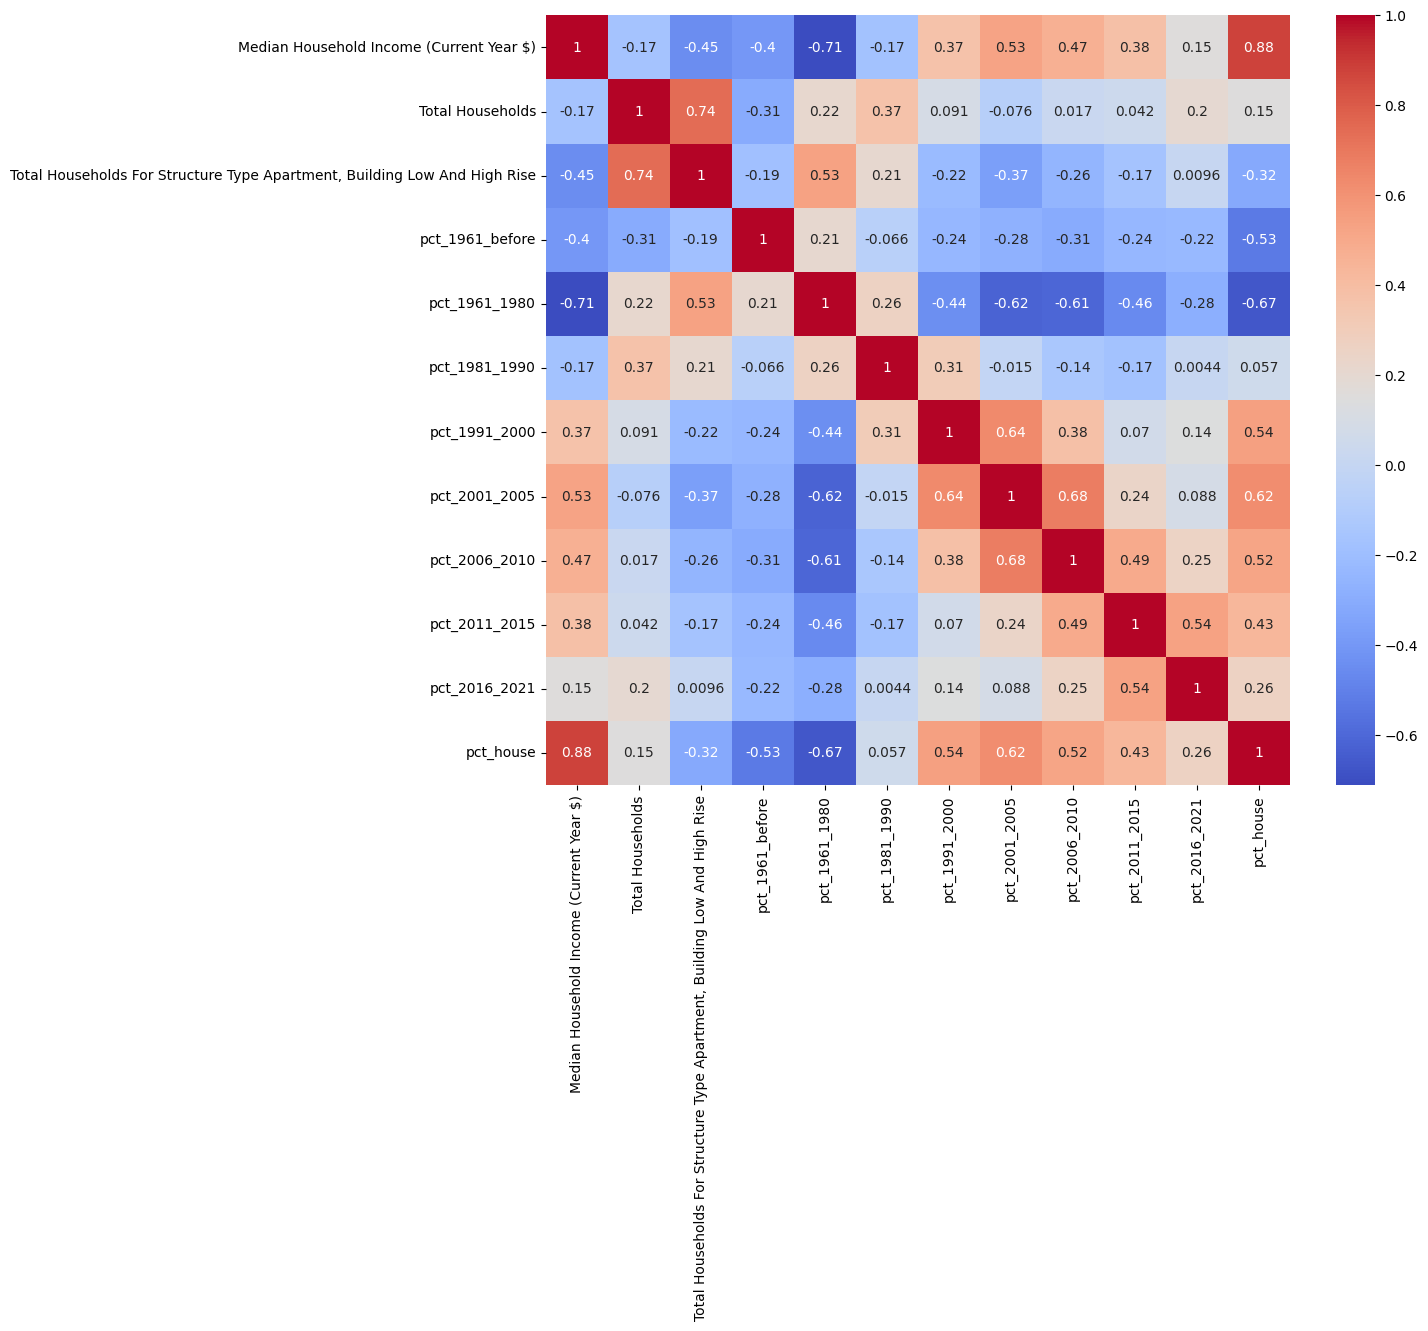

In [ ]:
# Drawing a Heatmap for the variables
plt.figure(figsize = (12,10))
sns.heatmap(data_train_agg_pct.corr(),annot=True, cmap = 'coolwarm')

<Axes: title={'center': 'Distribution of Income - Aggregate'}, xlabel='Income'>

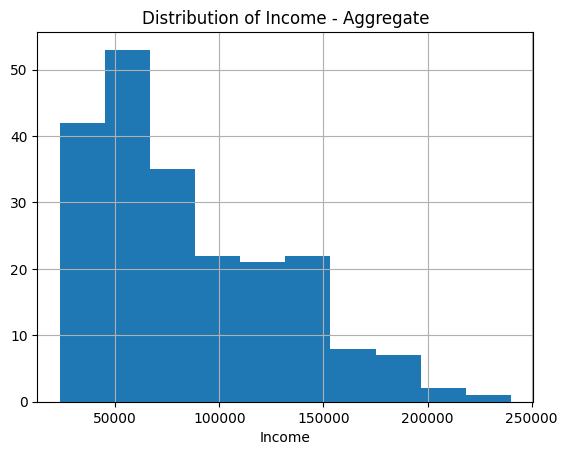

In [ ]:
plt.title('Distribution of Income - Aggregate')
plt.xlabel('Income')
data_train_agg_pct['Median Household Income (Current Year $)'].hist()

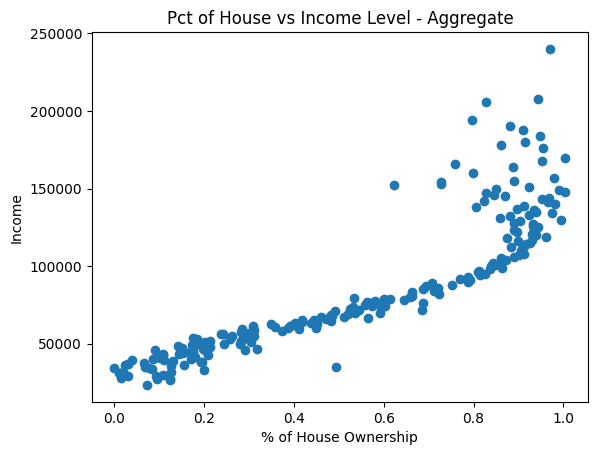

In [ ]:
# The higher the house
plt.title('Pct of House vs Income Level - Aggregate')
plt.xlabel('% of House Ownership')
plt.ylabel('Income')
plt.scatter(data_train_agg_pct['pct_house'], data_train_agg_pct['Median Household Income (Current Year $)'])

In [ ]:
data_train_agg_pct.tail(10)

Median Household Income (Current Year $)  Total Households  \
9                                   31400.0            2145.0   
8                                   31200.0            4245.0   
7                                   29600.0             560.0   
6                                   29400.0            2110.0   
5                                   29000.0            1135.0   
4                                   28000.0            2020.0   
3                                   27400.0             370.0   
2                                   27000.0            1135.0   
1                                   26800.0             365.0   
0                                   23400.0             480.0   

   Total Households For Structure Type Apartment, Building Low And High Rise  \
9                                               2080                           
8                                               4195                           
7                                                520                           
6                                               1960                           
5                                               1135                           
4                                               2045                           
3                                                350                           
2                                                980                           
1                                                330                           
0                                                490                           

   pct_1961_before  pct_1961_1980  pct_1981_1990  pct_1991_2000  \
9        26.500000       0.466200       0.116550       0.079254   
8        13.428571       0.296820       0.129564       0.128386   
7         4.666667       0.294643       0.151786       0.053571   
6         4.153846       0.291469       0.104265       0.104265   
5        19.571429       0.180617       0.096916       0.070485   
4        20.500000       0.336634       0.131188       0.108911   
3         1.714286       0.337838       0.256757       0.040541   
2         1.107143       0.590308       0.145374       0.083700   
1         2.555556       0.561644       0.068493       0.068493   
0         6.857143       0.427083       0.052083       0.000000   

   pct_2001_2005  pct_2006_2010  pct_2011_2015  pct_2016_2021  pct_house  
9       0.048951       0.013986       0.018648       0.011655   0.009324  
8       0.020024       0.018846       0.041225       0.144876   0.016490  
7       0.000000       0.000000       0.000000       0.000000   0.107143  
6       0.035545       0.040284       0.018957       0.023697   0.092417  
5       0.013216       0.000000       0.017621       0.022026   0.030837  
4       0.044554       0.049505       0.019802       0.004950   0.014851  
3       0.067568       0.000000       0.054054       0.054054   0.094595  
2       0.017621       0.017621       0.008811       0.000000   0.123348  
1       0.000000       0.000000       0.000000       0.000000   0.123288  
0       0.000000       0.000000       0.000000       0.000000   0.072917

<Axes: >

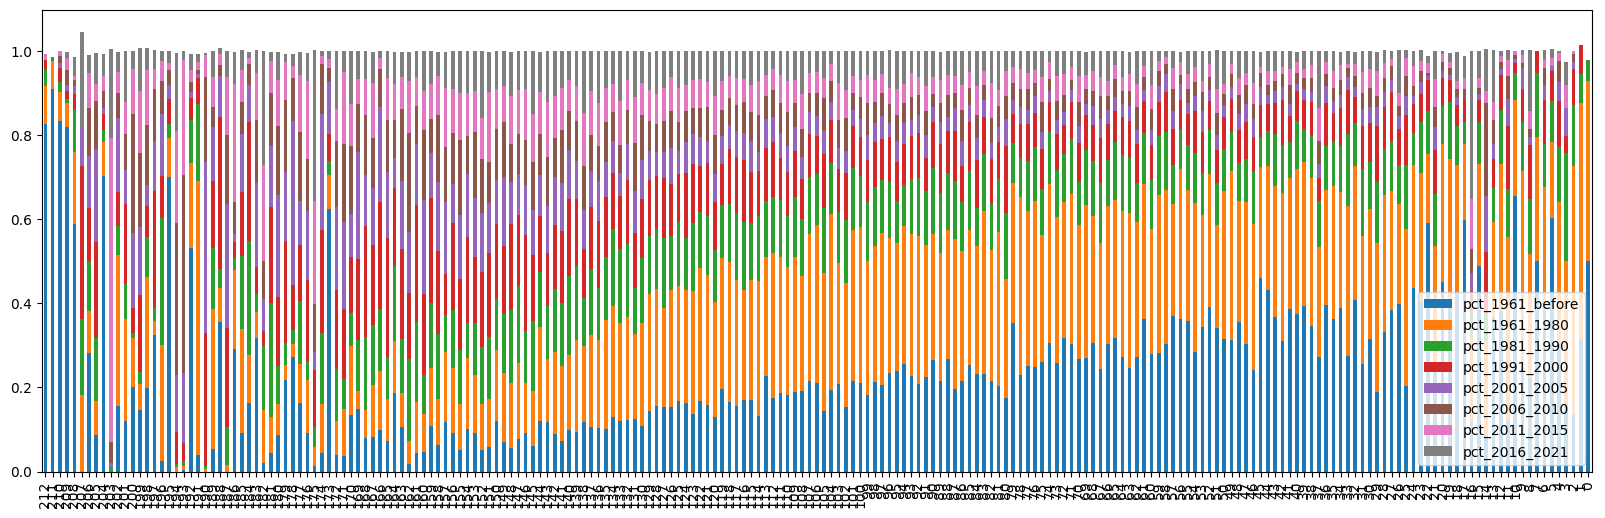

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
# ax.xaxis(data_train_agg_pct['Median Household Income (Current Year $)'])
data_train_agg_pct.iloc[:, 3:11].plot(kind = 'bar', stacked=True, ax = ax)

### Caution:
We can see from the histogram that the household size of each census tract varies greatly, so every ML needs to take that into account.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)[source]


weights='uniform' Needs to be modified as **train_cleaned['Total Household']**

This applies to other ML algo as well.

<Axes: >

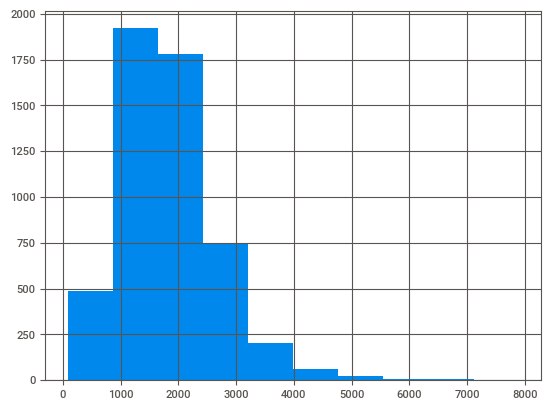

In [ ]:
train_cleaned['Total Households'].hist()


### Preliminary Clustering (with median income)

In [ ]:
# Dropping the variables
train_cleaned_dropped = train_cleaned.drop(columns = ["Total Households"])
train_cleaned_dropped = train_cleaned_dropped.rename(columns={'Median Household Income (Current Year $)': 'Median Income'})
train_cleaned_dropped

Median Income  pct_1961_before  pct_1961_1980  pct_1981_1990  \
0          107000.0         0.020243       0.914980       0.040486   
1          111000.0         0.000000       0.000000       0.000000   
2          105000.0         0.037838       0.054054       0.086486   
3           65000.0         0.118310       0.619718       0.146479   
4          101000.0         0.007220       0.137184       0.729242   
...             ...              ...            ...            ...   
5366        84000.0         0.010274       0.000000       0.000000   
5367        62800.0         0.079857       0.178784       0.122765   
5368        66000.0         0.308219       0.458904       0.058219   
5369       100000.0         0.060086       0.313305       0.240343   
5370        45200.0         0.078838       0.302905       0.206086   

      pct_1991_2000  pct_2001_2005  pct_2006_2010  pct_2011_2015  \
0          0.012146       0.008097       0.008097       0.000000   
1          0.009009       0.012012       0.225225       0.189189   
2          0.436036       0.200000       0.059459       0.086486   
3          0.047887       0.019718       0.025352       0.016901   
4          0.119134       0.000000       0.000000       0.007220   
...             ...            ...            ...            ...   
5366       0.000000       0.013699       0.027397       0.318493   
5367       0.138260       0.084625       0.120381       0.060787   
5368       0.023973       0.020548       0.020548       0.082192   
5369       0.154506       0.090129       0.068670       0.042918   
5370       0.235131       0.066390       0.067773       0.027663   

      pct_2016_2021  pct_house  
0          0.000000   0.919028  
1          0.561562   0.963964  
2          0.043243   0.855856  
3          0.008451   0.712676  
4          0.000000   0.747292  
...             ...        ...  
5366       0.626712   0.534247  
5367       0.214541   0.358760  
5368       0.030822   0.835616  
5369       0.034335   0.699571  
5370       0.015214   0.341632  

[5245 rows x 10 columns]

In [ ]:
# Scale Median before appyling to Kmeans

from sklearn.preprocessing import MinMaxScaler
# Extract the column
train_cleaned_std = train_cleaned_dropped.copy()
var = train_cleaned_std['Median Income'].values.reshape(-1, 1)  # Reshape for compatibility with MinMaxScaler


scaler = MinMaxScaler()

# Fit and transform the column data
var = scaler.fit_transform(var)

# Replace the original column with the scaled values
train_cleaned_std['Median Income'] = var.flatten()  # Flatten to replace the column in the DataFrame
train_cleaned_std

Median Income  pct_1961_before  pct_1961_1980  pct_1981_1990  \
0          0.385965         0.020243       0.914980       0.040486   
1          0.404432         0.000000       0.000000       0.000000   
2          0.376731         0.037838       0.054054       0.086486   
3          0.192059         0.118310       0.619718       0.146479   
4          0.358264         0.007220       0.137184       0.729242   
...             ...              ...            ...            ...   
5366       0.279778         0.010274       0.000000       0.000000   
5367       0.181902         0.079857       0.178784       0.122765   
5368       0.196676         0.308219       0.458904       0.058219   
5369       0.353647         0.060086       0.313305       0.240343   
5370       0.100646         0.078838       0.302905       0.206086   

      pct_1991_2000  pct_2001_2005  pct_2006_2010  pct_2011_2015  \
0          0.012146       0.008097       0.008097       0.000000   
1          0.009009       0.012012       0.225225       0.189189   
2          0.436036       0.200000       0.059459       0.086486   
3          0.047887       0.019718       0.025352       0.016901   
4          0.119134       0.000000       0.000000       0.007220   
...             ...            ...            ...            ...   
5366       0.000000       0.013699       0.027397       0.318493   
5367       0.138260       0.084625       0.120381       0.060787   
5368       0.023973       0.020548       0.020548       0.082192   
5369       0.154506       0.090129       0.068670       0.042918   
5370       0.235131       0.066390       0.067773       0.027663   

      pct_2016_2021  pct_house  
0          0.000000   0.919028  
1          0.561562   0.963964  
2          0.043243   0.855856  
3          0.008451   0.712676  
4          0.000000   0.747292  
...             ...        ...  
5366       0.626712   0.534247  
5367       0.214541   0.358760  
5368       0.030822   0.835616  
5369       0.034335   0.699571  
5370       0.015214   0.341632  

[5245 rows x 10 columns]

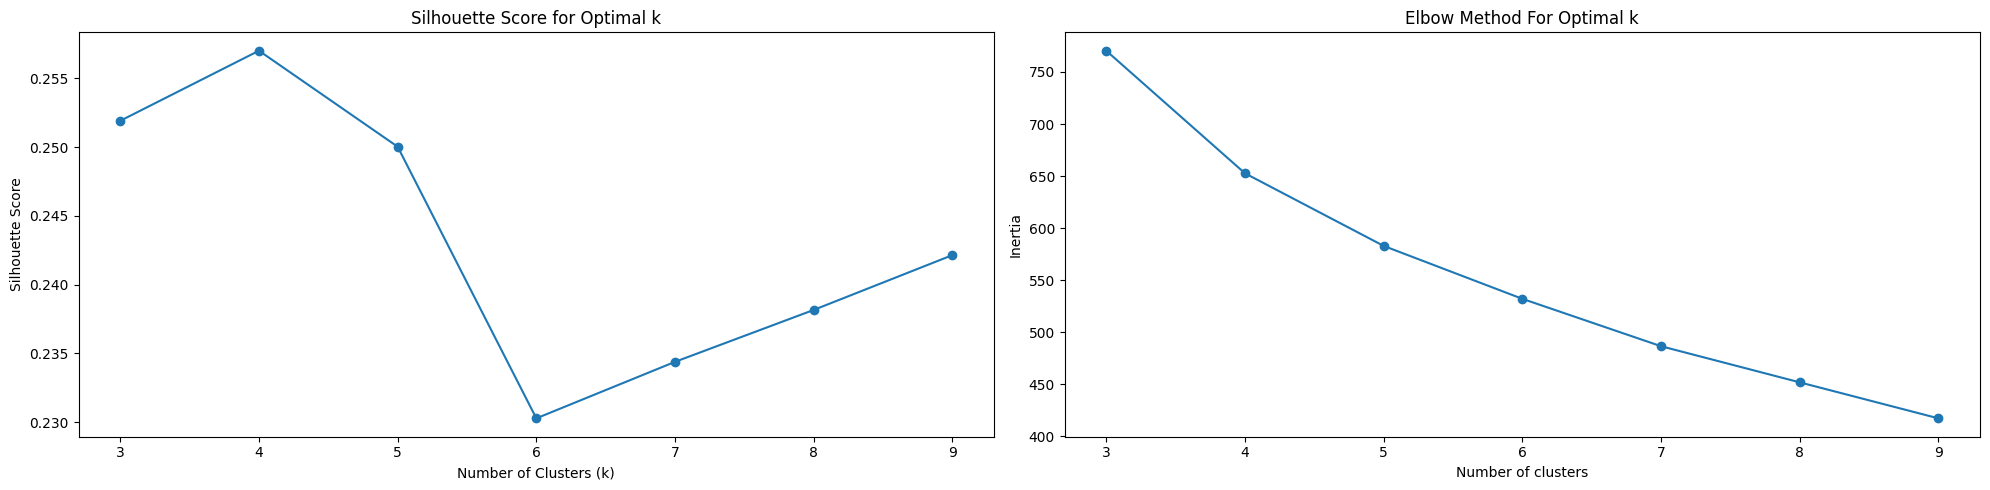

In [ ]:
# Find best k
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# using the Silhouette Score
silhouette_scores = []
K_range = range(3, 10)
for k in K_range:
    model = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=1)
    labels = model.fit_predict(train_cleaned_std)
    silhouette_avg = silhouette_score(train_cleaned_std, labels)
    silhouette_scores.append(silhouette_avg)

axes[0].plot(K_range, silhouette_scores, marker='o')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Silhouette Score for Optimal k')

# using the Elbow Method
inertias = []
K_range = range(3, 10)
for k in K_range:
    model = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=1)
    model.fit(train_cleaned_std)
    inertias.append(model.inertia_)

axes[1].plot(K_range, inertias, marker='o')
axes[1].set_title('Elbow Method For Optimal k')
axes[1].set_xlabel('Number of clusters')
axes[1].set_ylabel('Inertia')

plt.tight_layout()
plt.show()

In [ ]:
# clustering with 3
np.random.seed(1)
optimal_k = 3
model = KMeans(n_clusters=optimal_k, random_state=42)
model_fit = model.fit(train_cleaned_std)
model_fit

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
# put labels on before-standardized data
labels = model.labels_
train_cleaned_cluster = train_cleaned_dropped
train_cleaned_cluster['cluster'] = labels
train_cleaned_cluster.head()

Median Income  pct_1961_before  pct_1961_1980  pct_1981_1990  \
0       107000.0         0.020243       0.914980       0.040486   
1       111000.0         0.000000       0.000000       0.000000   
2       105000.0         0.037838       0.054054       0.086486   
3        65000.0         0.118310       0.619718       0.146479   
4       101000.0         0.007220       0.137184       0.729242   

   pct_1991_2000  pct_2001_2005  pct_2006_2010  pct_2011_2015  pct_2016_2021  \
0       0.012146       0.008097       0.008097       0.000000       0.000000   
1       0.009009       0.012012       0.225225       0.189189       0.561562   
2       0.436036       0.200000       0.059459       0.086486       0.043243   
3       0.047887       0.019718       0.025352       0.016901       0.008451   
4       0.119134       0.000000       0.000000       0.007220       0.000000   

   pct_house  cluster  
0   0.919028        2  
1   0.963964        0  
2   0.855856        0  
3   0.712676        2  
4   0.747292        0

In [ ]:
# size per cluster
train_cleaned_cluster['cluster'].value_counts()

2    1966
0    1650
1    1629
Name: cluster, dtype: int64

In [ ]:
cluster_summaries = train_cleaned_cluster.groupby('cluster').agg({
                                                    'Median Income': ['mean', 'std'],
                                                    'pct_1961_before': ['mean', 'std'],
                                                    'pct_1961_1980': ['mean', 'std'],
                                                    'pct_1981_1990': ['mean', 'std'],
                                                    'pct_1991_2000': ['mean', 'std'],
                                                    'pct_2001_2005': ['mean', 'std'],
                                                    'pct_2006_2010': ['mean', 'std'],
                                                    'pct_2011_2015': ['mean', 'std'],
                                                    'pct_2016_2021': ['mean', 'std'],
                                                    'pct_house': ['mean', 'std'],})

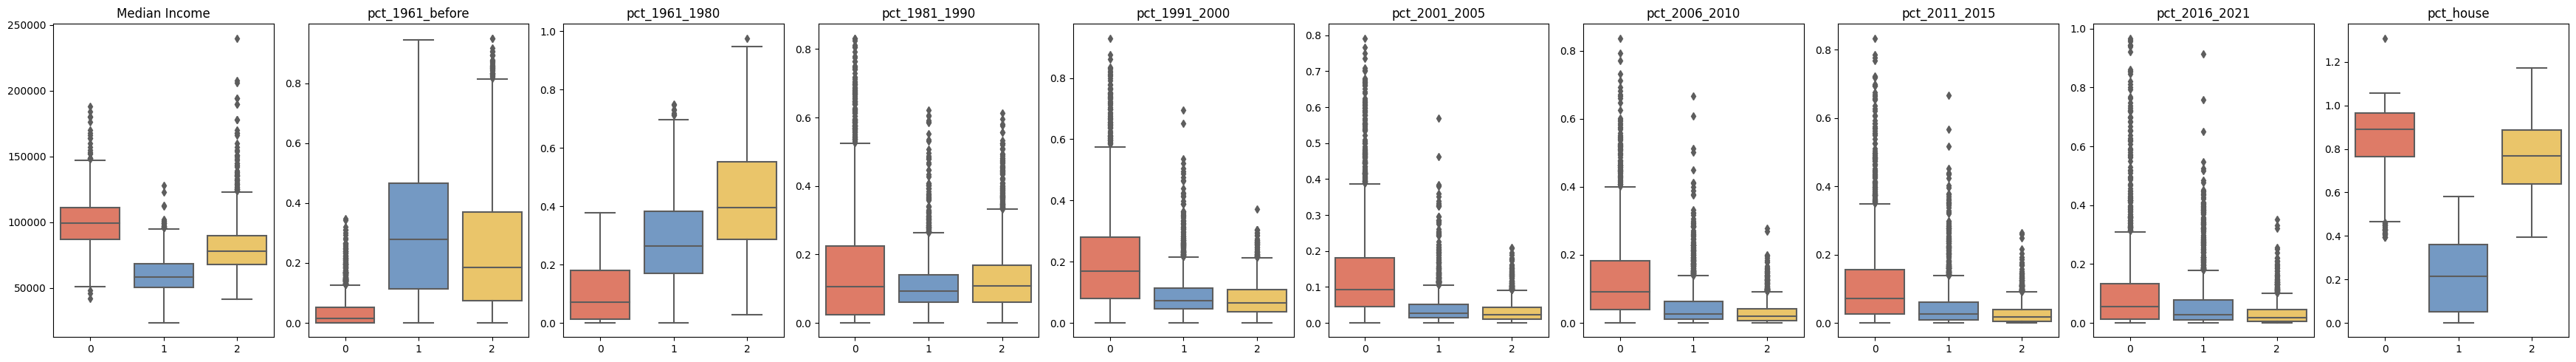

In [ ]:
cluster_colors = ['#F26E53', '#6798D0', '#FFCE55', '#5BC1A6'] # '#E788B8'
num_features = len(train_cleaned_cluster.columns) -1
fig, axes = plt.subplots(1, num_features, figsize=(35, 5))
features_to_visualize = ['Median Income',
                         'pct_1961_before', 'pct_1961_1980', 'pct_1981_1990', 'pct_1991_2000', 'pct_2001_2005',
                         'pct_2006_2010', 'pct_2011_2015', 'pct_2016_2021', 'pct_house']
for i, feature in enumerate(features_to_visualize):
    ax = sns.boxplot(x='cluster', y=feature, data=train_cleaned_cluster, ax=axes[i], palette=cluster_colors)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(f'{feature}')

plt.tight_layout()
plt.show()

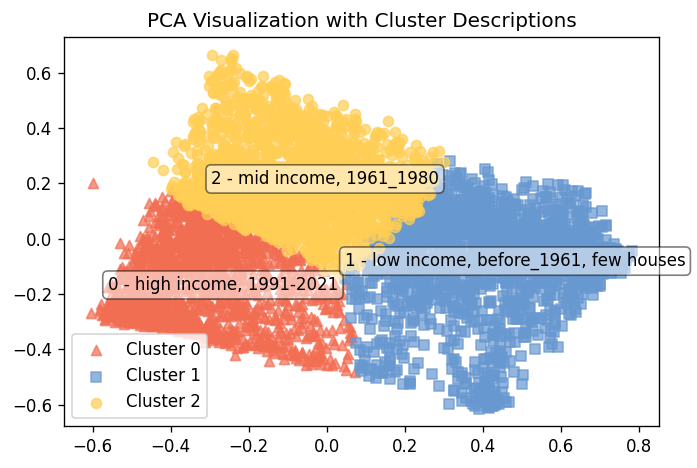

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

clusters = train_cleaned_cluster['cluster']

# Reduce dimensions using PCA
pca = PCA(n_components=2, random_state=42)
train_cleaned_std_pca = pca.fit_transform(train_cleaned_std)

cluster_descriptions = {
    0: "high income, 1991-2021",
    1: "low income, before_1961, few houses",
    2: "mid income, 1961_1980"
}

fig, ax = plt.subplots(figsize=(6, 4), dpi=120)

for l, c, m in zip(range(0, 3), cluster_colors[0:3], ('^', 's', 'o')):
    ax.scatter(train_cleaned_std_pca[clusters == l, 0],
               train_cleaned_std_pca[clusters == l, 1],
               color=c,
               label='Cluster %s' % l,
               alpha=0.7,
               marker=m
               )
    # Annotate cluster descriptions
    ax.annotate(f"{l} - {cluster_descriptions[l]}",
                (train_cleaned_std_pca[clusters == l, 0].mean(),
                 train_cleaned_std_pca[clusters == l, 1].mean()),
                xytext=(15, -5), textcoords='offset points',
                ha='center', va='bottom',
                bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.5))

ax.set_title("PCA Visualization with Cluster Descriptions")
ax.legend(loc='lower left')
plt.tight_layout()
plt.show()

## Part II

### Clustering

In [16]:
 # Dropping the variable Median Household Income
model_train = train_cleaned.drop(columns = ["Median Household Income (Current Year $)", "Total Households"])

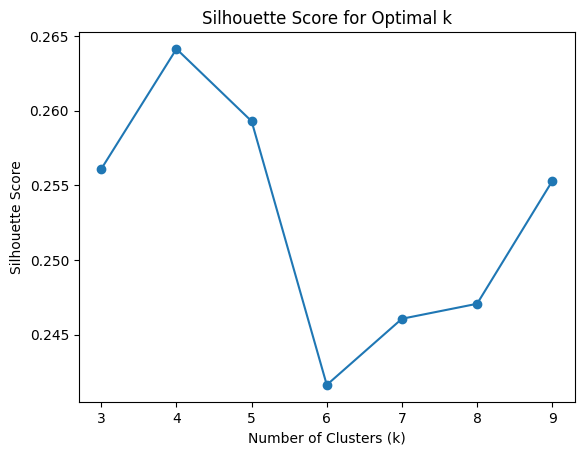

In [17]:
# Constructing a KMeans Model using the Silhouette Score
silhouette_scores = []
K_range = range(3, 10)
for k in K_range:
    model = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=1)
    labels = model.fit_predict(model_train)
    silhouette_avg = silhouette_score(model_train, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

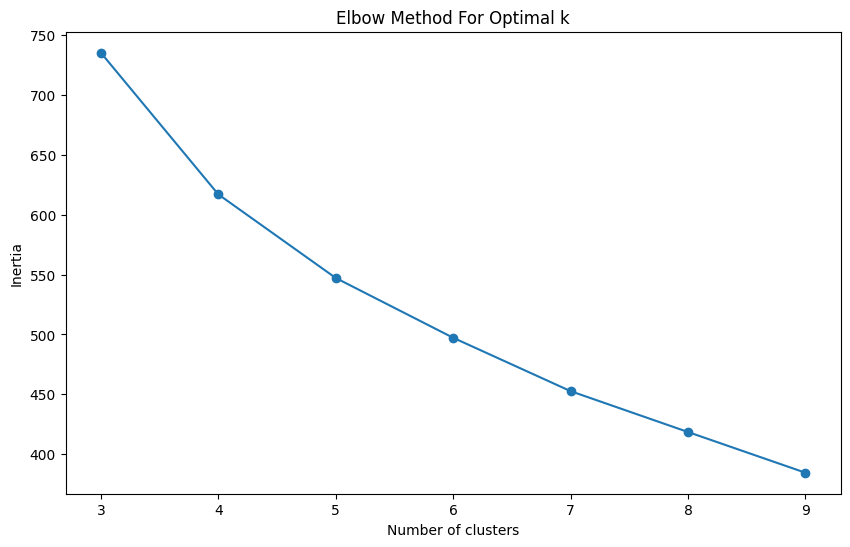

In [18]:
# Constructing a KMeans Model using the Elbow Method
inertias = []
K_range = range(3, 10)
for k in K_range:
    model = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=1)
    model.fit(model_train)
    inertias.append(model.inertia_)

plt.figure(figsize=(10,6))
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [19]:
# Fitting the Cluster Using the Optimal Number of Cluster
optimal_k = 4
model = KMeans(n_clusters=optimal_k, random_state=42)
model.fit(model_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [20]:
labels = model.labels_
model_train['cluster'] = labels
model_train.head()

pct_1961_before  pct_1961_1980  pct_1981_1990  pct_1991_2000  \
0         0.020243       0.914980       0.040486       0.012146   
1         0.000000       0.000000       0.000000       0.009009   
2         0.037838       0.054054       0.086486       0.436036   
3         0.118310       0.619718       0.146479       0.047887   
4         0.007220       0.137184       0.729242       0.119134   

   pct_2001_2005  pct_2006_2010  pct_2011_2015  pct_2016_2021  pct_house  \
0       0.008097       0.008097       0.000000       0.000000   0.919028   
1       0.012012       0.225225       0.189189       0.561562   0.963964   
2       0.200000       0.059459       0.086486       0.043243   0.855856   
3       0.019718       0.025352       0.016901       0.008451   0.712676   
4       0.000000       0.000000       0.007220       0.000000   0.747292   

   cluster  
0        2  
1        1  
2        1  
3        2  
4        1

### Segmentation Models

In [21]:
#Move back the median variable to the dataset
train_cleaned['cluster'] = labels
train_cleaned.head()

Total Households  Median Household Income (Current Year $)  \
0            1235.0                                  107000.0   
1            1665.0                                  111000.0   
2            2775.0                                  105000.0   
3            1775.0                                   65000.0   
4            1385.0                                  101000.0   

   pct_1961_before  pct_1961_1980  pct_1981_1990  pct_1991_2000  \
0         0.020243       0.914980       0.040486       0.012146   
1         0.000000       0.000000       0.000000       0.009009   
2         0.037838       0.054054       0.086486       0.436036   
3         0.118310       0.619718       0.146479       0.047887   
4         0.007220       0.137184       0.729242       0.119134   

   pct_2001_2005  pct_2006_2010  pct_2011_2015  pct_2016_2021  pct_house  \
0       0.008097       0.008097       0.000000       0.000000   0.919028   
1       0.012012       0.225225       0.189189       0.561562   0.963964   
2       0.200000       0.059459       0.086486       0.043243   0.855856   
3       0.019718       0.025352       0.016901       0.008451   0.712676   
4       0.000000       0.000000       0.007220       0.000000   0.747292   

   cluster  
0        2  
1        1  
2        1  
3        2  
4        1

### Segmentation Modelling on Different Clusters

#### Cluster = 0

In [22]:
data_1 = train_cleaned[train_cleaned['cluster'] == 0]
data_1.drop(columns = ['cluster'], inplace = True)
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 6 to 5370
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Total Households                          1391 non-null   float64
 1   Median Household Income (Current Year $)  1391 non-null   float64
 2   pct_1961_before                           1391 non-null   float64
 3   pct_1961_1980                             1391 non-null   float64
 4   pct_1981_1990                             1391 non-null   float64
 5   pct_1991_2000                             1391 non-null   float64
 6   pct_2001_2005                             1391 non-null   float64
 7   pct_2006_2010                             1391 non-null   float64
 8   pct_2011_2015                             1391 non-null   float64
 9   pct_2016_2021                             1391 non-null   float64
 10  pct_house                           

<ipython-input-22-e75b0d8c3beb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1.drop(columns = ['cluster'], inplace = True)


KNN Modelling on this Cluster

In [23]:
test_size=0.2
seed = 42
x = data_1.drop(columns = ["Median Household Income (Current Year $)","Total Households"])
y = data_1["Median Household Income (Current Year $)"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size, random_state=seed)

In [24]:
np.random.seed(1)

num_folds=10
scoring='neg_mean_squared_error'
k_values = np.arange(1,11)
param_grid=dict(n_neighbors=k_values)
model=KNeighborsRegressor()
kfold=KFold(n_splits=num_folds,shuffle=True,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_results = grid.fit(x_train, y_train)
print("Best:%f using %s"%(grid_results.best_score_,grid_results.best_params_))

Best:-136697218.888353 using {'n_neighbors': 10}


In [25]:
model_0=KNeighborsRegressor(n_neighbors=10)
model_0.fit(x_train,y_train)
estimates=model_0.predict(x_test)
estimates

array([49010., 52430., 76600., 47840., 52830., 64450., 70140., 61910.,
       54600., 74750., 54200., 51280., 67500., 50970., 56820., 71900.,
       64750., 55580., 53490., 46760., 53280., 60400., 59550., 66970.,
       54970., 58020., 69340., 47880., 53440., 51210., 63400., 57370.,
       43720., 67100., 67940., 64630., 58340., 45640., 66130., 67160.,
       65960., 68000., 56360., 71560., 56120., 46800., 51650., 57240.,
       61310., 54920., 71720., 58080., 65760., 55060., 51200., 54320.,
       49010., 56720., 53250., 66490., 56740., 55310., 69800., 67610.,
       59110., 53860., 71670., 53760., 60840., 57770., 53200., 64200.,
       65490., 63870., 67200., 68830., 60570., 52360., 54810., 52170.,
       45880., 66570., 72060., 72180., 58090., 53800., 47960., 45720.,
       77910., 70590., 54730., 57630., 76800., 46640., 46060., 68240.,
       54050., 47680., 60470., 54880., 50040., 61400., 60560., 53810.,
       56390., 61240., 50080., 54190., 55590., 59820., 51420., 64000.,
      

In [26]:
regressionSummary(y_test, estimates)


Regression statistics

                      Mean Error (ME) : 577.9211
       Root Mean Squared Error (RMSE) : 10915.0653
            Mean Absolute Error (MAE) : 8440.5018
          Mean Percentage Error (MPE) : -2.5854
Mean Absolute Percentage Error (MAPE) : 15.3049


ANN Modelling on Cluster 0

In [ ]:
# Set Seed
np.random.seed(1)

# Function to create a Keras model
def create_model(learning_rate=0.001, optimizer='adam',
                        neurons=8, activation='relu',
                        dropout_rate=0.0, weight_initializer='glorot_uniform'):

    if optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)

    model = Sequential()

    # Add one hidden layer
    model.add(Dense(neurons, input_shape=(x_train.shape[1],), activation=activation, kernel_initializer=weight_initializer))
    model.add(Dropout(dropout_rate))

    # output layer
    model.add(Dense(1, activation='linear'))

    model.compile(loss='mean_squared_error' , optimizer=optimizer, metrics=['mean_squared_error'])
    return model


# Wrap Keras model to be used in CV
model_cv = KerasRegressor(build_fn=create_model, verbose=0,
                           learning_rate=0.001, optimizer='adam', # set some default parameters to allow the model to be tunable
                           neurons=8, activation='relu',
                           dropout_rate=0.0, weight_initializer='glorot_uniform')

# Define parameters for Grid Search
param_dist_group1 = {
    'batch_size': [50, 100, 150],
    'epochs': [50, 100, 150],
    'learning_rate': [0.001, 0.01, 0.1],
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'neurons': [4, 8, 11],
    'activation': ['sigmoid', 'relu', 'tanh'],
    'dropout_rate': [0.0, 0.2, 0.4],
    'weight_initializer': ['glorot_uniform', 'he_normal']
}

# Perform Random Search
random = RandomizedSearchCV(estimator=model_cv, param_distributions=param_dist_group1, n_iter=20, cv=3, random_state = seed)
random_result = random.fit(x_train, y_train)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Best: 0.164399 using {'weight_initializer': 'he_normal', 'optimizer': 'adam', 'neurons': 11, 'learning_rate': 0.1, 'epochs': 100, 'dropout_rate': 0.0, 'batch_size': 100, 'activation': 'relu'}


In [ ]:
np.random.seed(1)

best_params = {'weight_initializer': 'he_normal', 'optimizer': 'adam', 'neurons': 11, 'learning_rate': 0.1, 'epochs': 100, 'dropout_rate': 0.0, 'batch_size': 100, 'activation': 'relu'}


def create_best_model(neurons=8):

    model = Sequential()

    # Add one hidden layer
    model.add(Dense(best_params['neurons'], activation=best_params['activation'], kernel_initializer=best_params['weight_initializer']))
    model.add(Dropout(best_params['dropout_rate']))

    # output layer
    model.add(Dense(1, activation='linear'))

    # Optimizer configuration
    optimizer = RMSprop(learning_rate=best_params['learning_rate'])

    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])
    return model

# Build the best model
best_ann = KerasRegressor(build_fn=create_model, verbose=0,
                           learning_rate=0.001, optimizer='adam', # set some default parameters
                           neurons=8, activation='relu',
                           dropout_rate=0.0, weight_initializer='glorot_uniform')
best_ann._estimator_type = "regressor"

# Train the model on the full Training data(X_random)
best_ann.fit(x_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

# Evaluate the model on the not_use set
predictions = best_ann.predict(x_test)

# Confusion Matrix
#confusion_matrix = metrics.confusion_matrix(y_test, predictions)
#confusion_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
#confusion_display.plot()

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
regressionSummary(y_test,predictions)


Regression statistics

                      Mean Error (ME) : 58817.3326
       Root Mean Squared Error (RMSE) : 60198.6647
            Mean Absolute Error (MAE) : 58817.3326
          Mean Percentage Error (MPE) : 99.9594
Mean Absolute Percentage Error (MAPE) : 99.9594


Random Forest on Cluster = 0

In [ ]:
np.random.seed(1)

rf = RandomForestRegressor()

# Define the hyperparameters grid
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(1, 5),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Randomized Search Cross Validation
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5, random_state= seed)
random_search.fit(x_train, y_train)

# Display best parameters and best score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Parameters:  {'bootstrap': True, 'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 249}
Best Score:  0.32588649706757655


In [ ]:
np.random.seed(1)

best_params =  {'bootstrap': True, 'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 249}


best_rf = RandomForestRegressor(bootstrap=best_params['bootstrap'], max_depth=best_params['max_depth'],
                                 min_samples_split=best_params['min_samples_split'], min_samples_leaf=best_params['min_samples_leaf'],
                                 n_estimators=best_params['n_estimators'])

# Train the model on the full training data(X_random)
best_rf.fit(x_train, y_train)

# Evaluate the model on the not_use set
predictions = best_rf.predict(x_test)

# accuracy
regressionSummary(y_test, predictions)


Regression statistics

                      Mean Error (ME) : -13.8650
       Root Mean Squared Error (RMSE) : 11091.6165
            Mean Absolute Error (MAE) : 8804.8059
          Mean Percentage Error (MPE) : -3.9062
Mean Absolute Percentage Error (MAPE) : 16.1391


#### Cluster = 1

In [33]:
data_2 = train_cleaned[train_cleaned['cluster'] == 1]
data_2.head()

Total Households  Median Household Income (Current Year $)  \
1             1665.0                                  111000.0   
2             2775.0                                  105000.0   
4             1385.0                                  101000.0   
8             1280.0                                  119000.0   
10            1610.0                                  135000.0   

    pct_1961_before  pct_1961_1980  pct_1981_1990  pct_1991_2000  \
1          0.000000       0.000000       0.000000       0.009009   
2          0.037838       0.054054       0.086486       0.436036   
4          0.007220       0.137184       0.729242       0.119134   
8          0.066406       0.117188       0.117188       0.496094   
10         0.024845       0.006211       0.021739       0.381988   

    pct_2001_2005  pct_2006_2010  pct_2011_2015  pct_2016_2021  pct_house  \
1        0.012012       0.225225       0.189189       0.561562   0.963964   
2        0.200000       0.059459       0.086486       0.043243   0.855856   
4        0.000000       0.000000       0.007220       0.000000   0.747292   
8        0.164062       0.015625       0.007812       0.007812   0.832031   
10       0.319876       0.086957       0.083851       0.074534   0.990683   

    cluster  
1         1  
2         1  
4         1  
8         1  
10        1

KNN on Cluster = 1

In [34]:
test_size=0.2
seed = 42
x = data_2.drop(columns = ["Median Household Income (Current Year $)","Total Households"])
y = data_2["Median Household Income (Current Year $)"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size, random_state=seed)

In [ ]:
np.random.seed(1)

num_folds=10
scoring='neg_mean_squared_error'
k_values = np.arange(1,11)
param_grid=dict(n_neighbors=k_values)
model=KNeighborsRegressor()
kfold=KFold(n_splits=num_folds,shuffle=True,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_results = grid.fit(x_train, y_train)
print("Best:%f using %s"%(grid_results.best_score_,grid_results.best_params_))

Best:-242020095.094039 using {'n_neighbors': 10}


In [ ]:
model=KNeighborsRegressor(n_neighbors=10)
model.fit(x_train,y_train)
estimates=model.predict(x_test)

regressionSummary(y_test, estimates)


Regression statistics

                      Mean Error (ME) : 672.8286
       Root Mean Squared Error (RMSE) : 14390.9199
            Mean Absolute Error (MAE) : 11130.6000
          Mean Percentage Error (MPE) : -1.5707
Mean Absolute Percentage Error (MAPE) : 11.8085


ANN Model

In [ ]:
np.random.seed(1)

# Perform Random Search
random = RandomizedSearchCV(estimator=model_cv, param_distributions=param_dist_group1, n_iter=20, cv=3, random_state = seed)
random_result = random.fit(x_train, y_train)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Best: 0.156774 using {'weight_initializer': 'he_normal', 'optimizer': 'adam', 'neurons': 11, 'learning_rate': 0.1, 'epochs': 100, 'dropout_rate': 0.0, 'batch_size': 100, 'activation': 'relu'}


In [ ]:
np.random.seed(1)

best_params = {'weight_initializer': 'he_normal', 'optimizer': 'adam', 'neurons': 11, 'learning_rate': 0.1, 'epochs': 100, 'dropout_rate': 0.0, 'batch_size': 100, 'activation': 'relu'}

# Build the best model
best_ann = KerasRegressor(build_fn=create_model, verbose=0,
                           learning_rate=0.1, optimizer='sgd', # set some default parameters
                           neurons=8, activation='relu',
                           dropout_rate=0.0, weight_initializer='glorot_uniform')
best_ann._estimator_type = "regressor"

# Train the model on the full Training data(X_random)
best_ann.fit(x_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

# Evaluate the model on the not_use set
predictions = best_ann.predict(x_test)

# accuracy
regressionSummary(y_test, predictions)



/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)



Regression statistics

                      Mean Error (ME) : -406.0930
       Root Mean Squared Error (RMSE) : 16093.6129
            Mean Absolute Error (MAE) : 12519.1764
          Mean Percentage Error (MPE) : -3.6972
Mean Absolute Percentage Error (MAPE) : 13.6881


Random Forest

In [35]:
np.random.seed(1)

rf = RandomForestRegressor()

# Define the hyperparameters grid
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(1, 5),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Randomized Search Cross Validation
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5, random_state = seed)
random_search.fit(x_train, y_train)

# Display best parameters and best score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Parameters:  {'bootstrap': True, 'max_depth': 4, 'min_samples_leaf': 15, 'min_samples_split': 12, 'n_estimators': 171}
Best Score:  0.3457723302569255


In [36]:
np.random.seed(1)

best_params =  {'bootstrap': True, 'max_depth': 4, 'min_samples_leaf': 15, 'min_samples_split': 12, 'n_estimators': 171}
best_rf_1 = RandomForestRegressor(bootstrap=best_params['bootstrap'], max_depth=best_params['max_depth'],
                                 min_samples_split=best_params['min_samples_split'], min_samples_leaf=best_params['min_samples_leaf'],
                                 n_estimators=best_params['n_estimators'])

# Train the model on the full training data(X_random)
best_rf_1.fit(x_train, y_train)

# Evaluate the model on the not_use set
predictions = best_rf_1.predict(x_test)

# accuracy
regressionSummary(y_test, predictions)


Regression statistics

                      Mean Error (ME) : 216.0002
       Root Mean Squared Error (RMSE) : 13820.0845
            Mean Absolute Error (MAE) : 10528.6404
          Mean Percentage Error (MPE) : -2.1204
Mean Absolute Percentage Error (MAPE) : 11.3129


#### Cluster = 2

In [39]:
data_3 = train_cleaned[train_cleaned['cluster'] == 2]
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1377 entries, 0 to 5369
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Total Households                          1377 non-null   float64
 1   Median Household Income (Current Year $)  1377 non-null   float64
 2   pct_1961_before                           1377 non-null   float64
 3   pct_1961_1980                             1377 non-null   float64
 4   pct_1981_1990                             1377 non-null   float64
 5   pct_1991_2000                             1377 non-null   float64
 6   pct_2001_2005                             1377 non-null   float64
 7   pct_2006_2010                             1377 non-null   float64
 8   pct_2011_2015                             1377 non-null   float64
 9   pct_2016_2021                             1377 non-null   float64
 10  pct_house                           

In [40]:
test_size=0.2
seed = 42
x = data_3.drop(columns = ["Median Household Income (Current Year $)","Total Households"])
y = data_3["Median Household Income (Current Year $)"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size, random_state=seed)

In [ ]:
np.random.seed(1)

num_folds=10
scoring='neg_mean_squared_error'
k_values = np.arange(1,11)
param_grid=dict(n_neighbors=k_values)
model=KNeighborsRegressor()
kfold=KFold(n_splits=num_folds,shuffle=True,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_results = grid.fit(x_train, y_train)
print("Best:%f using %s"%(grid_results.best_score_,grid_results.best_params_))

Best:-205027643.122031 using {'n_neighbors': 10}


In [ ]:
model=KNeighborsRegressor(n_neighbors=10)
model.fit(x_train,y_train)
estimates=model.predict(x_test)

regressionSummary(y_test, estimates)


Regression statistics

                      Mean Error (ME) : -838.2971
       Root Mean Squared Error (RMSE) : 14498.4919
            Mean Absolute Error (MAE) : 10900.6159
          Mean Percentage Error (MPE) : -3.8117
Mean Absolute Percentage Error (MAPE) : 13.8080


ANN Model

In [ ]:
np.random.seed(1)

# Perform Random Search
random = RandomizedSearchCV(estimator=model_cv, param_distributions=param_dist_group1, n_iter=20, cv=3)
random_result = random.fit(x_train, y_train)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Best: -14.350551 using {'weight_initializer': 'he_normal', 'optimizer': 'adam', 'neurons': 8, 'learning_rate': 0.1, 'epochs': 50, 'dropout_rate': 0.4, 'batch_size': 150, 'activation': 'relu'}


In [ ]:
np.random.seed(1)

best_params = {'weight_initializer': 'he_normal', 'optimizer': 'adam', 'neurons': 8, 'learning_rate': 0.1, 'epochs': 50, 'dropout_rate': 0.4, 'batch_size': 150, 'activation': 'relu'}
# Build the best model
best_ann = KerasRegressor(build_fn=create_model, verbose=0,
                           learning_rate=0.1, optimizer='sgd', # set some default parameters
                           neurons=8, activation='relu',
                           dropout_rate=0.0, weight_initializer='glorot_uniform')
best_ann._estimator_type = "regressor"

# Train the model on the full Training data(X_random)
best_ann.fit(x_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

# Evaluate the model on the not_use set
predictions = best_ann.predict(x_test)

# accuracy
regressionSummary(y_test, predictions)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)



Regression statistics

                      Mean Error (ME) : 33343.2369
       Root Mean Squared Error (RMSE) : 36970.5739
            Mean Absolute Error (MAE) : 33353.4655
          Mean Percentage Error (MPE) : 39.6097
Mean Absolute Percentage Error (MAPE) : 39.6340


Random Forest

In [42]:
np.random.seed(1)

rf = RandomForestRegressor()

# Define the hyperparameters grid
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(1, 5),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Randomized Search Cross Validation
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5, random_state= seed)
random_search.fit(x_train, y_train)

# Display best parameters and best score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Parameters:  {'bootstrap': True, 'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 249}
Best Score:  0.3149676859597775


In [43]:
np.random.seed(1)

best_params =  {'bootstrap': True, 'max_depth': 4, 'min_samples_leaf': 8 , 'min_samples_split': 4, 'n_estimators': 249}


best_rf_2 = RandomForestRegressor(bootstrap=best_params['bootstrap'], max_depth=best_params['max_depth'],
                                 min_samples_split=best_params['min_samples_split'], min_samples_leaf=best_params['min_samples_leaf'],
                                 n_estimators=best_params['n_estimators'])

# Train the model on the full training data(X_random)
best_rf_2.fit(x_train, y_train)

# Evaluate the model on the not_use set
predictions = best_rf_2.predict(x_test)

# accuracy
regressionSummary(y_test, predictions)


Regression statistics

                      Mean Error (ME) : -1174.4063
       Root Mean Squared Error (RMSE) : 13776.4861
            Mean Absolute Error (MAE) : 10343.3469
          Mean Percentage Error (MPE) : -4.1369
Mean Absolute Percentage Error (MAPE) : 13.1626


#### Cluster = 3

KNN Model

In [45]:
data_4 = train_cleaned[train_cleaned['cluster'] == 3]
data_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 14 to 5360
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Total Households                          729 non-null    float64
 1   Median Household Income (Current Year $)  729 non-null    float64
 2   pct_1961_before                           729 non-null    float64
 3   pct_1961_1980                             729 non-null    float64
 4   pct_1981_1990                             729 non-null    float64
 5   pct_1991_2000                             729 non-null    float64
 6   pct_2001_2005                             729 non-null    float64
 7   pct_2006_2010                             729 non-null    float64
 8   pct_2011_2015                             729 non-null    float64
 9   pct_2016_2021                             729 non-null    float64
 10  pct_house                           

In [46]:
test_size=0.2
seed = 42
x = data_4.drop(columns = ["Median Household Income (Current Year $)","Total Households"])
y = data_4["Median Household Income (Current Year $)"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size, random_state=seed)

In [47]:
np.random.seed(1)

num_folds=10
scoring='neg_mean_squared_error'
k_values = np.arange(1,11)
param_grid=dict(n_neighbors=k_values)
model=KNeighborsRegressor()
kfold=KFold(n_splits=num_folds,shuffle=True,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_results = grid.fit(x_train, y_train)
print("Best:%f using %s"%(grid_results.best_score_,grid_results.best_params_))

Best:-507973115.780245 using {'n_neighbors': 10}


In [48]:
model_3=KNeighborsRegressor(n_neighbors=10)
model_3.fit(x_train,y_train)
estimates=model_3.predict(x_test)

regressionSummary(y_test, estimates)


Regression statistics

                      Mean Error (ME) : -106.0274
       Root Mean Squared Error (RMSE) : 18384.3036
            Mean Absolute Error (MAE) : 14392.0548
          Mean Percentage Error (MPE) : -5.2037
Mean Absolute Percentage Error (MAPE) : 19.4519


ANN Model

In [ ]:
# Perform Random Search
np.random.seed(1)

random = RandomizedSearchCV(estimator=model_cv, param_distributions=param_dist_group1, n_iter=20, cv=3, random_state = seed)
random_result = random.fit(x_train, y_train)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Best: -0.973297 using {'weight_initializer': 'he_normal', 'optimizer': 'adam', 'neurons': 11, 'learning_rate': 0.1, 'epochs': 100, 'dropout_rate': 0.0, 'batch_size': 100, 'activation': 'relu'}


In [ ]:
np.random.seed(1)

best_params = {'weight_initializer': 'he_normal', 'optimizer': 'adam', 'neurons': 11, 'learning_rate': 0.1, 'epochs': 100, 'dropout_rate': 0.0, 'batch_size': 100, 'activation': 'relu'}
# Build the best model
best_ann = KerasRegressor(build_fn=create_model, verbose=0,
                           learning_rate=0.1, optimizer='sgd', # set some default parameters
                           neurons=8, activation='relu',
                           dropout_rate=0.0, weight_initializer='glorot_uniform')
best_ann._estimator_type = "regressor"

# Train the model on the full Training data(X_random)
best_ann.fit(x_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

# Evaluate the model on the not_use set
predictions = best_ann.predict(x_test)

# accuracy
regressionSummary(y_test, predictions)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)



Regression statistics

                      Mean Error (ME) : 2168.1089
       Root Mean Squared Error (RMSE) : 22245.0427
            Mean Absolute Error (MAE) : 16522.3002
          Mean Percentage Error (MPE) : -4.6361
Mean Absolute Percentage Error (MAPE) : 21.8438


Random Forest

In [ ]:
np.random.seed(1)
rf = RandomForestRegressor()

# Define the hyperparameters grid
param_dist = {
    'n_estimators': randint(100, 200),
    'max_depth': randint(1, 5),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Randomized Search Cross Validation
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5, random_state = seed)
random_search.fit(x_train, y_train)

# Display best parameters and best score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Parameters:  {'bootstrap': True, 'max_depth': 4, 'min_samples_leaf': 15, 'min_samples_split': 12, 'n_estimators': 171}
Best Score:  0.2866252223846789


In [ ]:
np.random.seed(1)
best_params =  {'bootstrap': True, 'max_depth': 4, 'min_samples_leaf': 15, 'min_samples_split': 12, 'n_estimators': 171}


best_rf = RandomForestRegressor(bootstrap=best_params['bootstrap'], max_depth=best_params['max_depth'],
                                 min_samples_split=best_params['min_samples_split'], min_samples_leaf=best_params['min_samples_leaf'],
                                 n_estimators=best_params['n_estimators'])

# Train the model on the full training data(X_random)
best_rf.fit(x_train, y_train)

# Evaluate the model on the not_use set
predictions = best_rf.predict(x_test)

# accuracy
regressionSummary(y_test, predictions)


Regression statistics

                      Mean Error (ME) : -2425.8400
       Root Mean Squared Error (RMSE) : 18172.9243
            Mean Absolute Error (MAE) : 14534.2574
          Mean Percentage Error (MPE) : -8.6230
Mean Absolute Percentage Error (MAPE) : 20.2708


### Model Construction on the Global Dataset

In [ ]:
test_size=0.2
seed = 42
x = train_cleaned.drop(columns = ["Median Household Income (Current Year $)","Total Households"])
y = train_cleaned["Median Household Income (Current Year $)"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size, random_state=seed)

#### KNN Model

In [ ]:
np.random.seed(1)

num_folds=10
scoring='neg_mean_squared_error'
k_values = np.arange(1,11)
param_grid=dict(n_neighbors=k_values)
model=KNeighborsRegressor()
kfold=KFold(n_splits=num_folds,shuffle=True,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_results = grid.fit(x_train, y_train)
print("Best:%f using %s"%(grid_results.best_score_,grid_results.best_params_))

Best:-237307002.413172 using {'n_neighbors': 10}


In [ ]:
model=KNeighborsRegressor(n_neighbors=10)
model.fit(x_train,y_train)
estimates=model.predict(x_test)

regressionSummary(y_test, estimates)


Regression statistics

                      Mean Error (ME) : 493.9657
       Root Mean Squared Error (RMSE) : 14758.0502
            Mean Absolute Error (MAE) : 10757.9504
          Mean Percentage Error (MPE) : -2.4273
Mean Absolute Percentage Error (MAPE) : 14.0062


#### ANN Model

In [ ]:
# Perform Random Search
np.random.seed(1)

random = RandomizedSearchCV(estimator=model_cv, param_distributions=param_dist_group1, n_iter=20, cv=3, random_state = seed)
random_result = random.fit(x_train, y_train)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Best: 0.538407 using {'weight_initializer': 'he_normal', 'optimizer': 'adam', 'neurons': 11, 'learning_rate': 0.1, 'epochs': 100, 'dropout_rate': 0.0, 'batch_size': 100, 'activation': 'relu'}


In [ ]:
np.random.seed(1)

best_params = {'weight_initializer': 'he_normal', 'optimizer': 'adam', 'neurons': 11, 'learning_rate': 0.1, 'epochs': 100, 'dropout_rate': 0.0, 'batch_size': 100, 'activation': 'relu'}
# Build the best model
best_ann = KerasRegressor(build_fn=create_model, verbose=0,
                           learning_rate=0.1, optimizer='sgd', # set some default parameters
                           neurons=8, activation='relu',
                           dropout_rate=0.0, weight_initializer='glorot_uniform')
best_ann._estimator_type = "regressor"

# Train the model on the full Training data(X_random)
best_ann.fit(x_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

# Evaluate the model on the not_use set
predictions = best_ann.predict(x_test)

# accuracy
regressionSummary(y_test, predictions)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)



Regression statistics

                      Mean Error (ME) : 55.5437
       Root Mean Squared Error (RMSE) : 15572.8325
            Mean Absolute Error (MAE) : 11625.7094
          Mean Percentage Error (MPE) : -3.6126
Mean Absolute Percentage Error (MAPE) : 15.5494


#### Random Forest

In [ ]:
np.random.seed(1)
rf = RandomForestRegressor()

# Define the hyperparameters grid
param_dist = {
    'n_estimators': randint(100, 200),
    'max_depth': randint(1, 5),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Randomized Search Cross Validation
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5, random_state = seed)
random_search.fit(x_train, y_train)

# Display best parameters and best score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Parameters:  {'bootstrap': True, 'max_depth': 4, 'min_samples_leaf': 15, 'min_samples_split': 12, 'n_estimators': 171}
Best Score:  0.584913207265042


In [ ]:
np.random.seed(1)
best_params =  {'bootstrap': True, 'max_depth': 4, 'min_samples_leaf': 15, 'min_samples_split': 12, 'n_estimators': 171}


best_rf = RandomForestRegressor(bootstrap=best_params['bootstrap'], max_depth=best_params['max_depth'],
                                 min_samples_split=best_params['min_samples_split'], min_samples_leaf=best_params['min_samples_leaf'],
                                 n_estimators=best_params['n_estimators'])

# Train the model on the full training data(X_random)
best_rf.fit(x_train, y_train)

# Evaluate the model on the not_use set
predictions = best_rf.predict(x_test)

# accuracy
regressionSummary(y_test, predictions)


Regression statistics

                      Mean Error (ME) : -187.9619
       Root Mean Squared Error (RMSE) : 14735.8555
            Mean Absolute Error (MAE) : 10993.7424
          Mean Percentage Error (MPE) : -3.7016
Mean Absolute Percentage Error (MAPE) : 14.6502


## Part III


### Prediction on the Test Data Set

#### Cleaning the Test Data

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 17 columns):
 #   Column                                                                     Non-Null Count  Dtype
---  ------                                                                     --------------  -----
 0   Total Population                                                           855 non-null    int64
 1   Total Households                                                           855 non-null    int64
 2   Total Households For Period Of Construction                                855 non-null    int64
 3   Total Households For Period Of Construction Built Before 1961              855 non-null    int64
 4   Total Households For Period Of Construction Built Between 1961 And 1980    855 non-null    int64
 5   Total Households For Period Of Construction Built Between 1981 And 1990    855 non-null    int64
 6   Total Households For Period Of Construction Built Between 1991 And 2000   

In [27]:
test_cleaned = data_test.drop(columns = ["Total Households For Period Of Construction",
                                           "Total Households for Tenure",
                                           "Total Population",
                                           "Dwellings by Tenure Owner",
                                           "Dwellings by Tenure Renter"])

In [28]:
# Adding derived columns - percentages

test_cleaned["pct_1961_before"] = test_cleaned['Total Households For Period Of Construction Built Before 1961'] / test_cleaned['Total Households']
test_cleaned["pct_1961_1980"] = test_cleaned['Total Households For Period Of Construction Built Between 1961 And 1980'] / test_cleaned['Total Households']
test_cleaned["pct_1981_1990"] = test_cleaned['Total Households For Period Of Construction Built Between 1981 And 1990'] / test_cleaned['Total Households']
test_cleaned["pct_1991_2000"] = test_cleaned['Total Households For Period Of Construction Built Between 1991 And 2000'] / test_cleaned['Total Households']
test_cleaned["pct_2001_2005"] = test_cleaned['Total Households For Period Of Construction Built Between 2001 And 2005'] / test_cleaned['Total Households']
test_cleaned["pct_2006_2010"] = test_cleaned['Total Households For Period Of Construction Built Between 2006 And 2010'] / test_cleaned['Total Households']
test_cleaned["pct_2011_2015"] = test_cleaned['Total Households For Period Of Construction Built Between 2011 And 2015'] / test_cleaned['Total Households']
test_cleaned["pct_2016_2021"] = test_cleaned['Total Households For Period Of Construction Built Between 2016 And 2021'] / test_cleaned['Total Households']
test_cleaned["pct_house"] = test_cleaned['Total Households For Structure Type Houses'] / test_cleaned['Total Households']

# Dropping originals
test_cleaned.drop(columns= ["Total Households For Structure Type Apartment, Building Low And High Rise",
                             "Total Households For Structure Type Other Dwelling Types",
                             "Total Households For Structure Type Houses",
                             'Total Households For Period Of Construction Built Before 1961',
                             'Total Households For Period Of Construction Built Between 1961 And 1980',
                             'Total Households For Period Of Construction Built Between 1981 And 1990',
                             'Total Households For Period Of Construction Built Between 1991 And 2000',
                             'Total Households For Period Of Construction Built Between 2001 And 2005',
                             'Total Households For Period Of Construction Built Between 2006 And 2010',
                             'Total Households For Period Of Construction Built Between 2011 And 2015',
                             'Total Households For Period Of Construction Built Between 2016 And 2021'], inplace = True)


#### K-Means Clustering

In [29]:
# Clustering the test data into 4 clusters
np.random.seed(1)

model = KMeans(n_clusters= 4, random_state = seed)
model.fit(test_cleaned)
labels = model.labels_
test_cleaned['cluster'] = labels
test_cleaned.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Total Households  pct_1961_before  pct_1961_1980  pct_1981_1990  \
0              4195         0.029797       0.293206       0.103695   
1              3510         0.004274       0.008547       0.019943   
2              2985         0.008375       0.000000       0.005025   
3               655         0.664122       0.282443       0.030534   
4              1610         0.437888       0.428571       0.059006   

   pct_1991_2000  pct_2001_2005  pct_2006_2010  pct_2011_2015  pct_2016_2021  \
0       0.098927       0.206198       0.077473       0.050060       0.139452   
1       0.145299       0.282051       0.287749       0.233618       0.018519   
2       0.045226       0.152429       0.185930       0.244556       0.358459   
3       0.000000       0.000000       0.000000       0.000000       0.015267   
4       0.040373       0.009317       0.000000       0.000000       0.024845   

   pct_house  cluster  
0   0.001192        0  
1   0.029915        3  
2   0.462312        3  
3   0.114504        2  
4   0.301242        1

#### Fitting KNN onto cluster 0

In [30]:
prediction = []
for i in range(855):
  prediction.append(0)

In [31]:
ind_0 = test_cleaned.index[test_cleaned["cluster"] == 0].tolist()
test_0 = test_cleaned[test_cleaned['cluster'] == 0]
test_0.drop(columns = ["Total Households", 'cluster'], inplace = True)

<ipython-input-31-48446db60d48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_0.drop(columns = ["Total Households", 'cluster'], inplace = True)


In [32]:
estimates=model_0.predict(test_0)
for i in range(len(ind_0)):
  prediction[ind_0[i]] = estimates[i]

#### Fitting Random Forest onto cluster 1 and 2

In [37]:
ind_1 = test_cleaned.index[test_cleaned["cluster"] == 1].tolist()
test_1 = test_cleaned[test_cleaned['cluster'] == 1]
test_1.drop(columns = ["Total Households"], inplace = True)

<ipython-input-37-f0aae71827d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_1.drop(columns = ["Total Households"], inplace = True)


In [38]:
# Prediction on the Test Set
estimates = best_rf_1.predict(test_1)

for i in range(len(ind_1)):
  prediction[ind_1[i]] = estimates[i]

In [41]:
ind_2 = test_cleaned.index[test_cleaned["cluster"] == 2].tolist()
test_2 = test_cleaned[test_cleaned['cluster'] == 2]
test_2.drop(columns = ["Total Households"], inplace = True)

<ipython-input-41-2182b5530a52>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_2.drop(columns = ["Total Households"], inplace = True)


In [44]:
# Prediction on the Test Set
estimates = best_rf_2.predict(test_2)

for i in range(len(ind_2)):
    prediction[ind_2[i]] = estimates[i]

#### Fitting KNN onto cluster 3

In [50]:
ind_3 = test_cleaned.index[test_cleaned["cluster"] == 3].tolist()
test_3 = test_cleaned[test_cleaned['cluster'] == 3]
test_3.drop(columns = ["Total Households"], inplace = True)

<ipython-input-50-1b08a175db37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_3.drop(columns = ["Total Households"], inplace = True)


In [51]:
estimates=model_3.predict(test_3)
for i in range(len(ind_3)):
  prediction[ind_3[i]] = estimates[i]

In [52]:
prediction

[60260.0,
 78890.0,
 74130.0,
 65322.41182807392,
 79055.06042179883,
 91035.27618630666,
 73590.0,
 75140.0,
 73810.0,
 79440.0,
 74100.0,
 74410.0,
 86762.29266680646,
 81050.0,
 64300.0,
 78226.90683639298,
 101178.18572857854,
 65082.6877818912,
 80287.14692860589,
 78276.08524038077,
 79008.13249827485,
 88828.43472281494,
 83759.47157961165,
 78902.98093347717,
 70570.0,
 78003.41608322061,
 63660.17623227714,
 64321.368616681204,
 98467.7807397486,
 93749.00927981272,
 77890.0,
 117682.73349625916,
 89679.27114569592,
 92453.33134204586,
 61380.0,
 98885.8947867485,
 64203.08064073795,
 75278.33726817078,
 79080.19846566244,
 89777.94908366453,
 78296.65549688757,
 65356.86992212124,
 70368.62536547048,
 89285.02083829782,
 78350.0,
 74730.0,
 72247.4238680196,
 78607.76152046664,
 66430.0,
 89290.0,
 86702.29209657891,
 97972.48487641489,
 86807.00943635633,
 91852.11272596882,
 86126.5228095007,
 84705.9956903175,
 106585.16596909796,
 77704.72931712255,
 59340.0,
 69099.25831

In [53]:
with open("Team16predictions.txt", 'w') as file:
    for i in prediction:
        file.write("%s\n" % i)